In [4]:
#importing required libraries for the project

import tensorflow as tf 
import os
import keras
from keras.models import  Sequential
from keras.layers import  Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np

import pandas as pa

import matplotlib.pyplot as plt

In [5]:
# loading  the fashion Mnist dataset from keras datset

fashion_data=keras.datasets.fashion_mnist
# using fashion_data object to load the fashionMinst

((train_data,train_labels),(test_data,test_labels))= fashion_data.load_data()

# In the data set label_names are not included.so,here names are defined for each label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']




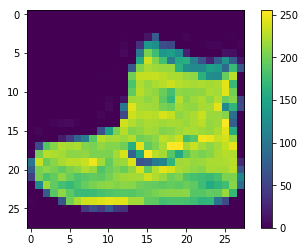

In [18]:
# checking the size or dimension of the input data
train_data.shape
test_data.shape

#displaying one train_image from the datas set for preprocessing
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show() 


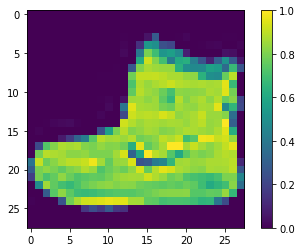

In [6]:
# dimension of the single image is 28 by 28 with pixle value variy from 0 to 255
# image is rescaling to 0 to 1 to avoid pixle numeric issues
train_data=train_data/255.0
test_data=test_data/255.0

#displaying one train_image from the datas set for preprocessing
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show() 

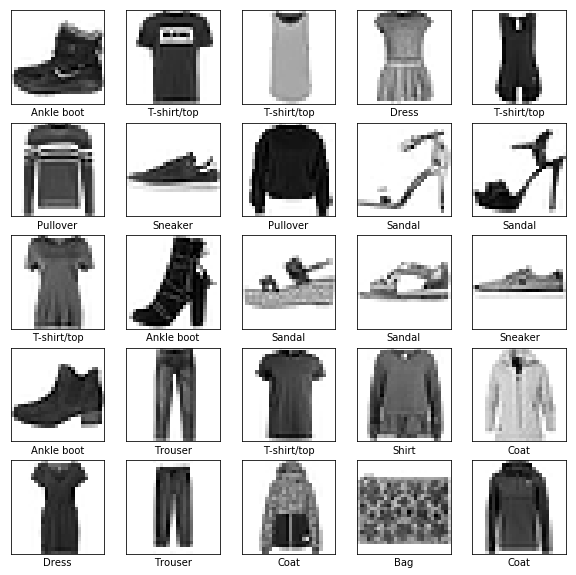

In [7]:
#25 imgaes of training date is displayed,to verify images with corresponding labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()   

In [8]:
# reshape the dimension of input data to give as a desirable input to convolution layer
train_data = train_data.reshape((60000, 28, 28, 1))
test_data = test_data.reshape((10000, 28, 28, 1))


In [9]:
# model of nueral network which consists of convolution layer with 32 filters, kernal 3 by 3, relu as activation funcion
# convolution layer is follwed by maxpooling with pool size 2 by 2
# flatten the out put from maxpool to give as input dense fully connected layer with relu as activation fun
# dense 32 layer is follwed by dense 10 with softmax as activation function as it multi class model

conv_model = Sequential([
   
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
    
])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# before training, compiling  the model to select few more settings
# here we are using Adam as optimizer function
# sparse_categrocial_crossentropy as loss function
# accuracy as metrics to monitor it

conv_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
 # saving the checkpoints of the model in file mention below
checkpoint_path = r"C:\Users\CHERRY\PycharmProjects\AI_for_Mechx_Project_1" \
                  r"\Result\FashionMinst\CNN_model\checkpoint\cp-{epoch:04d}.ckpt", 

checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,monitor='loss', verbose=1, save_weights_only=True,
    # Save weights, every 5-epochs.
    period=1)


conv_model.save_weights(checkpoint_path.format(epoch=0))
# training the model and saving checkpoint of weights for every epoch
conv_model.fit(train_data, train_labels,epochs=5, callbacks=[cp_callback])


Epoch 1/5
   32/60000 [..............................] - ETA: 58s - loss: 0.0192 - acc: 1.0000

   96/60000 [..............................] - ETA: 58s - loss: 0.0787 - acc: 0.9792

  192/60000 [..............................] - ETA: 48s - loss: 0.0483 - acc: 0.9844

  256/60000 [..............................] - ETA: 51s - loss: 0.0380 - acc: 0.9883

  352/60000 [..............................] - ETA: 50s - loss: 0.0372 - acc: 0.9886

  448/60000 [..............................] - ETA: 49s - loss: 0.0406 - acc: 0.9866

  544/60000 [..............................] - ETA: 49s - loss: 0.0476 - acc: 0.9835

  640/60000 [..............................] - ETA: 49s - loss: 0.0483 - acc: 0.9828

  736/60000 [..............................] - ETA: 49s - loss: 0.0451 - acc: 0.9851

  832/60000 [..............................] - ETA: 48s - loss: 0.0457 - acc: 0.9844

  928/60000 [..............................] - ETA: 48s - loss: 0.0451 - acc: 0.9838

 1024/60000 [..............................] - ETA: 48s - loss: 0.0465 - acc: 0.9834

 1120/60000 [..............................] - ETA: 48s - loss: 0.0445 - acc: 0.9848

 1216/60000 [..............................] - ETA: 48s - loss: 0.0435 - acc: 0.9852

 1312/60000 [..............................] - ETA: 48s - loss: 0.0443 - acc: 0.9840

 1376/60000 [..............................] - ETA: 48s - loss: 0.0437 - acc: 0.9840

 1472/60000 [..............................] - ETA: 48s - loss: 0.0455 - acc: 0.9837

 1568/60000 [..............................] - ETA: 48s - loss: 0.0463 - acc: 0.9828

 1632/60000 [..............................] - ETA: 48s - loss: 0.0475 - acc: 0.9822

 1728/60000 [..............................] - ETA: 48s - loss: 0.0472 - acc: 0.9826

 1824/60000 [..............................] - ETA: 48s - loss: 0.0490 - acc: 0.9825

 1920/60000 [..............................] - ETA: 48s - loss: 0.0481 - acc: 0.9828

 2016/60000 [>.............................] - ETA: 48s - loss: 0.0482 - acc: 0.9821

 2080/60000 [>.............................] - ETA: 48s - loss: 0.0479 - acc: 0.9822

 2176/60000 [>.............................] - ETA: 48s - loss: 0.0471 - acc: 0.9830

 2272/60000 [>.............................] - ETA: 48s - loss: 0.0465 - acc: 0.9833

 2368/60000 [>.............................] - ETA: 47s - loss: 0.0461 - acc: 0.9831

 2432/60000 [>.............................] - ETA: 48s - loss: 0.0459 - acc: 0.9827

 2496/60000 [>.............................] - ETA: 48s - loss: 0.0450 - acc: 0.9832

 2592/60000 [>.............................] - ETA: 48s - loss: 0.0454 - acc: 0.9826

 2688/60000 [>.............................] - ETA: 47s - loss: 0.0456 - acc: 0.9825

 2784/60000 [>.............................] - ETA: 47s - loss: 0.0445 - acc: 0.9831

 2848/60000 [>.............................] - ETA: 47s - loss: 0.0453 - acc: 0.9824

 2944/60000 [>.............................] - ETA: 47s - loss: 0.0445 - acc: 0.9830

 3040/60000 [>.............................] - ETA: 47s - loss: 0.0438 - acc: 0.9836

 3104/60000 [>.............................] - ETA: 47s - loss: 0.0432 - acc: 0.9839

 3200/60000 [>.............................] - ETA: 47s - loss: 0.0438 - acc: 0.9831

 3264/60000 [>.............................] - ETA: 47s - loss: 0.0441 - acc: 0.9831

 3360/60000 [>.............................] - ETA: 47s - loss: 0.0437 - acc: 0.9833

 3456/60000 [>.............................] - ETA: 47s - loss: 0.0430 - acc: 0.9838

 3552/60000 [>.............................] - ETA: 47s - loss: 0.0429 - acc: 0.9837

 3648/60000 [>.............................] - ETA: 47s - loss: 0.0431 - acc: 0.9836

 3712/60000 [>.............................] - ETA: 47s - loss: 0.0431 - acc: 0.9833

 3808/60000 [>.............................] - ETA: 47s - loss: 0.0436 - acc: 0.9829

 3904/60000 [>.............................] - ETA: 46s - loss: 0.0444 - acc: 0.9826

 4000/60000 [=>............................] - ETA: 46s - loss: 0.0446 - acc: 0.9825

 4096/60000 [=>............................] - ETA: 46s - loss: 0.0455 - acc: 0.9819

 4160/60000 [=>............................] - ETA: 46s - loss: 0.0452 - acc: 0.9822

 4256/60000 [=>............................] - ETA: 46s - loss: 0.0446 - acc: 0.9826

 4352/60000 [=>............................] - ETA: 46s - loss: 0.0443 - acc: 0.9828

 4448/60000 [=>............................] - ETA: 46s - loss: 0.0441 - acc: 0.9829

 4544/60000 [=>............................] - ETA: 46s - loss: 0.0439 - acc: 0.9828

 4608/60000 [=>............................] - ETA: 46s - loss: 0.0437 - acc: 0.9831

 4704/60000 [=>............................] - ETA: 46s - loss: 0.0432 - acc: 0.9834

 4800/60000 [=>............................] - ETA: 46s - loss: 0.0445 - acc: 0.9827

 4896/60000 [=>............................] - ETA: 46s - loss: 0.0441 - acc: 0.9830

 4992/60000 [=>............................] - ETA: 45s - loss: 0.0439 - acc: 0.9832

 5056/60000 [=>............................] - ETA: 46s - loss: 0.0435 - acc: 0.9834

 5152/60000 [=>............................] - ETA: 45s - loss: 0.0433 - acc: 0.9835

 5248/60000 [=>............................] - ETA: 45s - loss: 0.0436 - acc: 0.9832

 5344/60000 [=>............................] - ETA: 45s - loss: 0.0439 - acc: 0.9832

 5408/60000 [=>............................] - ETA: 45s - loss: 0.0437 - acc: 0.9832

 5504/60000 [=>............................] - ETA: 45s - loss: 0.0435 - acc: 0.9831

 5600/60000 [=>............................] - ETA: 45s - loss: 0.0432 - acc: 0.9832

 5696/60000 [=>............................] - ETA: 45s - loss: 0.0432 - acc: 0.9830

 5760/60000 [=>............................] - ETA: 45s - loss: 0.0430 - acc: 0.9830

 5856/60000 [=>............................] - ETA: 45s - loss: 0.0429 - acc: 0.9829

 5952/60000 [=>............................] - ETA: 45s - loss: 0.0430 - acc: 0.9829

 6048/60000 [==>...........................] - ETA: 45s - loss: 0.0438 - acc: 0.9823

 6112/60000 [==>...........................] - ETA: 45s - loss: 0.0443 - acc: 0.9823

 6208/60000 [==>...........................] - ETA: 45s - loss: 0.0444 - acc: 0.9823

 6304/60000 [==>...........................] - ETA: 44s - loss: 0.0440 - acc: 0.9826

 6400/60000 [==>...........................] - ETA: 44s - loss: 0.0441 - acc: 0.9823

 6496/60000 [==>...........................] - ETA: 44s - loss: 0.0445 - acc: 0.9821

 6560/60000 [==>...........................] - ETA: 44s - loss: 0.0444 - acc: 0.9823

 6656/60000 [==>...........................] - ETA: 44s - loss: 0.0441 - acc: 0.9826

 6752/60000 [==>...........................] - ETA: 44s - loss: 0.0438 - acc: 0.9828

 6848/60000 [==>...........................] - ETA: 44s - loss: 0.0438 - acc: 0.9828

 6944/60000 [==>...........................] - ETA: 44s - loss: 0.0435 - acc: 0.9829

 7040/60000 [==>...........................] - ETA: 44s - loss: 0.0435 - acc: 0.9828

 7136/60000 [==>...........................] - ETA: 44s - loss: 0.0438 - acc: 0.9825

 7200/60000 [==>...........................] - ETA: 44s - loss: 0.0436 - acc: 0.9825

 7296/60000 [==>...........................] - ETA: 44s - loss: 0.0432 - acc: 0.9827

 7392/60000 [==>...........................] - ETA: 44s - loss: 0.0441 - acc: 0.9827

 7488/60000 [==>...........................] - ETA: 43s - loss: 0.0444 - acc: 0.9826

 7584/60000 [==>...........................] - ETA: 43s - loss: 0.0446 - acc: 0.9825

 7648/60000 [==>...........................] - ETA: 43s - loss: 0.0445 - acc: 0.9825

 7744/60000 [==>...........................] - ETA: 43s - loss: 0.0446 - acc: 0.9824

 7840/60000 [==>...........................] - ETA: 43s - loss: 0.0457 - acc: 0.9823

 7936/60000 [==>...........................] - ETA: 43s - loss: 0.0460 - acc: 0.9824

 8032/60000 [===>..........................] - ETA: 43s - loss: 0.0461 - acc: 0.9823

 8096/60000 [===>..........................] - ETA: 43s - loss: 0.0462 - acc: 0.9823

 8192/60000 [===>..........................] - ETA: 43s - loss: 0.0459 - acc: 0.9825

 8288/60000 [===>..........................] - ETA: 43s - loss: 0.0460 - acc: 0.9826

 8384/60000 [===>..........................] - ETA: 43s - loss: 0.0462 - acc: 0.9825

 8448/60000 [===>..........................] - ETA: 43s - loss: 0.0462 - acc: 0.9826

 8544/60000 [===>..........................] - ETA: 43s - loss: 0.0467 - acc: 0.9826

 8640/60000 [===>..........................] - ETA: 43s - loss: 0.0470 - acc: 0.9824

 8736/60000 [===>..........................] - ETA: 42s - loss: 0.0471 - acc: 0.9824

 8800/60000 [===>..........................] - ETA: 42s - loss: 0.0469 - acc: 0.9825

 8896/60000 [===>..........................] - ETA: 42s - loss: 0.0473 - acc: 0.9824

 8992/60000 [===>..........................] - ETA: 42s - loss: 0.0474 - acc: 0.9823

 9088/60000 [===>..........................] - ETA: 42s - loss: 0.0477 - acc: 0.9824

 9184/60000 [===>..........................] - ETA: 42s - loss: 0.0481 - acc: 0.9823

 9280/60000 [===>..........................] - ETA: 42s - loss: 0.0486 - acc: 0.9820

 9344/60000 [===>..........................] - ETA: 42s - loss: 0.0487 - acc: 0.9820

 9440/60000 [===>..........................] - ETA: 42s - loss: 0.0489 - acc: 0.9819

 9536/60000 [===>..........................] - ETA: 42s - loss: 0.0489 - acc: 0.9820

 9632/60000 [===>..........................] - ETA: 42s - loss: 0.0487 - acc: 0.9820

 9696/60000 [===>..........................] - ETA: 42s - loss: 0.0486 - acc: 0.9821

 9792/60000 [===>..........................] - ETA: 42s - loss: 0.0485 - acc: 0.9820

 9888/60000 [===>..........................] - ETA: 41s - loss: 0.0485 - acc: 0.9821

 9984/60000 [===>..........................] - ETA: 41s - loss: 0.0483 - acc: 0.9822

10080/60000 [====>.........................] - ETA: 41s - loss: 0.0481 - acc: 0.9823

10176/60000 [====>.........................] - ETA: 41s - loss: 0.0481 - acc: 0.9822

10240/60000 [====>.........................] - ETA: 41s - loss: 0.0479 - acc: 0.9823

10336/60000 [====>.........................] - ETA: 41s - loss: 0.0477 - acc: 0.9825

10432/60000 [====>.........................] - ETA: 41s - loss: 0.0474 - acc: 0.9826

10496/60000 [====>.........................] - ETA: 41s - loss: 0.0472 - acc: 0.9828

10592/60000 [====>.........................] - ETA: 41s - loss: 0.0471 - acc: 0.9828

10688/60000 [====>.........................] - ETA: 41s - loss: 0.0468 - acc: 0.9830

10784/60000 [====>.........................] - ETA: 41s - loss: 0.0466 - acc: 0.9831

10880/60000 [====>.........................] - ETA: 41s - loss: 0.0465 - acc: 0.9833

10976/60000 [====>.........................] - ETA: 41s - loss: 0.0466 - acc: 0.9831

11040/60000 [====>.........................] - ETA: 41s - loss: 0.0465 - acc: 0.9831

11136/60000 [====>.........................] - ETA: 40s - loss: 0.0464 - acc: 0.9832

11232/60000 [====>.........................] - ETA: 40s - loss: 0.0466 - acc: 0.9832

11328/60000 [====>.........................] - ETA: 40s - loss: 0.0468 - acc: 0.9831

11424/60000 [====>.........................] - ETA: 40s - loss: 0.0468 - acc: 0.9832

11488/60000 [====>.........................] - ETA: 40s - loss: 0.0467 - acc: 0.9831

11584/60000 [====>.........................] - ETA: 40s - loss: 0.0468 - acc: 0.9830

11680/60000 [====>.........................] - ETA: 40s - loss: 0.0469 - acc: 0.9830

11776/60000 [====>.........................] - ETA: 40s - loss: 0.0470 - acc: 0.9830

11872/60000 [====>.........................] - ETA: 40s - loss: 0.0468 - acc: 0.9831

11936/60000 [====>.........................] - ETA: 40s - loss: 0.0469 - acc: 0.9831

12032/60000 [=====>........................] - ETA: 40s - loss: 0.0470 - acc: 0.9830

12128/60000 [=====>........................] - ETA: 40s - loss: 0.0472 - acc: 0.9830

12224/60000 [=====>........................] - ETA: 40s - loss: 0.0470 - acc: 0.9831

12320/60000 [=====>........................] - ETA: 39s - loss: 0.0476 - acc: 0.9828

12384/60000 [=====>........................] - ETA: 39s - loss: 0.0475 - acc: 0.9829

12480/60000 [=====>........................] - ETA: 39s - loss: 0.0476 - acc: 0.9829

12576/60000 [=====>........................] - ETA: 39s - loss: 0.0475 - acc: 0.9830

12672/60000 [=====>........................] - ETA: 39s - loss: 0.0474 - acc: 0.9830

12768/60000 [=====>........................] - ETA: 39s - loss: 0.0474 - acc: 0.9830

12832/60000 [=====>........................] - ETA: 39s - loss: 0.0478 - acc: 0.9829

12928/60000 [=====>........................] - ETA: 39s - loss: 0.0477 - acc: 0.9830

13024/60000 [=====>........................] - ETA: 39s - loss: 0.0479 - acc: 0.9829

13088/60000 [=====>........................] - ETA: 39s - loss: 0.0477 - acc: 0.9830

13184/60000 [=====>........................] - ETA: 39s - loss: 0.0480 - acc: 0.9829

13280/60000 [=====>........................] - ETA: 39s - loss: 0.0478 - acc: 0.9831

13376/60000 [=====>........................] - ETA: 39s - loss: 0.0485 - acc: 0.9830

13472/60000 [=====>........................] - ETA: 38s - loss: 0.0484 - acc: 0.9829

13536/60000 [=====>........................] - ETA: 38s - loss: 0.0483 - acc: 0.9829

13632/60000 [=====>........................] - ETA: 38s - loss: 0.0484 - acc: 0.9828

13728/60000 [=====>........................] - ETA: 38s - loss: 0.0481 - acc: 0.9830

13824/60000 [=====>........................] - ETA: 38s - loss: 0.0479 - acc: 0.9830

13920/60000 [=====>........................] - ETA: 38s - loss: 0.0479 - acc: 0.9830

14016/60000 [======>.......................] - ETA: 38s - loss: 0.0478 - acc: 0.9830

14080/60000 [======>.......................] - ETA: 38s - loss: 0.0483 - acc: 0.9830

14176/60000 [======>.......................] - ETA: 38s - loss: 0.0485 - acc: 0.9828

14240/60000 [======>.......................] - ETA: 38s - loss: 0.0485 - acc: 0.9828

14336/60000 [======>.......................] - ETA: 38s - loss: 0.0486 - acc: 0.9826

14432/60000 [======>.......................] - ETA: 38s - loss: 0.0492 - acc: 0.9824

14496/60000 [======>.......................] - ETA: 38s - loss: 0.0494 - acc: 0.9823

14592/60000 [======>.......................] - ETA: 38s - loss: 0.0494 - acc: 0.9824

14656/60000 [======>.......................] - ETA: 38s - loss: 0.0497 - acc: 0.9823

14752/60000 [======>.......................] - ETA: 37s - loss: 0.0499 - acc: 0.9824

14848/60000 [======>.......................] - ETA: 37s - loss: 0.0505 - acc: 0.9822

14912/60000 [======>.......................] - ETA: 37s - loss: 0.0504 - acc: 0.9822

15008/60000 [======>.......................] - ETA: 37s - loss: 0.0502 - acc: 0.9822

15104/60000 [======>.......................] - ETA: 37s - loss: 0.0503 - acc: 0.9821

15200/60000 [======>.......................] - ETA: 37s - loss: 0.0504 - acc: 0.9820

15296/60000 [======>.......................] - ETA: 37s - loss: 0.0504 - acc: 0.9820

15360/60000 [======>.......................] - ETA: 37s - loss: 0.0505 - acc: 0.9820

15456/60000 [======>.......................] - ETA: 37s - loss: 0.0504 - acc: 0.9820

15552/60000 [======>.......................] - ETA: 37s - loss: 0.0506 - acc: 0.9819

15648/60000 [======>.......................] - ETA: 37s - loss: 0.0507 - acc: 0.9819

15712/60000 [======>.......................] - ETA: 37s - loss: 0.0506 - acc: 0.9820

15808/60000 [======>.......................] - ETA: 37s - loss: 0.0506 - acc: 0.9819

15904/60000 [======>.......................] - ETA: 37s - loss: 0.0505 - acc: 0.9819

15968/60000 [======>.......................] - ETA: 36s - loss: 0.0504 - acc: 0.9820

16064/60000 [=======>......................] - ETA: 36s - loss: 0.0503 - acc: 0.9819

16160/60000 [=======>......................] - ETA: 36s - loss: 0.0502 - acc: 0.9821

16256/60000 [=======>......................] - ETA: 36s - loss: 0.0500 - acc: 0.9822

16320/60000 [=======>......................] - ETA: 36s - loss: 0.0500 - acc: 0.9822

16416/60000 [=======>......................] - ETA: 36s - loss: 0.0500 - acc: 0.9822

16512/60000 [=======>......................] - ETA: 36s - loss: 0.0498 - acc: 0.9823

16608/60000 [=======>......................] - ETA: 36s - loss: 0.0501 - acc: 0.9822

16704/60000 [=======>......................] - ETA: 36s - loss: 0.0503 - acc: 0.9822

16768/60000 [=======>......................] - ETA: 36s - loss: 0.0501 - acc: 0.9823

16864/60000 [=======>......................] - ETA: 36s - loss: 0.0500 - acc: 0.9823

16960/60000 [=======>......................] - ETA: 36s - loss: 0.0498 - acc: 0.9824

17024/60000 [=======>......................] - ETA: 36s - loss: 0.0498 - acc: 0.9823

17120/60000 [=======>......................] - ETA: 36s - loss: 0.0499 - acc: 0.9823

17216/60000 [=======>......................] - ETA: 35s - loss: 0.0498 - acc: 0.9823

17312/60000 [=======>......................] - ETA: 35s - loss: 0.0500 - acc: 0.9823

17376/60000 [=======>......................] - ETA: 35s - loss: 0.0499 - acc: 0.9823

17472/60000 [=======>......................] - ETA: 35s - loss: 0.0500 - acc: 0.9823

17568/60000 [=======>......................] - ETA: 35s - loss: 0.0499 - acc: 0.9823

17632/60000 [=======>......................] - ETA: 35s - loss: 0.0498 - acc: 0.9824

17728/60000 [=======>......................] - ETA: 35s - loss: 0.0497 - acc: 0.9824

17824/60000 [=======>......................] - ETA: 35s - loss: 0.0498 - acc: 0.9823

17888/60000 [=======>......................] - ETA: 35s - loss: 0.0498 - acc: 0.9823

17984/60000 [=======>......................] - ETA: 35s - loss: 0.0497 - acc: 0.9823

18080/60000 [========>.....................] - ETA: 35s - loss: 0.0496 - acc: 0.9824

18176/60000 [========>.....................] - ETA: 35s - loss: 0.0498 - acc: 0.9824

18272/60000 [========>.....................] - ETA: 35s - loss: 0.0497 - acc: 0.9824

18368/60000 [========>.....................] - ETA: 34s - loss: 0.0498 - acc: 0.9824

18464/60000 [========>.....................] - ETA: 34s - loss: 0.0498 - acc: 0.9824

18528/60000 [========>.....................] - ETA: 34s - loss: 0.0499 - acc: 0.9824

18624/60000 [========>.....................] - ETA: 34s - loss: 0.0498 - acc: 0.9824

18720/60000 [========>.....................] - ETA: 34s - loss: 0.0497 - acc: 0.9825

18816/60000 [========>.....................] - ETA: 34s - loss: 0.0497 - acc: 0.9825

18912/60000 [========>.....................] - ETA: 34s - loss: 0.0498 - acc: 0.9824

19008/60000 [========>.....................] - ETA: 34s - loss: 0.0499 - acc: 0.9824

19104/60000 [========>.....................] - ETA: 34s - loss: 0.0498 - acc: 0.9824

19200/60000 [========>.....................] - ETA: 34s - loss: 0.0498 - acc: 0.9824

19296/60000 [========>.....................] - ETA: 34s - loss: 0.0498 - acc: 0.9824

19360/60000 [========>.....................] - ETA: 34s - loss: 0.0499 - acc: 0.9824

19456/60000 [========>.....................] - ETA: 34s - loss: 0.0499 - acc: 0.9824

19552/60000 [========>.....................] - ETA: 33s - loss: 0.0500 - acc: 0.9824

19648/60000 [========>.....................] - ETA: 33s - loss: 0.0499 - acc: 0.9824

19744/60000 [========>.....................] - ETA: 33s - loss: 0.0499 - acc: 0.9824

19840/60000 [========>.....................] - ETA: 33s - loss: 0.0499 - acc: 0.9825

19936/60000 [========>.....................] - ETA: 33s - loss: 0.0500 - acc: 0.9824

20032/60000 [=========>....................] - ETA: 33s - loss: 0.0498 - acc: 0.9825

20128/60000 [=========>....................] - ETA: 33s - loss: 0.0497 - acc: 0.9826

20224/60000 [=========>....................] - ETA: 33s - loss: 0.0496 - acc: 0.9826

20320/60000 [=========>....................] - ETA: 33s - loss: 0.0495 - acc: 0.9827

20416/60000 [=========>....................] - ETA: 33s - loss: 0.0495 - acc: 0.9827

20512/60000 [=========>....................] - ETA: 33s - loss: 0.0493 - acc: 0.9828

20576/60000 [=========>....................] - ETA: 33s - loss: 0.0493 - acc: 0.9828

20672/60000 [=========>....................] - ETA: 32s - loss: 0.0493 - acc: 0.9827

20768/60000 [=========>....................] - ETA: 32s - loss: 0.0493 - acc: 0.9828

20864/60000 [=========>....................] - ETA: 32s - loss: 0.0492 - acc: 0.9828

20960/60000 [=========>....................] - ETA: 32s - loss: 0.0491 - acc: 0.9829

21056/60000 [=========>....................] - ETA: 32s - loss: 0.0492 - acc: 0.9829

21152/60000 [=========>....................] - ETA: 32s - loss: 0.0492 - acc: 0.9828

21248/60000 [=========>....................] - ETA: 32s - loss: 0.0492 - acc: 0.9829

21344/60000 [=========>....................] - ETA: 32s - loss: 0.0490 - acc: 0.9829

21408/60000 [=========>....................] - ETA: 32s - loss: 0.0490 - acc: 0.9830

21504/60000 [=========>....................] - ETA: 32s - loss: 0.0491 - acc: 0.9830

21600/60000 [=========>....................] - ETA: 32s - loss: 0.0491 - acc: 0.9830

21696/60000 [=========>....................] - ETA: 32s - loss: 0.0490 - acc: 0.9830

21792/60000 [=========>....................] - ETA: 32s - loss: 0.0491 - acc: 0.9830

21888/60000 [=========>....................] - ETA: 31s - loss: 0.0490 - acc: 0.9831

21984/60000 [=========>....................] - ETA: 31s - loss: 0.0490 - acc: 0.9830

22048/60000 [==========>...................] - ETA: 31s - loss: 0.0489 - acc: 0.9831

22144/60000 [==========>...................] - ETA: 31s - loss: 0.0489 - acc: 0.9831

22240/60000 [==========>...................] - ETA: 31s - loss: 0.0489 - acc: 0.9831

22336/60000 [==========>...................] - ETA: 31s - loss: 0.0490 - acc: 0.9830

22432/60000 [==========>...................] - ETA: 31s - loss: 0.0489 - acc: 0.9830

22528/60000 [==========>...................] - ETA: 31s - loss: 0.0489 - acc: 0.9830

22624/60000 [==========>...................] - ETA: 31s - loss: 0.0488 - acc: 0.9830

22688/60000 [==========>...................] - ETA: 31s - loss: 0.0487 - acc: 0.9831

22784/60000 [==========>...................] - ETA: 31s - loss: 0.0488 - acc: 0.9831

22880/60000 [==========>...................] - ETA: 31s - loss: 0.0488 - acc: 0.9830

22976/60000 [==========>...................] - ETA: 31s - loss: 0.0488 - acc: 0.9830

23072/60000 [==========>...................] - ETA: 30s - loss: 0.0486 - acc: 0.9831

23168/60000 [==========>...................] - ETA: 30s - loss: 0.0485 - acc: 0.9832

23264/60000 [==========>...................] - ETA: 30s - loss: 0.0485 - acc: 0.9832

23360/60000 [==========>...................] - ETA: 30s - loss: 0.0486 - acc: 0.9832

23456/60000 [==========>...................] - ETA: 30s - loss: 0.0485 - acc: 0.9832

23520/60000 [==========>...................] - ETA: 30s - loss: 0.0484 - acc: 0.9833

23616/60000 [==========>...................] - ETA: 30s - loss: 0.0484 - acc: 0.9833



23680/60000 [==========>...................] - ETA: 30s - loss: 0.0483 - acc: 0.9833

23776/60000 [==========>...................] - ETA: 30s - loss: 0.0482 - acc: 0.9833

23872/60000 [==========>...................] - ETA: 30s - loss: 0.0483 - acc: 0.9834

23968/60000 [==========>...................] - ETA: 30s - loss: 0.0483 - acc: 0.9834

24064/60000 [===========>..................] - ETA: 30s - loss: 0.0486 - acc: 0.9832

24160/60000 [===========>..................] - ETA: 29s - loss: 0.0486 - acc: 0.9831

24224/60000 [===========>..................] - ETA: 29s - loss: 0.0487 - acc: 0.9831

24320/60000 [===========>..................] - ETA: 29s - loss: 0.0489 - acc: 0.9831

24416/60000 [===========>..................] - ETA: 29s - loss: 0.0489 - acc: 0.9830

24512/60000 [===========>..................] - ETA: 29s - loss: 0.0490 - acc: 0.9830

24608/60000 [===========>..................] - ETA: 29s - loss: 0.0490 - acc: 0.9830

24704/60000 [===========>..................] - ETA: 29s - loss: 0.0490 - acc: 0.9830

24800/60000 [===========>..................] - ETA: 29s - loss: 0.0493 - acc: 0.9829

24896/60000 [===========>..................] - ETA: 29s - loss: 0.0496 - acc: 0.9828

24992/60000 [===========>..................] - ETA: 29s - loss: 0.0496 - acc: 0.9827

25088/60000 [===========>..................] - ETA: 29s - loss: 0.0496 - acc: 0.9827

25184/60000 [===========>..................] - ETA: 29s - loss: 0.0494 - acc: 0.9828

25280/60000 [===========>..................] - ETA: 29s - loss: 0.0494 - acc: 0.9828

25376/60000 [===========>..................] - ETA: 28s - loss: 0.0495 - acc: 0.9827

25472/60000 [===========>..................] - ETA: 28s - loss: 0.0496 - acc: 0.9827

25536/60000 [===========>..................] - ETA: 28s - loss: 0.0496 - acc: 0.9826

25632/60000 [===========>..................] - ETA: 28s - loss: 0.0495 - acc: 0.9827

25728/60000 [===========>..................] - ETA: 28s - loss: 0.0495 - acc: 0.9826

25824/60000 [===========>..................] - ETA: 28s - loss: 0.0494 - acc: 0.9827

25920/60000 [===========>..................] - ETA: 28s - loss: 0.0494 - acc: 0.9828

26016/60000 [============>.................] - ETA: 28s - loss: 0.0495 - acc: 0.9827

26112/60000 [============>.................] - ETA: 28s - loss: 0.0495 - acc: 0.9827

26208/60000 [============>.................] - ETA: 28s - loss: 0.0494 - acc: 0.9828

26304/60000 [============>.................] - ETA: 28s - loss: 0.0493 - acc: 0.9829

26400/60000 [============>.................] - ETA: 28s - loss: 0.0492 - acc: 0.9829

26496/60000 [============>.................] - ETA: 27s - loss: 0.0491 - acc: 0.9829

26560/60000 [============>.................] - ETA: 27s - loss: 0.0490 - acc: 0.9829

26656/60000 [============>.................] - ETA: 27s - loss: 0.0493 - acc: 0.9828

26752/60000 [============>.................] - ETA: 27s - loss: 0.0492 - acc: 0.9829

26848/60000 [============>.................] - ETA: 27s - loss: 0.0491 - acc: 0.9829

26944/60000 [============>.................] - ETA: 27s - loss: 0.0492 - acc: 0.9829

27040/60000 [============>.................] - ETA: 27s - loss: 0.0493 - acc: 0.9829

27104/60000 [============>.................] - ETA: 27s - loss: 0.0493 - acc: 0.9829

27200/60000 [============>.................] - ETA: 27s - loss: 0.0492 - acc: 0.9830



27264/60000 [============>.................] - ETA: 27s - loss: 0.0492 - acc: 0.9830

27360/60000 [============>.................] - ETA: 27s - loss: 0.0492 - acc: 0.9830

27456/60000 [============>.................] - ETA: 27s - loss: 0.0491 - acc: 0.9830

27552/60000 [============>.................] - ETA: 27s - loss: 0.0492 - acc: 0.9829

27616/60000 [============>.................] - ETA: 27s - loss: 0.0493 - acc: 0.9829

27712/60000 [============>.................] - ETA: 26s - loss: 0.0492 - acc: 0.9830

27808/60000 [============>.................] - ETA: 26s - loss: 0.0493 - acc: 0.9830

27872/60000 [============>.................] - ETA: 26s - loss: 0.0493 - acc: 0.9830



27968/60000 [============>.................] - ETA: 26s - loss: 0.0494 - acc: 0.9829

28064/60000 [=============>................] - ETA: 26s - loss: 0.0494 - acc: 0.9830

28160/60000 [=============>................] - ETA: 26s - loss: 0.0496 - acc: 0.9829

28256/60000 [=============>................] - ETA: 26s - loss: 0.0495 - acc: 0.9829

28320/60000 [=============>................] - ETA: 26s - loss: 0.0495 - acc: 0.9829

28416/60000 [=============>................] - ETA: 26s - loss: 0.0496 - acc: 0.9829

28512/60000 [=============>................] - ETA: 26s - loss: 0.0497 - acc: 0.9828

28608/60000 [=============>................] - ETA: 26s - loss: 0.0497 - acc: 0.9827

28704/60000 [=============>................] - ETA: 26s - loss: 0.0500 - acc: 0.9825

28768/60000 [=============>................] - ETA: 26s - loss: 0.0500 - acc: 0.9825

28864/60000 [=============>................] - ETA: 25s - loss: 0.0500 - acc: 0.9825

28960/60000 [=============>................] - ETA: 25s - loss: 0.0499 - acc: 0.9825

29056/60000 [=============>................] - ETA: 25s - loss: 0.0499 - acc: 0.9826

29152/60000 [=============>................] - ETA: 25s - loss: 0.0499 - acc: 0.9825

29248/60000 [=============>................] - ETA: 25s - loss: 0.0498 - acc: 0.9825

29344/60000 [=============>................] - ETA: 25s - loss: 0.0500 - acc: 0.9824

29440/60000 [=============>................] - ETA: 25s - loss: 0.0501 - acc: 0.9824

29536/60000 [=============>................] - ETA: 25s - loss: 0.0500 - acc: 0.9824

29632/60000 [=============>................] - ETA: 25s - loss: 0.0505 - acc: 0.9824

29696/60000 [=============>................] - ETA: 25s - loss: 0.0505 - acc: 0.9824

29792/60000 [=============>................] - ETA: 25s - loss: 0.0505 - acc: 0.9824

29888/60000 [=============>................] - ETA: 25s - loss: 0.0504 - acc: 0.9824

29984/60000 [=============>................] - ETA: 24s - loss: 0.0508 - acc: 0.9823

30080/60000 [==============>...............] - ETA: 24s - loss: 0.0509 - acc: 0.9823

30176/60000 [==============>...............] - ETA: 24s - loss: 0.0508 - acc: 0.9823

30272/60000 [==============>...............] - ETA: 24s - loss: 0.0509 - acc: 0.9824

30368/60000 [==============>...............] - ETA: 24s - loss: 0.0511 - acc: 0.9823

30464/60000 [==============>...............] - ETA: 24s - loss: 0.0512 - acc: 0.9823

30528/60000 [==============>...............] - ETA: 24s - loss: 0.0512 - acc: 0.9823

30624/60000 [==============>...............] - ETA: 24s - loss: 0.0511 - acc: 0.9823

30720/60000 [==============>...............] - ETA: 24s - loss: 0.0512 - acc: 0.9822

30816/60000 [==============>...............] - ETA: 24s - loss: 0.0511 - acc: 0.9822

30912/60000 [==============>...............] - ETA: 24s - loss: 0.0511 - acc: 0.9822

31008/60000 [==============>...............] - ETA: 24s - loss: 0.0511 - acc: 0.9822

31104/60000 [==============>...............] - ETA: 24s - loss: 0.0511 - acc: 0.9823

31200/60000 [==============>...............] - ETA: 23s - loss: 0.0511 - acc: 0.9823

31296/60000 [==============>...............] - ETA: 23s - loss: 0.0511 - acc: 0.9823

31392/60000 [==============>...............] - ETA: 23s - loss: 0.0511 - acc: 0.9823

31488/60000 [==============>...............] - ETA: 23s - loss: 0.0511 - acc: 0.9822

31584/60000 [==============>...............] - ETA: 23s - loss: 0.0511 - acc: 0.9822

31680/60000 [==============>...............] - ETA: 23s - loss: 0.0513 - acc: 0.9821

31776/60000 [==============>...............] - ETA: 23s - loss: 0.0513 - acc: 0.9821

31872/60000 [==============>...............] - ETA: 23s - loss: 0.0514 - acc: 0.9821

31968/60000 [==============>...............] - ETA: 23s - loss: 0.0513 - acc: 0.9821

32064/60000 [===============>..............] - ETA: 23s - loss: 0.0513 - acc: 0.9821

32160/60000 [===============>..............] - ETA: 23s - loss: 0.0513 - acc: 0.9821

32256/60000 [===============>..............] - ETA: 23s - loss: 0.0512 - acc: 0.9821

32352/60000 [===============>..............] - ETA: 22s - loss: 0.0511 - acc: 0.9822

32448/60000 [===============>..............] - ETA: 22s - loss: 0.0511 - acc: 0.9822

32544/60000 [===============>..............] - ETA: 22s - loss: 0.0509 - acc: 0.9822

32608/60000 [===============>..............] - ETA: 22s - loss: 0.0509 - acc: 0.9823

32704/60000 [===============>..............] - ETA: 22s - loss: 0.0509 - acc: 0.9823

32800/60000 [===============>..............] - ETA: 22s - loss: 0.0508 - acc: 0.9823

32896/60000 [===============>..............] - ETA: 22s - loss: 0.0508 - acc: 0.9823

32992/60000 [===============>..............] - ETA: 22s - loss: 0.0507 - acc: 0.9824

33088/60000 [===============>..............] - ETA: 22s - loss: 0.0507 - acc: 0.9824

33184/60000 [===============>..............] - ETA: 22s - loss: 0.0506 - acc: 0.9824

33280/60000 [===============>..............] - ETA: 22s - loss: 0.0506 - acc: 0.9824

33376/60000 [===============>..............] - ETA: 22s - loss: 0.0505 - acc: 0.9824

33440/60000 [===============>..............] - ETA: 22s - loss: 0.0504 - acc: 0.9825

33536/60000 [===============>..............] - ETA: 22s - loss: 0.0505 - acc: 0.9825

33632/60000 [===============>..............] - ETA: 21s - loss: 0.0504 - acc: 0.9825

33728/60000 [===============>..............] - ETA: 21s - loss: 0.0504 - acc: 0.9825

33824/60000 [===============>..............] - ETA: 21s - loss: 0.0504 - acc: 0.9825

33920/60000 [===============>..............] - ETA: 21s - loss: 0.0503 - acc: 0.9825

34016/60000 [================>.............] - ETA: 21s - loss: 0.0503 - acc: 0.9826

34112/60000 [================>.............] - ETA: 21s - loss: 0.0502 - acc: 0.9826

34176/60000 [================>.............] - ETA: 21s - loss: 0.0502 - acc: 0.9826

34272/60000 [================>.............] - ETA: 21s - loss: 0.0503 - acc: 0.9826

34368/60000 [================>.............] - ETA: 21s - loss: 0.0502 - acc: 0.9826

34464/60000 [================>.............] - ETA: 21s - loss: 0.0502 - acc: 0.9826

34560/60000 [================>.............] - ETA: 21s - loss: 0.0501 - acc: 0.9827

34624/60000 [================>.............] - ETA: 21s - loss: 0.0501 - acc: 0.9827

34720/60000 [================>.............] - ETA: 21s - loss: 0.0500 - acc: 0.9827

34784/60000 [================>.............] - ETA: 20s - loss: 0.0500 - acc: 0.9827

34848/60000 [================>.............] - ETA: 20s - loss: 0.0500 - acc: 0.9827

34944/60000 [================>.............] - ETA: 20s - loss: 0.0500 - acc: 0.9827

35008/60000 [================>.............] - ETA: 20s - loss: 0.0499 - acc: 0.9827

35104/60000 [================>.............] - ETA: 20s - loss: 0.0499 - acc: 0.9827

35168/60000 [================>.............] - ETA: 20s - loss: 0.0499 - acc: 0.9827

35232/60000 [================>.............] - ETA: 20s - loss: 0.0498 - acc: 0.9828

35328/60000 [================>.............] - ETA: 20s - loss: 0.0497 - acc: 0.9828

35392/60000 [================>.............] - ETA: 20s - loss: 0.0497 - acc: 0.9828

35488/60000 [================>.............] - ETA: 20s - loss: 0.0497 - acc: 0.9828

35552/60000 [================>.............] - ETA: 20s - loss: 0.0496 - acc: 0.9829

35648/60000 [================>.............] - ETA: 20s - loss: 0.0496 - acc: 0.9829

35712/60000 [================>.............] - ETA: 20s - loss: 0.0497 - acc: 0.9828

35808/60000 [================>.............] - ETA: 20s - loss: 0.0496 - acc: 0.9829

35904/60000 [================>.............] - ETA: 20s - loss: 0.0496 - acc: 0.9829

35968/60000 [================>.............] - ETA: 20s - loss: 0.0495 - acc: 0.9830

36032/60000 [=================>............] - ETA: 19s - loss: 0.0495 - acc: 0.9830

36096/60000 [=================>............] - ETA: 19s - loss: 0.0494 - acc: 0.9830

36192/60000 [=================>............] - ETA: 19s - loss: 0.0493 - acc: 0.9830

36256/60000 [=================>............] - ETA: 19s - loss: 0.0493 - acc: 0.9831

36320/60000 [=================>............] - ETA: 19s - loss: 0.0492 - acc: 0.9831

36416/60000 [=================>............] - ETA: 19s - loss: 0.0491 - acc: 0.9831

36480/60000 [=================>............] - ETA: 19s - loss: 0.0491 - acc: 0.9831

36576/60000 [=================>............] - ETA: 19s - loss: 0.0491 - acc: 0.9832

36672/60000 [=================>............] - ETA: 19s - loss: 0.0492 - acc: 0.9831

36736/60000 [=================>............] - ETA: 19s - loss: 0.0492 - acc: 0.9832

36832/60000 [=================>............] - ETA: 19s - loss: 0.0493 - acc: 0.9831

36928/60000 [=================>............] - ETA: 19s - loss: 0.0493 - acc: 0.9832

36992/60000 [=================>............] - ETA: 19s - loss: 0.0494 - acc: 0.9831

37088/60000 [=================>............] - ETA: 19s - loss: 0.0494 - acc: 0.9831

37152/60000 [=================>............] - ETA: 19s - loss: 0.0494 - acc: 0.9831

37216/60000 [=================>............] - ETA: 19s - loss: 0.0494 - acc: 0.9831

37312/60000 [=================>............] - ETA: 18s - loss: 0.0494 - acc: 0.9831

37376/60000 [=================>............] - ETA: 18s - loss: 0.0494 - acc: 0.9830

37472/60000 [=================>............] - ETA: 18s - loss: 0.0495 - acc: 0.9830

37536/60000 [=================>............] - ETA: 18s - loss: 0.0494 - acc: 0.9830

37632/60000 [=================>............] - ETA: 18s - loss: 0.0494 - acc: 0.9831

37728/60000 [=================>............] - ETA: 18s - loss: 0.0494 - acc: 0.9830

37792/60000 [=================>............] - ETA: 18s - loss: 0.0493 - acc: 0.9831

37888/60000 [=================>............] - ETA: 18s - loss: 0.0493 - acc: 0.9831

37984/60000 [=================>............] - ETA: 18s - loss: 0.0492 - acc: 0.9831

38080/60000 [==================>...........] - ETA: 18s - loss: 0.0493 - acc: 0.9831

38144/60000 [==================>...........] - ETA: 18s - loss: 0.0493 - acc: 0.9831

38240/60000 [==================>...........] - ETA: 18s - loss: 0.0495 - acc: 0.9830

38304/60000 [==================>...........] - ETA: 18s - loss: 0.0495 - acc: 0.9830

38368/60000 [==================>...........] - ETA: 18s - loss: 0.0495 - acc: 0.9830

38464/60000 [==================>...........] - ETA: 17s - loss: 0.0495 - acc: 0.9830

38560/60000 [==================>...........] - ETA: 17s - loss: 0.0496 - acc: 0.9829

38656/60000 [==================>...........] - ETA: 17s - loss: 0.0496 - acc: 0.9830

38720/60000 [==================>...........] - ETA: 17s - loss: 0.0495 - acc: 0.9830

38816/60000 [==================>...........] - ETA: 17s - loss: 0.0494 - acc: 0.9830

38912/60000 [==================>...........] - ETA: 17s - loss: 0.0495 - acc: 0.9830

38976/60000 [==================>...........] - ETA: 17s - loss: 0.0494 - acc: 0.9831

39072/60000 [==================>...........] - ETA: 17s - loss: 0.0493 - acc: 0.9831

39136/60000 [==================>...........] - ETA: 17s - loss: 0.0493 - acc: 0.9831

39232/60000 [==================>...........] - ETA: 17s - loss: 0.0492 - acc: 0.9832

39328/60000 [==================>...........] - ETA: 17s - loss: 0.0492 - acc: 0.9831

39424/60000 [==================>...........] - ETA: 17s - loss: 0.0492 - acc: 0.9832

39488/60000 [==================>...........] - ETA: 17s - loss: 0.0492 - acc: 0.9832

39584/60000 [==================>...........] - ETA: 17s - loss: 0.0493 - acc: 0.9831

39680/60000 [==================>...........] - ETA: 16s - loss: 0.0493 - acc: 0.9831

39776/60000 [==================>...........] - ETA: 16s - loss: 0.0492 - acc: 0.9831

39872/60000 [==================>...........] - ETA: 16s - loss: 0.0493 - acc: 0.9831

39968/60000 [==================>...........] - ETA: 16s - loss: 0.0493 - acc: 0.9831

40032/60000 [===================>..........] - ETA: 16s - loss: 0.0494 - acc: 0.9830

40128/60000 [===================>..........] - ETA: 16s - loss: 0.0494 - acc: 0.9830

40224/60000 [===================>..........] - ETA: 16s - loss: 0.0495 - acc: 0.9830

40320/60000 [===================>..........] - ETA: 16s - loss: 0.0494 - acc: 0.9830

40416/60000 [===================>..........] - ETA: 16s - loss: 0.0495 - acc: 0.9830

40512/60000 [===================>..........] - ETA: 16s - loss: 0.0495 - acc: 0.9830

40608/60000 [===================>..........] - ETA: 16s - loss: 0.0494 - acc: 0.9830

40704/60000 [===================>..........] - ETA: 16s - loss: 0.0496 - acc: 0.9830

40800/60000 [===================>..........] - ETA: 16s - loss: 0.0496 - acc: 0.9830

40896/60000 [===================>..........] - ETA: 15s - loss: 0.0496 - acc: 0.9830

40992/60000 [===================>..........] - ETA: 15s - loss: 0.0496 - acc: 0.9830

41088/60000 [===================>..........] - ETA: 15s - loss: 0.0497 - acc: 0.9829

41184/60000 [===================>..........] - ETA: 15s - loss: 0.0497 - acc: 0.9830

41280/60000 [===================>..........] - ETA: 15s - loss: 0.0496 - acc: 0.9830

41376/60000 [===================>..........] - ETA: 15s - loss: 0.0496 - acc: 0.9830

41440/60000 [===================>..........] - ETA: 15s - loss: 0.0498 - acc: 0.9829

41536/60000 [===================>..........] - ETA: 15s - loss: 0.0498 - acc: 0.9829

41632/60000 [===================>..........] - ETA: 15s - loss: 0.0499 - acc: 0.9828

41728/60000 [===================>..........] - ETA: 15s - loss: 0.0498 - acc: 0.9829

41824/60000 [===================>..........] - ETA: 15s - loss: 0.0497 - acc: 0.9829

41920/60000 [===================>..........] - ETA: 15s - loss: 0.0498 - acc: 0.9829

42016/60000 [====================>.........] - ETA: 15s - loss: 0.0498 - acc: 0.9829

42112/60000 [====================>.........] - ETA: 14s - loss: 0.0498 - acc: 0.9829

42208/60000 [====================>.........] - ETA: 14s - loss: 0.0497 - acc: 0.9829

42272/60000 [====================>.........] - ETA: 14s - loss: 0.0498 - acc: 0.9829

42368/60000 [====================>.........] - ETA: 14s - loss: 0.0497 - acc: 0.9829

42464/60000 [====================>.........] - ETA: 14s - loss: 0.0499 - acc: 0.9829

42560/60000 [====================>.........] - ETA: 14s - loss: 0.0499 - acc: 0.9829

42656/60000 [====================>.........] - ETA: 14s - loss: 0.0499 - acc: 0.9829

42752/60000 [====================>.........] - ETA: 14s - loss: 0.0500 - acc: 0.9828

42848/60000 [====================>.........] - ETA: 14s - loss: 0.0499 - acc: 0.9828

42944/60000 [====================>.........] - ETA: 14s - loss: 0.0500 - acc: 0.9828

43040/60000 [====================>.........] - ETA: 14s - loss: 0.0500 - acc: 0.9828

43104/60000 [====================>.........] - ETA: 14s - loss: 0.0499 - acc: 0.9828

43200/60000 [====================>.........] - ETA: 14s - loss: 0.0499 - acc: 0.9828

43296/60000 [====================>.........] - ETA: 13s - loss: 0.0499 - acc: 0.9828

43392/60000 [====================>.........] - ETA: 13s - loss: 0.0499 - acc: 0.9828

43488/60000 [====================>.........] - ETA: 13s - loss: 0.0499 - acc: 0.9828

43584/60000 [====================>.........] - ETA: 13s - loss: 0.0498 - acc: 0.9829

43680/60000 [====================>.........] - ETA: 13s - loss: 0.0499 - acc: 0.9829

43776/60000 [====================>.........] - ETA: 13s - loss: 0.0499 - acc: 0.9829

43872/60000 [====================>.........] - ETA: 13s - loss: 0.0500 - acc: 0.9828

43936/60000 [====================>.........] - ETA: 13s - loss: 0.0500 - acc: 0.9828

44032/60000 [=====================>........] - ETA: 13s - loss: 0.0500 - acc: 0.9828

44128/60000 [=====================>........] - ETA: 13s - loss: 0.0499 - acc: 0.9828

44224/60000 [=====================>........] - ETA: 13s - loss: 0.0499 - acc: 0.9829

44320/60000 [=====================>........] - ETA: 13s - loss: 0.0499 - acc: 0.9828

44416/60000 [=====================>........] - ETA: 13s - loss: 0.0500 - acc: 0.9828

44512/60000 [=====================>........] - ETA: 12s - loss: 0.0500 - acc: 0.9827

44608/60000 [=====================>........] - ETA: 12s - loss: 0.0499 - acc: 0.9828

44704/60000 [=====================>........] - ETA: 12s - loss: 0.0500 - acc: 0.9827

44800/60000 [=====================>........] - ETA: 12s - loss: 0.0499 - acc: 0.9827

44896/60000 [=====================>........] - ETA: 12s - loss: 0.0499 - acc: 0.9827

44992/60000 [=====================>........] - ETA: 12s - loss: 0.0499 - acc: 0.9827

45088/60000 [=====================>........] - ETA: 12s - loss: 0.0499 - acc: 0.9827

45152/60000 [=====================>........] - ETA: 12s - loss: 0.0500 - acc: 0.9826

45248/60000 [=====================>........] - ETA: 12s - loss: 0.0500 - acc: 0.9827

45344/60000 [=====================>........] - ETA: 12s - loss: 0.0499 - acc: 0.9827

45440/60000 [=====================>........] - ETA: 12s - loss: 0.0499 - acc: 0.9827

45536/60000 [=====================>........] - ETA: 12s - loss: 0.0499 - acc: 0.9827

45632/60000 [=====================>........] - ETA: 11s - loss: 0.0500 - acc: 0.9827

45696/60000 [=====================>........] - ETA: 11s - loss: 0.0501 - acc: 0.9826

45792/60000 [=====================>........] - ETA: 11s - loss: 0.0501 - acc: 0.9826

45888/60000 [=====================>........] - ETA: 11s - loss: 0.0500 - acc: 0.9826

45984/60000 [=====================>........] - ETA: 11s - loss: 0.0500 - acc: 0.9826

46080/60000 [======================>.......] - ETA: 11s - loss: 0.0500 - acc: 0.9826

46176/60000 [======================>.......] - ETA: 11s - loss: 0.0500 - acc: 0.9827

46272/60000 [======================>.......] - ETA: 11s - loss: 0.0500 - acc: 0.9826

46368/60000 [======================>.......] - ETA: 11s - loss: 0.0499 - acc: 0.9827

46464/60000 [======================>.......] - ETA: 11s - loss: 0.0498 - acc: 0.9827

46560/60000 [======================>.......] - ETA: 11s - loss: 0.0499 - acc: 0.9827

46624/60000 [======================>.......] - ETA: 11s - loss: 0.0499 - acc: 0.9826

46720/60000 [======================>.......] - ETA: 11s - loss: 0.0499 - acc: 0.9826

46816/60000 [======================>.......] - ETA: 10s - loss: 0.0500 - acc: 0.9826

46912/60000 [======================>.......] - ETA: 10s - loss: 0.0499 - acc: 0.9826

47008/60000 [======================>.......] - ETA: 10s - loss: 0.0499 - acc: 0.9827

47104/60000 [======================>.......] - ETA: 10s - loss: 0.0498 - acc: 0.9827

47200/60000 [======================>.......] - ETA: 10s - loss: 0.0499 - acc: 0.9826

47296/60000 [======================>.......] - ETA: 10s - loss: 0.0499 - acc: 0.9826

47392/60000 [======================>.......] - ETA: 10s - loss: 0.0498 - acc: 0.9826

47456/60000 [======================>.......] - ETA: 10s - loss: 0.0498 - acc: 0.9826

47552/60000 [======================>.......] - ETA: 10s - loss: 0.0499 - acc: 0.9826



47616/60000 [======================>.......] - ETA: 10s - loss: 0.0500 - acc: 0.9826

47712/60000 [======================>.......] - ETA: 10s - loss: 0.0501 - acc: 0.9825

47808/60000 [======================>.......] - ETA: 10s - loss: 0.0500 - acc: 0.9825

47904/60000 [======================>.......] - ETA: 10s - loss: 0.0501 - acc: 0.9825

48000/60000 [=======================>......] - ETA: 10s - loss: 0.0501 - acc: 0.9825

48096/60000 [=======================>......] - ETA: 9s - loss: 0.0500 - acc: 0.9825 

48192/60000 [=======================>......] - ETA: 9s - loss: 0.0501 - acc: 0.9825

48288/60000 [=======================>......] - ETA: 9s - loss: 0.0501 - acc: 0.9825

48384/60000 [=======================>......] - ETA: 9s - loss: 0.0500 - acc: 0.9825

48448/60000 [=======================>......] - ETA: 9s - loss: 0.0502 - acc: 0.9825

48544/60000 [=======================>......] - ETA: 9s - loss: 0.0501 - acc: 0.9825

48640/60000 [=======================>......] - ETA: 9s - loss: 0.0501 - acc: 0.9825

48736/60000 [=======================>......] - ETA: 9s - loss: 0.0501 - acc: 0.9825

48832/60000 [=======================>......] - ETA: 9s - loss: 0.0501 - acc: 0.9825

48928/60000 [=======================>......] - ETA: 9s - loss: 0.0501 - acc: 0.9825

49024/60000 [=======================>......] - ETA: 9s - loss: 0.0501 - acc: 0.9825

49120/60000 [=======================>......] - ETA: 9s - loss: 0.0500 - acc: 0.9825

49216/60000 [=======================>......] - ETA: 8s - loss: 0.0501 - acc: 0.9825

49312/60000 [=======================>......] - ETA: 8s - loss: 0.0501 - acc: 0.9825

49408/60000 [=======================>......] - ETA: 8s - loss: 0.0501 - acc: 0.9826

49504/60000 [=======================>......] - ETA: 8s - loss: 0.0501 - acc: 0.9825

49600/60000 [=======================>......] - ETA: 8s - loss: 0.0500 - acc: 0.9826

49664/60000 [=======================>......] - ETA: 8s - loss: 0.0500 - acc: 0.9826

49760/60000 [=======================>......] - ETA: 8s - loss: 0.0500 - acc: 0.9825

49856/60000 [=======================>......] - ETA: 8s - loss: 0.0501 - acc: 0.9825

49952/60000 [=======================>......] - ETA: 8s - loss: 0.0502 - acc: 0.9824

50048/60000 [========================>.....] - ETA: 8s - loss: 0.0502 - acc: 0.9824

50144/60000 [========================>.....] - ETA: 8s - loss: 0.0502 - acc: 0.9824

50240/60000 [========================>.....] - ETA: 8s - loss: 0.0502 - acc: 0.9824

50336/60000 [========================>.....] - ETA: 8s - loss: 0.0502 - acc: 0.9824

50432/60000 [========================>.....] - ETA: 7s - loss: 0.0502 - acc: 0.9824

50528/60000 [========================>.....] - ETA: 7s - loss: 0.0502 - acc: 0.9823

50624/60000 [========================>.....] - ETA: 7s - loss: 0.0502 - acc: 0.9823

50688/60000 [========================>.....] - ETA: 7s - loss: 0.0502 - acc: 0.9823

50784/60000 [========================>.....] - ETA: 7s - loss: 0.0502 - acc: 0.9823

50880/60000 [========================>.....] - ETA: 7s - loss: 0.0502 - acc: 0.9823

50976/60000 [========================>.....] - ETA: 7s - loss: 0.0502 - acc: 0.9823

51072/60000 [========================>.....] - ETA: 7s - loss: 0.0501 - acc: 0.9824

51168/60000 [========================>.....] - ETA: 7s - loss: 0.0502 - acc: 0.9824

51264/60000 [========================>.....] - ETA: 7s - loss: 0.0501 - acc: 0.9824

51360/60000 [========================>.....] - ETA: 7s - loss: 0.0501 - acc: 0.9824

51456/60000 [========================>.....] - ETA: 7s - loss: 0.0501 - acc: 0.9825

51552/60000 [========================>.....] - ETA: 7s - loss: 0.0501 - acc: 0.9824

51616/60000 [========================>.....] - ETA: 6s - loss: 0.0501 - acc: 0.9824

51712/60000 [========================>.....] - ETA: 6s - loss: 0.0500 - acc: 0.9825



51776/60000 [========================>.....] - ETA: 6s - loss: 0.0501 - acc: 0.9824

51872/60000 [========================>.....] - ETA: 6s - loss: 0.0502 - acc: 0.9824



51936/60000 [========================>.....] - ETA: 6s - loss: 0.0502 - acc: 0.9824

52032/60000 [=========================>....] - ETA: 6s - loss: 0.0503 - acc: 0.9823



52096/60000 [=========================>....] - ETA: 6s - loss: 0.0503 - acc: 0.9823

52192/60000 [=========================>....] - ETA: 6s - loss: 0.0502 - acc: 0.9823

52288/60000 [=========================>....] - ETA: 6s - loss: 0.0502 - acc: 0.9823

52384/60000 [=========================>....] - ETA: 6s - loss: 0.0501 - acc: 0.9824

52480/60000 [=========================>....] - ETA: 6s - loss: 0.0500 - acc: 0.9824

52576/60000 [=========================>....] - ETA: 6s - loss: 0.0500 - acc: 0.9824

52672/60000 [=========================>....] - ETA: 6s - loss: 0.0500 - acc: 0.9824

52768/60000 [=========================>....] - ETA: 6s - loss: 0.0500 - acc: 0.9824

52864/60000 [=========================>....] - ETA: 5s - loss: 0.0499 - acc: 0.9824

52960/60000 [=========================>....] - ETA: 5s - loss: 0.0499 - acc: 0.9824

53056/60000 [=========================>....] - ETA: 5s - loss: 0.0499 - acc: 0.9824

53152/60000 [=========================>....] - ETA: 5s - loss: 0.0501 - acc: 0.9824

53216/60000 [=========================>....] - ETA: 5s - loss: 0.0500 - acc: 0.9824

53312/60000 [=========================>....] - ETA: 5s - loss: 0.0502 - acc: 0.9823

53408/60000 [=========================>....] - ETA: 5s - loss: 0.0503 - acc: 0.9823

53504/60000 [=========================>....] - ETA: 5s - loss: 0.0503 - acc: 0.9823

53600/60000 [=========================>....] - ETA: 5s - loss: 0.0502 - acc: 0.9824

53696/60000 [=========================>....] - ETA: 5s - loss: 0.0501 - acc: 0.9824

53760/60000 [=========================>....] - ETA: 5s - loss: 0.0502 - acc: 0.9824

53856/60000 [=========================>....] - ETA: 5s - loss: 0.0501 - acc: 0.9824

53920/60000 [=========================>....] - ETA: 5s - loss: 0.0501 - acc: 0.9824

54016/60000 [==========================>...] - ETA: 4s - loss: 0.0501 - acc: 0.9824

54080/60000 [==========================>...] - ETA: 4s - loss: 0.0501 - acc: 0.9824

54176/60000 [==========================>...] - ETA: 4s - loss: 0.0500 - acc: 0.9824

54272/60000 [==========================>...] - ETA: 4s - loss: 0.0500 - acc: 0.9824

54336/60000 [==========================>...] - ETA: 4s - loss: 0.0499 - acc: 0.9824

54400/60000 [==========================>...] - ETA: 4s - loss: 0.0499 - acc: 0.9824

54496/60000 [==========================>...] - ETA: 4s - loss: 0.0499 - acc: 0.9825

54592/60000 [==========================>...] - ETA: 4s - loss: 0.0499 - acc: 0.9825

54656/60000 [==========================>...] - ETA: 4s - loss: 0.0499 - acc: 0.9825

54752/60000 [==========================>...] - ETA: 4s - loss: 0.0499 - acc: 0.9825

54848/60000 [==========================>...] - ETA: 4s - loss: 0.0498 - acc: 0.9825

54912/60000 [==========================>...] - ETA: 4s - loss: 0.0498 - acc: 0.9825

55008/60000 [==========================>...] - ETA: 4s - loss: 0.0500 - acc: 0.9825

55072/60000 [==========================>...] - ETA: 4s - loss: 0.0500 - acc: 0.9825

55168/60000 [==========================>...] - ETA: 4s - loss: 0.0500 - acc: 0.9824

55232/60000 [==========================>...] - ETA: 3s - loss: 0.0500 - acc: 0.9825

55328/60000 [==========================>...] - ETA: 3s - loss: 0.0500 - acc: 0.9825

55392/60000 [==========================>...] - ETA: 3s - loss: 0.0500 - acc: 0.9825

55488/60000 [==========================>...] - ETA: 3s - loss: 0.0499 - acc: 0.9825

55552/60000 [==========================>...] - ETA: 3s - loss: 0.0499 - acc: 0.9824

55648/60000 [==========================>...] - ETA: 3s - loss: 0.0499 - acc: 0.9824

55744/60000 [==========================>...] - ETA: 3s - loss: 0.0499 - acc: 0.9825

55808/60000 [==========================>...] - ETA: 3s - loss: 0.0499 - acc: 0.9825



55872/60000 [==========================>...] - ETA: 3s - loss: 0.0500 - acc: 0.9824



55936/60000 [==========================>...] - ETA: 3s - loss: 0.0501 - acc: 0.9824



56000/60000 [===========================>..] - ETA: 3s - loss: 0.0501 - acc: 0.9824

56064/60000 [===========================>..] - ETA: 3s - loss: 0.0502 - acc: 0.9823

56128/60000 [===========================>..] - ETA: 3s - loss: 0.0501 - acc: 0.9823

56192/60000 [===========================>..] - ETA: 3s - loss: 0.0502 - acc: 0.9823

56256/60000 [===========================>..] - ETA: 3s - loss: 0.0502 - acc: 0.9823



56320/60000 [===========================>..] - ETA: 3s - loss: 0.0502 - acc: 0.9823

56384/60000 [===========================>..] - ETA: 3s - loss: 0.0502 - acc: 0.9823

56448/60000 [===========================>..] - ETA: 2s - loss: 0.0502 - acc: 0.9823

56512/60000 [===========================>..] - ETA: 2s - loss: 0.0502 - acc: 0.9823

56576/60000 [===========================>..] - ETA: 2s - loss: 0.0501 - acc: 0.9823

56640/60000 [===========================>..] - ETA: 2s - loss: 0.0501 - acc: 0.9823

56704/60000 [===========================>..] - ETA: 2s - loss: 0.0501 - acc: 0.9823

56768/60000 [===========================>..] - ETA: 2s - loss: 0.0502 - acc: 0.9823

56832/60000 [===========================>..] - ETA: 2s - loss: 0.0501 - acc: 0.9823

56896/60000 [===========================>..] - ETA: 2s - loss: 0.0501 - acc: 0.9823

56960/60000 [===========================>..] - ETA: 2s - loss: 0.0502 - acc: 0.9823

57024/60000 [===========================>..] - ETA: 2s - loss: 0.0502 - acc: 0.9823

57088/60000 [===========================>..] - ETA: 2s - loss: 0.0502 - acc: 0.9823

57152/60000 [===========================>..] - ETA: 2s - loss: 0.0502 - acc: 0.9823

57216/60000 [===========================>..] - ETA: 2s - loss: 0.0502 - acc: 0.9823

57280/60000 [===========================>..] - ETA: 2s - loss: 0.0502 - acc: 0.9822

57344/60000 [===========================>..] - ETA: 2s - loss: 0.0503 - acc: 0.9822

57408/60000 [===========================>..] - ETA: 2s - loss: 0.0502 - acc: 0.9822

57472/60000 [===========================>..] - ETA: 2s - loss: 0.0502 - acc: 0.9822

57536/60000 [===========================>..] - ETA: 2s - loss: 0.0502 - acc: 0.9823

57600/60000 [===========================>..] - ETA: 2s - loss: 0.0502 - acc: 0.9822

57664/60000 [===========================>..] - ETA: 1s - loss: 0.0502 - acc: 0.9823

57728/60000 [===========================>..] - ETA: 1s - loss: 0.0501 - acc: 0.9823

57792/60000 [===========================>..] - ETA: 1s - loss: 0.0502 - acc: 0.9822

57856/60000 [===========================>..] - ETA: 1s - loss: 0.0502 - acc: 0.9822

57920/60000 [===========================>..] - ETA: 1s - loss: 0.0503 - acc: 0.9822

57984/60000 [===========================>..] - ETA: 1s - loss: 0.0503 - acc: 0.9822

58048/60000 [============================>.] - ETA: 1s - loss: 0.0503 - acc: 0.9822

58112/60000 [============================>.] - ETA: 1s - loss: 0.0503 - acc: 0.9822

58176/60000 [============================>.] - ETA: 1s - loss: 0.0503 - acc: 0.9822

58240/60000 [============================>.] - ETA: 1s - loss: 0.0503 - acc: 0.9822

58304/60000 [============================>.] - ETA: 1s - loss: 0.0503 - acc: 0.9822

58368/60000 [============================>.] - ETA: 1s - loss: 0.0504 - acc: 0.9822

58432/60000 [============================>.] - ETA: 1s - loss: 0.0504 - acc: 0.9822

58496/60000 [============================>.] - ETA: 1s - loss: 0.0505 - acc: 0.9822

58560/60000 [============================>.] - ETA: 1s - loss: 0.0505 - acc: 0.9822

58624/60000 [============================>.] - ETA: 1s - loss: 0.0505 - acc: 0.9822

58688/60000 [============================>.] - ETA: 1s - loss: 0.0506 - acc: 0.9821

58752/60000 [============================>.] - ETA: 1s - loss: 0.0506 - acc: 0.9821

58816/60000 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9821

58880/60000 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9821



58976/60000 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9821

59072/60000 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9821

59168/60000 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9822

59264/60000 [============================>.] - ETA: 0s - loss: 0.0504 - acc: 0.9822

59360/60000 [============================>.] - ETA: 0s - loss: 0.0504 - acc: 0.9822

59456/60000 [============================>.] - ETA: 0s - loss: 0.0504 - acc: 0.9822

59520/60000 [============================>.] - ETA: 0s - loss: 0.0504 - acc: 0.9822

59616/60000 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9822

59712/60000 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9822

59808/60000 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9822

59904/60000 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9822

60000/60000 [==============================] - 50s 836us/step - loss: 0.0504 - acc: 0.9822



Epoch 00001: saving model to C:\Users\CHERRY\PycharmProjects\AI_for_Mechx_Project_1\Result\FashionMinst\CNN_model\checkpoint\cp-0001.ckpt
Epoch 2/5


   32/60000 [..............................] - ETA: 3:24 - loss: 0.0104 - acc: 1.0000



   96/60000 [..............................] - ETA: 1:47 - loss: 0.0441 - acc: 0.9896

  192/60000 [..............................] - ETA: 1:17 - loss: 0.0350 - acc: 0.9948

  288/60000 [..............................] - ETA: 1:08 - loss: 0.0447 - acc: 0.9896

  384/60000 [..............................] - ETA: 1:03 - loss: 0.0516 - acc: 0.9844

  480/60000 [..............................] - ETA: 1:00 - loss: 0.0573 - acc: 0.9812

  544/60000 [..............................] - ETA: 59s - loss: 0.0513 - acc: 0.9835 

  640/60000 [..............................] - ETA: 57s - loss: 0.0539 - acc: 0.9828

  736/60000 [..............................] - ETA: 55s - loss: 0.0517 - acc: 0.9837

  800/60000 [..............................] - ETA: 55s - loss: 0.0526 - acc: 0.9838

  896/60000 [..............................] - ETA: 54s - loss: 0.0502 - acc: 0.9844

  992/60000 [..............................] - ETA: 54s - loss: 0.0492 - acc: 0.9839

 1088/60000 [..............................] - ETA: 53s - loss: 0.0455 - acc: 0.9853

 1184/60000 [..............................] - ETA: 52s - loss: 0.0432 - acc: 0.9865

 1280/60000 [..............................] - ETA: 52s - loss: 0.0474 - acc: 0.9852

 1344/60000 [..............................] - ETA: 52s - loss: 0.0460 - acc: 0.9859

 1440/60000 [..............................] - ETA: 52s - loss: 0.0456 - acc: 0.9854

 1536/60000 [..............................] - ETA: 51s - loss: 0.0459 - acc: 0.9850

 1632/60000 [..............................] - ETA: 50s - loss: 0.0448 - acc: 0.9853

 1696/60000 [..............................] - ETA: 51s - loss: 0.0451 - acc: 0.9841

 1792/60000 [..............................] - ETA: 50s - loss: 0.0450 - acc: 0.9844



 1856/60000 [..............................] - ETA: 50s - loss: 0.0450 - acc: 0.9838

 1952/60000 [..............................] - ETA: 50s - loss: 0.0451 - acc: 0.9841

 2048/60000 [>.............................] - ETA: 50s - loss: 0.0473 - acc: 0.9829

 2144/60000 [>.............................] - ETA: 50s - loss: 0.0466 - acc: 0.9832

 2240/60000 [>.............................] - ETA: 50s - loss: 0.0459 - acc: 0.9839

 2336/60000 [>.............................] - ETA: 49s - loss: 0.0462 - acc: 0.9837

 2432/60000 [>.............................] - ETA: 49s - loss: 0.0449 - acc: 0.9844

 2528/60000 [>.............................] - ETA: 49s - loss: 0.0448 - acc: 0.9846

 2624/60000 [>.............................] - ETA: 49s - loss: 0.0451 - acc: 0.9848

 2720/60000 [>.............................] - ETA: 49s - loss: 0.0454 - acc: 0.9849

 2816/60000 [>.............................] - ETA: 48s - loss: 0.0441 - acc: 0.9854

 2912/60000 [>.............................] - ETA: 48s - loss: 0.0431 - acc: 0.9859

 3008/60000 [>.............................] - ETA: 48s - loss: 0.0432 - acc: 0.9860

 3104/60000 [>.............................] - ETA: 48s - loss: 0.0426 - acc: 0.9865

 3200/60000 [>.............................] - ETA: 48s - loss: 0.0434 - acc: 0.9862

 3296/60000 [>.............................] - ETA: 48s - loss: 0.0433 - acc: 0.9863

 3360/60000 [>.............................] - ETA: 48s - loss: 0.0429 - acc: 0.9866

 3456/60000 [>.............................] - ETA: 48s - loss: 0.0430 - acc: 0.9867

 3552/60000 [>.............................] - ETA: 47s - loss: 0.0423 - acc: 0.9870

 3648/60000 [>.............................] - ETA: 47s - loss: 0.0415 - acc: 0.9874

 3744/60000 [>.............................] - ETA: 47s - loss: 0.0414 - acc: 0.9874

 3840/60000 [>.............................] - ETA: 47s - loss: 0.0408 - acc: 0.9878

 3936/60000 [>.............................] - ETA: 47s - loss: 0.0408 - acc: 0.9876

 4032/60000 [=>............................] - ETA: 47s - loss: 0.0405 - acc: 0.9876

 4128/60000 [=>............................] - ETA: 47s - loss: 0.0406 - acc: 0.9874

 4192/60000 [=>............................] - ETA: 47s - loss: 0.0403 - acc: 0.9876

 4288/60000 [=>............................] - ETA: 47s - loss: 0.0397 - acc: 0.9879

 4384/60000 [=>............................] - ETA: 46s - loss: 0.0393 - acc: 0.9881

 4448/60000 [=>............................] - ETA: 46s - loss: 0.0390 - acc: 0.9883



 4512/60000 [=>............................] - ETA: 46s - loss: 0.0393 - acc: 0.9880



 4576/60000 [=>............................] - ETA: 47s - loss: 0.0392 - acc: 0.9880

 4672/60000 [=>............................] - ETA: 46s - loss: 0.0389 - acc: 0.9882

 4768/60000 [=>............................] - ETA: 46s - loss: 0.0386 - acc: 0.9883

 4864/60000 [=>............................] - ETA: 46s - loss: 0.0390 - acc: 0.9879

 4960/60000 [=>............................] - ETA: 46s - loss: 0.0389 - acc: 0.9879

 5056/60000 [=>............................] - ETA: 46s - loss: 0.0391 - acc: 0.9875

 5152/60000 [=>............................] - ETA: 46s - loss: 0.0393 - acc: 0.9876

 5216/60000 [=>............................] - ETA: 46s - loss: 0.0391 - acc: 0.9875

 5312/60000 [=>............................] - ETA: 46s - loss: 0.0388 - acc: 0.9878

 5408/60000 [=>............................] - ETA: 46s - loss: 0.0396 - acc: 0.9872

 5504/60000 [=>............................] - ETA: 46s - loss: 0.0399 - acc: 0.9871

 5600/60000 [=>............................] - ETA: 45s - loss: 0.0398 - acc: 0.9871

 5696/60000 [=>............................] - ETA: 45s - loss: 0.0393 - acc: 0.9874

 5792/60000 [=>............................] - ETA: 45s - loss: 0.0390 - acc: 0.9876

 5888/60000 [=>............................] - ETA: 45s - loss: 0.0391 - acc: 0.9876

 5984/60000 [=>............................] - ETA: 45s - loss: 0.0391 - acc: 0.9875

 6080/60000 [==>...........................] - ETA: 45s - loss: 0.0393 - acc: 0.9873

 6144/60000 [==>...........................] - ETA: 45s - loss: 0.0393 - acc: 0.9873

 6240/60000 [==>...........................] - ETA: 45s - loss: 0.0395 - acc: 0.9872

 6336/60000 [==>...........................] - ETA: 45s - loss: 0.0392 - acc: 0.9874

 6432/60000 [==>...........................] - ETA: 45s - loss: 0.0391 - acc: 0.9874

 6528/60000 [==>...........................] - ETA: 44s - loss: 0.0388 - acc: 0.9874

 6624/60000 [==>...........................] - ETA: 44s - loss: 0.0391 - acc: 0.9873

 6688/60000 [==>...........................] - ETA: 44s - loss: 0.0391 - acc: 0.9871

 6784/60000 [==>...........................] - ETA: 44s - loss: 0.0399 - acc: 0.9872

 6880/60000 [==>...........................] - ETA: 44s - loss: 0.0394 - acc: 0.9874

 6976/60000 [==>...........................] - ETA: 44s - loss: 0.0395 - acc: 0.9872

 7072/60000 [==>...........................] - ETA: 44s - loss: 0.0396 - acc: 0.9870

 7168/60000 [==>...........................] - ETA: 44s - loss: 0.0394 - acc: 0.9872

 7264/60000 [==>...........................] - ETA: 44s - loss: 0.0395 - acc: 0.9871

 7328/60000 [==>...........................] - ETA: 44s - loss: 0.0393 - acc: 0.9872

 7424/60000 [==>...........................] - ETA: 44s - loss: 0.0390 - acc: 0.9872

 7520/60000 [==>...........................] - ETA: 43s - loss: 0.0389 - acc: 0.9872

 7616/60000 [==>...........................] - ETA: 43s - loss: 0.0388 - acc: 0.9873

 7712/60000 [==>...........................] - ETA: 43s - loss: 0.0391 - acc: 0.9872

 7808/60000 [==>...........................] - ETA: 43s - loss: 0.0390 - acc: 0.9872

 7904/60000 [==>...........................] - ETA: 43s - loss: 0.0397 - acc: 0.9868

 8000/60000 [===>..........................] - ETA: 43s - loss: 0.0402 - acc: 0.9866

 8096/60000 [===>..........................] - ETA: 43s - loss: 0.0399 - acc: 0.9868

 8160/60000 [===>..........................] - ETA: 43s - loss: 0.0396 - acc: 0.9869

 8256/60000 [===>..........................] - ETA: 43s - loss: 0.0394 - acc: 0.9869

 8352/60000 [===>..........................] - ETA: 43s - loss: 0.0391 - acc: 0.9871

 8448/60000 [===>..........................] - ETA: 43s - loss: 0.0390 - acc: 0.9871

 8544/60000 [===>..........................] - ETA: 43s - loss: 0.0387 - acc: 0.9871

 8640/60000 [===>..........................] - ETA: 42s - loss: 0.0386 - acc: 0.9873

 8736/60000 [===>..........................] - ETA: 42s - loss: 0.0382 - acc: 0.9874

 8832/60000 [===>..........................] - ETA: 42s - loss: 0.0381 - acc: 0.9874

 8928/60000 [===>..........................] - ETA: 42s - loss: 0.0381 - acc: 0.9873

 9024/60000 [===>..........................] - ETA: 42s - loss: 0.0382 - acc: 0.9873

 9088/60000 [===>..........................] - ETA: 42s - loss: 0.0384 - acc: 0.9870

 9184/60000 [===>..........................] - ETA: 42s - loss: 0.0383 - acc: 0.9869

 9280/60000 [===>..........................] - ETA: 42s - loss: 0.0381 - acc: 0.9871

 9376/60000 [===>..........................] - ETA: 42s - loss: 0.0380 - acc: 0.9870

 9472/60000 [===>..........................] - ETA: 42s - loss: 0.0384 - acc: 0.9869

 9568/60000 [===>..........................] - ETA: 42s - loss: 0.0384 - acc: 0.9869

 9664/60000 [===>..........................] - ETA: 42s - loss: 0.0382 - acc: 0.9870

 9760/60000 [===>..........................] - ETA: 41s - loss: 0.0380 - acc: 0.9870

 9856/60000 [===>..........................] - ETA: 41s - loss: 0.0378 - acc: 0.9871

 9952/60000 [===>..........................] - ETA: 41s - loss: 0.0378 - acc: 0.9869

10048/60000 [====>.........................] - ETA: 41s - loss: 0.0378 - acc: 0.9869

10112/60000 [====>.........................] - ETA: 41s - loss: 0.0376 - acc: 0.9869



10176/60000 [====>.........................] - ETA: 41s - loss: 0.0374 - acc: 0.9870



10272/60000 [====>.........................] - ETA: 41s - loss: 0.0374 - acc: 0.9871

10368/60000 [====>.........................] - ETA: 41s - loss: 0.0374 - acc: 0.9871

10464/60000 [====>.........................] - ETA: 41s - loss: 0.0373 - acc: 0.9870

10560/60000 [====>.........................] - ETA: 41s - loss: 0.0375 - acc: 0.9869

10656/60000 [====>.........................] - ETA: 41s - loss: 0.0376 - acc: 0.9870

10720/60000 [====>.........................] - ETA: 41s - loss: 0.0373 - acc: 0.9870

10816/60000 [====>.........................] - ETA: 41s - loss: 0.0372 - acc: 0.9871

10912/60000 [====>.........................] - ETA: 40s - loss: 0.0373 - acc: 0.9869

11008/60000 [====>.........................] - ETA: 40s - loss: 0.0373 - acc: 0.9869

11104/60000 [====>.........................] - ETA: 40s - loss: 0.0370 - acc: 0.9870

11200/60000 [====>.........................] - ETA: 40s - loss: 0.0369 - acc: 0.9871

11296/60000 [====>.........................] - ETA: 40s - loss: 0.0370 - acc: 0.9870

11392/60000 [====>.........................] - ETA: 40s - loss: 0.0369 - acc: 0.9871

11488/60000 [====>.........................] - ETA: 40s - loss: 0.0372 - acc: 0.9869

11584/60000 [====>.........................] - ETA: 40s - loss: 0.0375 - acc: 0.9867

11680/60000 [====>.........................] - ETA: 40s - loss: 0.0379 - acc: 0.9866

11776/60000 [====>.........................] - ETA: 40s - loss: 0.0381 - acc: 0.9865

11872/60000 [====>.........................] - ETA: 40s - loss: 0.0379 - acc: 0.9866

11968/60000 [====>.........................] - ETA: 39s - loss: 0.0379 - acc: 0.9866

12064/60000 [=====>........................] - ETA: 39s - loss: 0.0376 - acc: 0.9867

12128/60000 [=====>........................] - ETA: 39s - loss: 0.0376 - acc: 0.9867

12224/60000 [=====>........................] - ETA: 39s - loss: 0.0377 - acc: 0.9867



12288/60000 [=====>........................] - ETA: 39s - loss: 0.0377 - acc: 0.9867

12384/60000 [=====>........................] - ETA: 39s - loss: 0.0375 - acc: 0.9868

12480/60000 [=====>........................] - ETA: 39s - loss: 0.0376 - acc: 0.9868

12576/60000 [=====>........................] - ETA: 39s - loss: 0.0380 - acc: 0.9866

12672/60000 [=====>........................] - ETA: 39s - loss: 0.0378 - acc: 0.9867

12768/60000 [=====>........................] - ETA: 39s - loss: 0.0379 - acc: 0.9866

12864/60000 [=====>........................] - ETA: 39s - loss: 0.0377 - acc: 0.9867

12928/60000 [=====>........................] - ETA: 39s - loss: 0.0378 - acc: 0.9867

13024/60000 [=====>........................] - ETA: 39s - loss: 0.0378 - acc: 0.9867

13120/60000 [=====>........................] - ETA: 39s - loss: 0.0378 - acc: 0.9867

13216/60000 [=====>........................] - ETA: 38s - loss: 0.0378 - acc: 0.9867

13312/60000 [=====>........................] - ETA: 38s - loss: 0.0379 - acc: 0.9867

13408/60000 [=====>........................] - ETA: 38s - loss: 0.0380 - acc: 0.9867

13504/60000 [=====>........................] - ETA: 38s - loss: 0.0380 - acc: 0.9867

13600/60000 [=====>........................] - ETA: 38s - loss: 0.0382 - acc: 0.9866

13696/60000 [=====>........................] - ETA: 38s - loss: 0.0382 - acc: 0.9866

13792/60000 [=====>........................] - ETA: 38s - loss: 0.0382 - acc: 0.9866

13888/60000 [=====>........................] - ETA: 38s - loss: 0.0381 - acc: 0.9866

13984/60000 [=====>........................] - ETA: 38s - loss: 0.0383 - acc: 0.9866

14080/60000 [======>.......................] - ETA: 38s - loss: 0.0383 - acc: 0.9866

14144/60000 [======>.......................] - ETA: 38s - loss: 0.0381 - acc: 0.9866

14240/60000 [======>.......................] - ETA: 38s - loss: 0.0382 - acc: 0.9866

14336/60000 [======>.......................] - ETA: 37s - loss: 0.0382 - acc: 0.9866

14432/60000 [======>.......................] - ETA: 37s - loss: 0.0382 - acc: 0.9866

14528/60000 [======>.......................] - ETA: 37s - loss: 0.0381 - acc: 0.9866

14624/60000 [======>.......................] - ETA: 37s - loss: 0.0383 - acc: 0.9865

14720/60000 [======>.......................] - ETA: 37s - loss: 0.0384 - acc: 0.9865

14816/60000 [======>.......................] - ETA: 37s - loss: 0.0383 - acc: 0.9865

14912/60000 [======>.......................] - ETA: 37s - loss: 0.0384 - acc: 0.9865

14976/60000 [======>.......................] - ETA: 37s - loss: 0.0383 - acc: 0.9865

15072/60000 [======>.......................] - ETA: 37s - loss: 0.0382 - acc: 0.9866

15168/60000 [======>.......................] - ETA: 37s - loss: 0.0381 - acc: 0.9867

15264/60000 [======>.......................] - ETA: 37s - loss: 0.0380 - acc: 0.9868

15360/60000 [======>.......................] - ETA: 37s - loss: 0.0379 - acc: 0.9868

15456/60000 [======>.......................] - ETA: 37s - loss: 0.0379 - acc: 0.9868

15552/60000 [======>.......................] - ETA: 36s - loss: 0.0381 - acc: 0.9868

15648/60000 [======>.......................] - ETA: 36s - loss: 0.0380 - acc: 0.9868

15744/60000 [======>.......................] - ETA: 36s - loss: 0.0379 - acc: 0.9868

15840/60000 [======>.......................] - ETA: 36s - loss: 0.0380 - acc: 0.9867

15936/60000 [======>.......................] - ETA: 36s - loss: 0.0379 - acc: 0.9868

16032/60000 [=======>......................] - ETA: 36s - loss: 0.0378 - acc: 0.9868

16128/60000 [=======>......................] - ETA: 36s - loss: 0.0377 - acc: 0.9868

16224/60000 [=======>......................] - ETA: 36s - loss: 0.0378 - acc: 0.9867

16320/60000 [=======>......................] - ETA: 36s - loss: 0.0379 - acc: 0.9867

16416/60000 [=======>......................] - ETA: 36s - loss: 0.0378 - acc: 0.9867

16512/60000 [=======>......................] - ETA: 36s - loss: 0.0377 - acc: 0.9868

16576/60000 [=======>......................] - ETA: 36s - loss: 0.0377 - acc: 0.9868

16672/60000 [=======>......................] - ETA: 35s - loss: 0.0379 - acc: 0.9867

16768/60000 [=======>......................] - ETA: 35s - loss: 0.0380 - acc: 0.9866

16864/60000 [=======>......................] - ETA: 35s - loss: 0.0382 - acc: 0.9867

16960/60000 [=======>......................] - ETA: 35s - loss: 0.0382 - acc: 0.9866

17056/60000 [=======>......................] - ETA: 35s - loss: 0.0382 - acc: 0.9866

17152/60000 [=======>......................] - ETA: 35s - loss: 0.0383 - acc: 0.9866

17216/60000 [=======>......................] - ETA: 35s - loss: 0.0382 - acc: 0.9866

17312/60000 [=======>......................] - ETA: 35s - loss: 0.0383 - acc: 0.9866

17408/60000 [=======>......................] - ETA: 35s - loss: 0.0384 - acc: 0.9866

17504/60000 [=======>......................] - ETA: 35s - loss: 0.0385 - acc: 0.9865

17600/60000 [=======>......................] - ETA: 35s - loss: 0.0385 - acc: 0.9865

17696/60000 [=======>......................] - ETA: 35s - loss: 0.0387 - acc: 0.9864

17792/60000 [=======>......................] - ETA: 35s - loss: 0.0387 - acc: 0.9863

17888/60000 [=======>......................] - ETA: 34s - loss: 0.0388 - acc: 0.9862

17984/60000 [=======>......................] - ETA: 34s - loss: 0.0388 - acc: 0.9862

18080/60000 [========>.....................] - ETA: 34s - loss: 0.0390 - acc: 0.9862

18176/60000 [========>.....................] - ETA: 34s - loss: 0.0388 - acc: 0.9863

18272/60000 [========>.....................] - ETA: 34s - loss: 0.0388 - acc: 0.9863

18368/60000 [========>.....................] - ETA: 34s - loss: 0.0386 - acc: 0.9864

18464/60000 [========>.....................] - ETA: 34s - loss: 0.0390 - acc: 0.9864

18560/60000 [========>.....................] - ETA: 34s - loss: 0.0394 - acc: 0.9863

18656/60000 [========>.....................] - ETA: 34s - loss: 0.0392 - acc: 0.9864

18752/60000 [========>.....................] - ETA: 34s - loss: 0.0391 - acc: 0.9865

18848/60000 [========>.....................] - ETA: 34s - loss: 0.0390 - acc: 0.9864

18944/60000 [========>.....................] - ETA: 34s - loss: 0.0390 - acc: 0.9864

19008/60000 [========>.....................] - ETA: 33s - loss: 0.0389 - acc: 0.9865

19104/60000 [========>.....................] - ETA: 33s - loss: 0.0388 - acc: 0.9865

19200/60000 [========>.....................] - ETA: 33s - loss: 0.0388 - acc: 0.9865

19264/60000 [========>.....................] - ETA: 33s - loss: 0.0388 - acc: 0.9866

19360/60000 [========>.....................] - ETA: 33s - loss: 0.0388 - acc: 0.9865

19456/60000 [========>.....................] - ETA: 33s - loss: 0.0387 - acc: 0.9866

19552/60000 [========>.....................] - ETA: 33s - loss: 0.0386 - acc: 0.9867

19648/60000 [========>.....................] - ETA: 33s - loss: 0.0386 - acc: 0.9867

19744/60000 [========>.....................] - ETA: 33s - loss: 0.0386 - acc: 0.9867

19840/60000 [========>.....................] - ETA: 33s - loss: 0.0385 - acc: 0.9867

19936/60000 [========>.....................] - ETA: 33s - loss: 0.0385 - acc: 0.9868

20032/60000 [=========>....................] - ETA: 33s - loss: 0.0385 - acc: 0.9867

20128/60000 [=========>....................] - ETA: 33s - loss: 0.0384 - acc: 0.9868

20224/60000 [=========>....................] - ETA: 33s - loss: 0.0383 - acc: 0.9868

20320/60000 [=========>....................] - ETA: 32s - loss: 0.0383 - acc: 0.9869

20416/60000 [=========>....................] - ETA: 32s - loss: 0.0382 - acc: 0.9868

20512/60000 [=========>....................] - ETA: 32s - loss: 0.0383 - acc: 0.9867

20608/60000 [=========>....................] - ETA: 32s - loss: 0.0381 - acc: 0.9868

20704/60000 [=========>....................] - ETA: 32s - loss: 0.0381 - acc: 0.9868

20800/60000 [=========>....................] - ETA: 32s - loss: 0.0382 - acc: 0.9868

20896/60000 [=========>....................] - ETA: 32s - loss: 0.0382 - acc: 0.9868

20960/60000 [=========>....................] - ETA: 32s - loss: 0.0382 - acc: 0.9868

21056/60000 [=========>....................] - ETA: 32s - loss: 0.0383 - acc: 0.9867

21152/60000 [=========>....................] - ETA: 32s - loss: 0.0382 - acc: 0.9868

21248/60000 [=========>....................] - ETA: 32s - loss: 0.0382 - acc: 0.9868

21344/60000 [=========>....................] - ETA: 32s - loss: 0.0382 - acc: 0.9868

21440/60000 [=========>....................] - ETA: 31s - loss: 0.0381 - acc: 0.9869

21536/60000 [=========>....................] - ETA: 31s - loss: 0.0379 - acc: 0.9870

21632/60000 [=========>....................] - ETA: 31s - loss: 0.0379 - acc: 0.9870

21728/60000 [=========>....................] - ETA: 31s - loss: 0.0378 - acc: 0.9870

21824/60000 [=========>....................] - ETA: 31s - loss: 0.0378 - acc: 0.9870

21888/60000 [=========>....................] - ETA: 31s - loss: 0.0379 - acc: 0.9870

21984/60000 [=========>....................] - ETA: 31s - loss: 0.0378 - acc: 0.9870

22080/60000 [==========>...................] - ETA: 31s - loss: 0.0378 - acc: 0.9870

22176/60000 [==========>...................] - ETA: 31s - loss: 0.0377 - acc: 0.9871

22272/60000 [==========>...................] - ETA: 31s - loss: 0.0376 - acc: 0.9871

22368/60000 [==========>...................] - ETA: 31s - loss: 0.0376 - acc: 0.9871

22464/60000 [==========>...................] - ETA: 31s - loss: 0.0376 - acc: 0.9870

22560/60000 [==========>...................] - ETA: 31s - loss: 0.0376 - acc: 0.9870

22624/60000 [==========>...................] - ETA: 31s - loss: 0.0376 - acc: 0.9870

22720/60000 [==========>...................] - ETA: 30s - loss: 0.0376 - acc: 0.9871

22816/60000 [==========>...................] - ETA: 30s - loss: 0.0379 - acc: 0.9870

22912/60000 [==========>...................] - ETA: 30s - loss: 0.0378 - acc: 0.9870

23008/60000 [==========>...................] - ETA: 30s - loss: 0.0381 - acc: 0.9870

23104/60000 [==========>...................] - ETA: 30s - loss: 0.0382 - acc: 0.9870

23200/60000 [==========>...................] - ETA: 30s - loss: 0.0381 - acc: 0.9870

23296/60000 [==========>...................] - ETA: 30s - loss: 0.0380 - acc: 0.9871

23392/60000 [==========>...................] - ETA: 30s - loss: 0.0380 - acc: 0.9871

23488/60000 [==========>...................] - ETA: 30s - loss: 0.0382 - acc: 0.9871

23584/60000 [==========>...................] - ETA: 30s - loss: 0.0384 - acc: 0.9870

23680/60000 [==========>...................] - ETA: 30s - loss: 0.0384 - acc: 0.9870

23776/60000 [==========>...................] - ETA: 30s - loss: 0.0383 - acc: 0.9870

23872/60000 [==========>...................] - ETA: 29s - loss: 0.0384 - acc: 0.9870

23968/60000 [==========>...................] - ETA: 29s - loss: 0.0384 - acc: 0.9869

24064/60000 [===========>..................] - ETA: 29s - loss: 0.0385 - acc: 0.9869

24128/60000 [===========>..................] - ETA: 29s - loss: 0.0384 - acc: 0.9869

24224/60000 [===========>..................] - ETA: 29s - loss: 0.0386 - acc: 0.9867

24320/60000 [===========>..................] - ETA: 29s - loss: 0.0385 - acc: 0.9868

24416/60000 [===========>..................] - ETA: 29s - loss: 0.0385 - acc: 0.9867

24512/60000 [===========>..................] - ETA: 29s - loss: 0.0385 - acc: 0.9867

24608/60000 [===========>..................] - ETA: 29s - loss: 0.0387 - acc: 0.9867

24704/60000 [===========>..................] - ETA: 29s - loss: 0.0388 - acc: 0.9866

24800/60000 [===========>..................] - ETA: 29s - loss: 0.0387 - acc: 0.9867

24896/60000 [===========>..................] - ETA: 29s - loss: 0.0387 - acc: 0.9867

24992/60000 [===========>..................] - ETA: 29s - loss: 0.0386 - acc: 0.9868

25088/60000 [===========>..................] - ETA: 28s - loss: 0.0387 - acc: 0.9868

25184/60000 [===========>..................] - ETA: 28s - loss: 0.0387 - acc: 0.9867

25280/60000 [===========>..................] - ETA: 28s - loss: 0.0386 - acc: 0.9868

25344/60000 [===========>..................] - ETA: 28s - loss: 0.0386 - acc: 0.9868

25440/60000 [===========>..................] - ETA: 28s - loss: 0.0385 - acc: 0.9868

25536/60000 [===========>..................] - ETA: 28s - loss: 0.0386 - acc: 0.9868

25632/60000 [===========>..................] - ETA: 28s - loss: 0.0388 - acc: 0.9867

25728/60000 [===========>..................] - ETA: 28s - loss: 0.0388 - acc: 0.9867

25824/60000 [===========>..................] - ETA: 28s - loss: 0.0389 - acc: 0.9866

25920/60000 [===========>..................] - ETA: 28s - loss: 0.0388 - acc: 0.9867

26016/60000 [============>.................] - ETA: 28s - loss: 0.0387 - acc: 0.9867

26112/60000 [============>.................] - ETA: 28s - loss: 0.0387 - acc: 0.9867

26208/60000 [============>.................] - ETA: 27s - loss: 0.0386 - acc: 0.9866

26304/60000 [============>.................] - ETA: 27s - loss: 0.0387 - acc: 0.9866

26400/60000 [============>.................] - ETA: 27s - loss: 0.0388 - acc: 0.9866

26464/60000 [============>.................] - ETA: 27s - loss: 0.0387 - acc: 0.9867

26560/60000 [============>.................] - ETA: 27s - loss: 0.0389 - acc: 0.9866

26656/60000 [============>.................] - ETA: 27s - loss: 0.0389 - acc: 0.9866

26752/60000 [============>.................] - ETA: 27s - loss: 0.0389 - acc: 0.9866

26848/60000 [============>.................] - ETA: 27s - loss: 0.0389 - acc: 0.9866

26944/60000 [============>.................] - ETA: 27s - loss: 0.0390 - acc: 0.9866

27040/60000 [============>.................] - ETA: 27s - loss: 0.0392 - acc: 0.9865

27136/60000 [============>.................] - ETA: 27s - loss: 0.0392 - acc: 0.9865

27232/60000 [============>.................] - ETA: 27s - loss: 0.0392 - acc: 0.9864

27328/60000 [============>.................] - ETA: 27s - loss: 0.0392 - acc: 0.9864

27424/60000 [============>.................] - ETA: 26s - loss: 0.0392 - acc: 0.9864

27520/60000 [============>.................] - ETA: 26s - loss: 0.0392 - acc: 0.9864

27616/60000 [============>.................] - ETA: 26s - loss: 0.0392 - acc: 0.9864

27712/60000 [============>.................] - ETA: 26s - loss: 0.0392 - acc: 0.9864

27776/60000 [============>.................] - ETA: 26s - loss: 0.0392 - acc: 0.9864

27872/60000 [============>.................] - ETA: 26s - loss: 0.0392 - acc: 0.9864



27936/60000 [============>.................] - ETA: 26s - loss: 0.0393 - acc: 0.9863

28032/60000 [=============>................] - ETA: 26s - loss: 0.0394 - acc: 0.9863



28096/60000 [=============>................] - ETA: 26s - loss: 0.0394 - acc: 0.9863

28192/60000 [=============>................] - ETA: 26s - loss: 0.0394 - acc: 0.9863

28288/60000 [=============>................] - ETA: 26s - loss: 0.0393 - acc: 0.9864

28384/60000 [=============>................] - ETA: 26s - loss: 0.0394 - acc: 0.9863

28480/60000 [=============>................] - ETA: 26s - loss: 0.0394 - acc: 0.9863

28576/60000 [=============>................] - ETA: 26s - loss: 0.0396 - acc: 0.9862

28672/60000 [=============>................] - ETA: 25s - loss: 0.0395 - acc: 0.9863

28768/60000 [=============>................] - ETA: 25s - loss: 0.0395 - acc: 0.9863

28864/60000 [=============>................] - ETA: 25s - loss: 0.0395 - acc: 0.9863

28960/60000 [=============>................] - ETA: 25s - loss: 0.0394 - acc: 0.9863

29056/60000 [=============>................] - ETA: 25s - loss: 0.0394 - acc: 0.9863

29152/60000 [=============>................] - ETA: 25s - loss: 0.0394 - acc: 0.9862

29248/60000 [=============>................] - ETA: 25s - loss: 0.0394 - acc: 0.9863

29344/60000 [=============>................] - ETA: 25s - loss: 0.0393 - acc: 0.9863

29440/60000 [=============>................] - ETA: 25s - loss: 0.0393 - acc: 0.9863

29536/60000 [=============>................] - ETA: 25s - loss: 0.0394 - acc: 0.9862

29632/60000 [=============>................] - ETA: 25s - loss: 0.0396 - acc: 0.9862

29696/60000 [=============>................] - ETA: 25s - loss: 0.0396 - acc: 0.9862

29792/60000 [=============>................] - ETA: 25s - loss: 0.0396 - acc: 0.9861

29888/60000 [=============>................] - ETA: 24s - loss: 0.0396 - acc: 0.9861

29984/60000 [=============>................] - ETA: 24s - loss: 0.0396 - acc: 0.9861

30080/60000 [==============>...............] - ETA: 24s - loss: 0.0397 - acc: 0.9861

30176/60000 [==============>...............] - ETA: 24s - loss: 0.0397 - acc: 0.9861

30272/60000 [==============>...............] - ETA: 24s - loss: 0.0398 - acc: 0.9861

30368/60000 [==============>...............] - ETA: 24s - loss: 0.0398 - acc: 0.9861

30464/60000 [==============>...............] - ETA: 24s - loss: 0.0398 - acc: 0.9861

30560/60000 [==============>...............] - ETA: 24s - loss: 0.0401 - acc: 0.9860

30656/60000 [==============>...............] - ETA: 24s - loss: 0.0401 - acc: 0.9860

30752/60000 [==============>...............] - ETA: 24s - loss: 0.0401 - acc: 0.9860

30848/60000 [==============>...............] - ETA: 24s - loss: 0.0402 - acc: 0.9860

30944/60000 [==============>...............] - ETA: 24s - loss: 0.0401 - acc: 0.9860

31040/60000 [==============>...............] - ETA: 23s - loss: 0.0402 - acc: 0.9860

31136/60000 [==============>...............] - ETA: 23s - loss: 0.0404 - acc: 0.9859

31232/60000 [==============>...............] - ETA: 23s - loss: 0.0403 - acc: 0.9859

31296/60000 [==============>...............] - ETA: 23s - loss: 0.0403 - acc: 0.9860

31392/60000 [==============>...............] - ETA: 23s - loss: 0.0403 - acc: 0.9860

31488/60000 [==============>...............] - ETA: 23s - loss: 0.0404 - acc: 0.9860

31584/60000 [==============>...............] - ETA: 23s - loss: 0.0404 - acc: 0.9860

31680/60000 [==============>...............] - ETA: 23s - loss: 0.0403 - acc: 0.9860

31776/60000 [==============>...............] - ETA: 23s - loss: 0.0403 - acc: 0.9860

31872/60000 [==============>...............] - ETA: 23s - loss: 0.0403 - acc: 0.9860

31968/60000 [==============>...............] - ETA: 23s - loss: 0.0403 - acc: 0.9859

32064/60000 [===============>..............] - ETA: 23s - loss: 0.0403 - acc: 0.9859

32128/60000 [===============>..............] - ETA: 23s - loss: 0.0403 - acc: 0.9859

32224/60000 [===============>..............] - ETA: 22s - loss: 0.0403 - acc: 0.9859

32320/60000 [===============>..............] - ETA: 22s - loss: 0.0404 - acc: 0.9859

32416/60000 [===============>..............] - ETA: 22s - loss: 0.0404 - acc: 0.9859

32512/60000 [===============>..............] - ETA: 22s - loss: 0.0403 - acc: 0.9859

32608/60000 [===============>..............] - ETA: 22s - loss: 0.0404 - acc: 0.9859

32704/60000 [===============>..............] - ETA: 22s - loss: 0.0404 - acc: 0.9859

32800/60000 [===============>..............] - ETA: 22s - loss: 0.0404 - acc: 0.9859

32896/60000 [===============>..............] - ETA: 22s - loss: 0.0405 - acc: 0.9858

32992/60000 [===============>..............] - ETA: 22s - loss: 0.0405 - acc: 0.9858

33088/60000 [===============>..............] - ETA: 22s - loss: 0.0404 - acc: 0.9859

33184/60000 [===============>..............] - ETA: 22s - loss: 0.0404 - acc: 0.9859

33280/60000 [===============>..............] - ETA: 22s - loss: 0.0404 - acc: 0.9859

33376/60000 [===============>..............] - ETA: 22s - loss: 0.0404 - acc: 0.9859

33472/60000 [===============>..............] - ETA: 21s - loss: 0.0406 - acc: 0.9858

33568/60000 [===============>..............] - ETA: 21s - loss: 0.0405 - acc: 0.9858

33632/60000 [===============>..............] - ETA: 21s - loss: 0.0405 - acc: 0.9859

33728/60000 [===============>..............] - ETA: 21s - loss: 0.0404 - acc: 0.9859

33824/60000 [===============>..............] - ETA: 21s - loss: 0.0403 - acc: 0.9860

33920/60000 [===============>..............] - ETA: 21s - loss: 0.0403 - acc: 0.9859

34016/60000 [================>.............] - ETA: 21s - loss: 0.0403 - acc: 0.9859

34112/60000 [================>.............] - ETA: 21s - loss: 0.0403 - acc: 0.9860

34208/60000 [================>.............] - ETA: 21s - loss: 0.0403 - acc: 0.9860

34304/60000 [================>.............] - ETA: 21s - loss: 0.0403 - acc: 0.9859

34400/60000 [================>.............] - ETA: 21s - loss: 0.0404 - acc: 0.9859

34496/60000 [================>.............] - ETA: 21s - loss: 0.0404 - acc: 0.9859

34592/60000 [================>.............] - ETA: 21s - loss: 0.0403 - acc: 0.9860

34688/60000 [================>.............] - ETA: 20s - loss: 0.0403 - acc: 0.9860

34784/60000 [================>.............] - ETA: 20s - loss: 0.0402 - acc: 0.9860

34848/60000 [================>.............] - ETA: 20s - loss: 0.0403 - acc: 0.9859

34944/60000 [================>.............] - ETA: 20s - loss: 0.0403 - acc: 0.9859

35040/60000 [================>.............] - ETA: 20s - loss: 0.0403 - acc: 0.9860

35136/60000 [================>.............] - ETA: 20s - loss: 0.0404 - acc: 0.9859

35232/60000 [================>.............] - ETA: 20s - loss: 0.0406 - acc: 0.9858

35328/60000 [================>.............] - ETA: 20s - loss: 0.0406 - acc: 0.9858

35424/60000 [================>.............] - ETA: 20s - loss: 0.0406 - acc: 0.9858

35488/60000 [================>.............] - ETA: 20s - loss: 0.0406 - acc: 0.9858

35584/60000 [================>.............] - ETA: 20s - loss: 0.0406 - acc: 0.9858

35680/60000 [================>.............] - ETA: 20s - loss: 0.0408 - acc: 0.9857

35776/60000 [================>.............] - ETA: 20s - loss: 0.0408 - acc: 0.9857

35872/60000 [================>.............] - ETA: 19s - loss: 0.0408 - acc: 0.9857

35968/60000 [================>.............] - ETA: 19s - loss: 0.0410 - acc: 0.9857

36064/60000 [=================>............] - ETA: 19s - loss: 0.0409 - acc: 0.9857

36160/60000 [=================>............] - ETA: 19s - loss: 0.0410 - acc: 0.9856

36256/60000 [=================>............] - ETA: 19s - loss: 0.0410 - acc: 0.9856

36352/60000 [=================>............] - ETA: 19s - loss: 0.0409 - acc: 0.9856

36448/60000 [=================>............] - ETA: 19s - loss: 0.0408 - acc: 0.9857

36544/60000 [=================>............] - ETA: 19s - loss: 0.0407 - acc: 0.9857

36608/60000 [=================>............] - ETA: 19s - loss: 0.0408 - acc: 0.9857

36704/60000 [=================>............] - ETA: 19s - loss: 0.0407 - acc: 0.9857

36800/60000 [=================>............] - ETA: 19s - loss: 0.0407 - acc: 0.9857

36896/60000 [=================>............] - ETA: 19s - loss: 0.0406 - acc: 0.9857

36992/60000 [=================>............] - ETA: 19s - loss: 0.0406 - acc: 0.9858

37088/60000 [=================>............] - ETA: 18s - loss: 0.0406 - acc: 0.9857

37184/60000 [=================>............] - ETA: 18s - loss: 0.0406 - acc: 0.9857

37280/60000 [=================>............] - ETA: 18s - loss: 0.0405 - acc: 0.9857

37344/60000 [=================>............] - ETA: 18s - loss: 0.0406 - acc: 0.9856

37440/60000 [=================>............] - ETA: 18s - loss: 0.0407 - acc: 0.9856

37536/60000 [=================>............] - ETA: 18s - loss: 0.0407 - acc: 0.9856

37632/60000 [=================>............] - ETA: 18s - loss: 0.0406 - acc: 0.9857

37728/60000 [=================>............] - ETA: 18s - loss: 0.0408 - acc: 0.9856

37824/60000 [=================>............] - ETA: 18s - loss: 0.0408 - acc: 0.9856

37920/60000 [=================>............] - ETA: 18s - loss: 0.0408 - acc: 0.9856

38016/60000 [==================>...........] - ETA: 18s - loss: 0.0407 - acc: 0.9856

38112/60000 [==================>...........] - ETA: 18s - loss: 0.0406 - acc: 0.9856

38208/60000 [==================>...........] - ETA: 18s - loss: 0.0406 - acc: 0.9857

38304/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9856

38368/60000 [==================>...........] - ETA: 17s - loss: 0.0406 - acc: 0.9857

38464/60000 [==================>...........] - ETA: 17s - loss: 0.0408 - acc: 0.9856

38560/60000 [==================>...........] - ETA: 17s - loss: 0.0408 - acc: 0.9856

38656/60000 [==================>...........] - ETA: 17s - loss: 0.0408 - acc: 0.9856

38752/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9856

38848/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9856

38944/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9856

39040/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9856

39104/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9856

39200/60000 [==================>...........] - ETA: 17s - loss: 0.0406 - acc: 0.9856

39296/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9856

39360/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9856

39456/60000 [==================>...........] - ETA: 16s - loss: 0.0408 - acc: 0.9856

39552/60000 [==================>...........] - ETA: 16s - loss: 0.0409 - acc: 0.9856

39648/60000 [==================>...........] - ETA: 16s - loss: 0.0409 - acc: 0.9856

39744/60000 [==================>...........] - ETA: 16s - loss: 0.0410 - acc: 0.9856

39840/60000 [==================>...........] - ETA: 16s - loss: 0.0410 - acc: 0.9856

39936/60000 [==================>...........] - ETA: 16s - loss: 0.0410 - acc: 0.9856

40032/60000 [===================>..........] - ETA: 16s - loss: 0.0411 - acc: 0.9855

40128/60000 [===================>..........] - ETA: 16s - loss: 0.0411 - acc: 0.9855

40224/60000 [===================>..........] - ETA: 16s - loss: 0.0410 - acc: 0.9856

40288/60000 [===================>..........] - ETA: 16s - loss: 0.0410 - acc: 0.9856

40384/60000 [===================>..........] - ETA: 16s - loss: 0.0409 - acc: 0.9856

40480/60000 [===================>..........] - ETA: 16s - loss: 0.0410 - acc: 0.9855

40544/60000 [===================>..........] - ETA: 16s - loss: 0.0410 - acc: 0.9855

40640/60000 [===================>..........] - ETA: 15s - loss: 0.0412 - acc: 0.9854

40736/60000 [===================>..........] - ETA: 15s - loss: 0.0413 - acc: 0.9853

40832/60000 [===================>..........] - ETA: 15s - loss: 0.0413 - acc: 0.9853

40928/60000 [===================>..........] - ETA: 15s - loss: 0.0414 - acc: 0.9853

40992/60000 [===================>..........] - ETA: 15s - loss: 0.0414 - acc: 0.9852

41088/60000 [===================>..........] - ETA: 15s - loss: 0.0414 - acc: 0.9853

41184/60000 [===================>..........] - ETA: 15s - loss: 0.0415 - acc: 0.9852

41280/60000 [===================>..........] - ETA: 15s - loss: 0.0414 - acc: 0.9852

41376/60000 [===================>..........] - ETA: 15s - loss: 0.0415 - acc: 0.9852

41472/60000 [===================>..........] - ETA: 15s - loss: 0.0415 - acc: 0.9852

41568/60000 [===================>..........] - ETA: 15s - loss: 0.0414 - acc: 0.9852

41664/60000 [===================>..........] - ETA: 15s - loss: 0.0416 - acc: 0.9852

41760/60000 [===================>..........] - ETA: 15s - loss: 0.0416 - acc: 0.9852

41856/60000 [===================>..........] - ETA: 14s - loss: 0.0415 - acc: 0.9853

41952/60000 [===================>..........] - ETA: 14s - loss: 0.0415 - acc: 0.9853

42048/60000 [====================>.........] - ETA: 14s - loss: 0.0417 - acc: 0.9852

42144/60000 [====================>.........] - ETA: 14s - loss: 0.0417 - acc: 0.9852

42240/60000 [====================>.........] - ETA: 14s - loss: 0.0418 - acc: 0.9852

42336/60000 [====================>.........] - ETA: 14s - loss: 0.0417 - acc: 0.9852

42432/60000 [====================>.........] - ETA: 14s - loss: 0.0418 - acc: 0.9852

42528/60000 [====================>.........] - ETA: 14s - loss: 0.0419 - acc: 0.9851

42592/60000 [====================>.........] - ETA: 14s - loss: 0.0419 - acc: 0.9851

42688/60000 [====================>.........] - ETA: 14s - loss: 0.0420 - acc: 0.9851

42784/60000 [====================>.........] - ETA: 14s - loss: 0.0420 - acc: 0.9851

42880/60000 [====================>.........] - ETA: 14s - loss: 0.0420 - acc: 0.9852

42976/60000 [====================>.........] - ETA: 14s - loss: 0.0421 - acc: 0.9851

43072/60000 [====================>.........] - ETA: 13s - loss: 0.0420 - acc: 0.9852

43168/60000 [====================>.........] - ETA: 13s - loss: 0.0421 - acc: 0.9852

43264/60000 [====================>.........] - ETA: 13s - loss: 0.0421 - acc: 0.9851

43360/60000 [====================>.........] - ETA: 13s - loss: 0.0420 - acc: 0.9852

43456/60000 [====================>.........] - ETA: 13s - loss: 0.0421 - acc: 0.9851

43552/60000 [====================>.........] - ETA: 13s - loss: 0.0424 - acc: 0.9851

43648/60000 [====================>.........] - ETA: 13s - loss: 0.0423 - acc: 0.9851

43744/60000 [====================>.........] - ETA: 13s - loss: 0.0423 - acc: 0.9851

43840/60000 [====================>.........] - ETA: 13s - loss: 0.0423 - acc: 0.9851

43936/60000 [====================>.........] - ETA: 13s - loss: 0.0422 - acc: 0.9851

44032/60000 [=====================>........] - ETA: 13s - loss: 0.0422 - acc: 0.9851

44128/60000 [=====================>........] - ETA: 13s - loss: 0.0423 - acc: 0.9851

44224/60000 [=====================>........] - ETA: 13s - loss: 0.0423 - acc: 0.9851

44320/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9851

44416/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9851

44512/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9852

44608/60000 [=====================>........] - ETA: 12s - loss: 0.0421 - acc: 0.9852

44704/60000 [=====================>........] - ETA: 12s - loss: 0.0421 - acc: 0.9852

44800/60000 [=====================>........] - ETA: 12s - loss: 0.0420 - acc: 0.9852

44864/60000 [=====================>........] - ETA: 12s - loss: 0.0420 - acc: 0.9852

44960/60000 [=====================>........] - ETA: 12s - loss: 0.0421 - acc: 0.9852

45056/60000 [=====================>........] - ETA: 12s - loss: 0.0421 - acc: 0.9852

45152/60000 [=====================>........] - ETA: 12s - loss: 0.0421 - acc: 0.9852

45248/60000 [=====================>........] - ETA: 12s - loss: 0.0421 - acc: 0.9852

45344/60000 [=====================>........] - ETA: 12s - loss: 0.0421 - acc: 0.9852

45440/60000 [=====================>........] - ETA: 12s - loss: 0.0421 - acc: 0.9852

45536/60000 [=====================>........] - ETA: 11s - loss: 0.0422 - acc: 0.9852

45632/60000 [=====================>........] - ETA: 11s - loss: 0.0422 - acc: 0.9852

45728/60000 [=====================>........] - ETA: 11s - loss: 0.0422 - acc: 0.9852

45824/60000 [=====================>........] - ETA: 11s - loss: 0.0422 - acc: 0.9851

45920/60000 [=====================>........] - ETA: 11s - loss: 0.0422 - acc: 0.9851

46016/60000 [======================>.......] - ETA: 11s - loss: 0.0422 - acc: 0.9851

46112/60000 [======================>.......] - ETA: 11s - loss: 0.0421 - acc: 0.9851

46208/60000 [======================>.......] - ETA: 11s - loss: 0.0422 - acc: 0.9851

46272/60000 [======================>.......] - ETA: 11s - loss: 0.0422 - acc: 0.9851

46368/60000 [======================>.......] - ETA: 11s - loss: 0.0422 - acc: 0.9851

46464/60000 [======================>.......] - ETA: 11s - loss: 0.0422 - acc: 0.9851

46560/60000 [======================>.......] - ETA: 11s - loss: 0.0423 - acc: 0.9851

46656/60000 [======================>.......] - ETA: 11s - loss: 0.0424 - acc: 0.9850

46752/60000 [======================>.......] - ETA: 10s - loss: 0.0424 - acc: 0.9850

46848/60000 [======================>.......] - ETA: 10s - loss: 0.0424 - acc: 0.9850

46944/60000 [======================>.......] - ETA: 10s - loss: 0.0424 - acc: 0.9850

47040/60000 [======================>.......] - ETA: 10s - loss: 0.0424 - acc: 0.9851

47136/60000 [======================>.......] - ETA: 10s - loss: 0.0423 - acc: 0.9851

47232/60000 [======================>.......] - ETA: 10s - loss: 0.0423 - acc: 0.9851

47328/60000 [======================>.......] - ETA: 10s - loss: 0.0422 - acc: 0.9851

47424/60000 [======================>.......] - ETA: 10s - loss: 0.0422 - acc: 0.9852

47520/60000 [======================>.......] - ETA: 10s - loss: 0.0421 - acc: 0.9852

47616/60000 [======================>.......] - ETA: 10s - loss: 0.0422 - acc: 0.9851

47712/60000 [======================>.......] - ETA: 10s - loss: 0.0422 - acc: 0.9851

47808/60000 [======================>.......] - ETA: 10s - loss: 0.0422 - acc: 0.9852

47904/60000 [======================>.......] - ETA: 9s - loss: 0.0421 - acc: 0.9852 

48000/60000 [=======================>......] - ETA: 9s - loss: 0.0421 - acc: 0.9852

48096/60000 [=======================>......] - ETA: 9s - loss: 0.0422 - acc: 0.9852

48160/60000 [=======================>......] - ETA: 9s - loss: 0.0422 - acc: 0.9852

48256/60000 [=======================>......] - ETA: 9s - loss: 0.0421 - acc: 0.9852

48352/60000 [=======================>......] - ETA: 9s - loss: 0.0421 - acc: 0.9852

48448/60000 [=======================>......] - ETA: 9s - loss: 0.0421 - acc: 0.9852

48544/60000 [=======================>......] - ETA: 9s - loss: 0.0421 - acc: 0.9852

48640/60000 [=======================>......] - ETA: 9s - loss: 0.0422 - acc: 0.9851

48704/60000 [=======================>......] - ETA: 9s - loss: 0.0422 - acc: 0.9851

48800/60000 [=======================>......] - ETA: 9s - loss: 0.0421 - acc: 0.9851

48896/60000 [=======================>......] - ETA: 9s - loss: 0.0422 - acc: 0.9851

48992/60000 [=======================>......] - ETA: 9s - loss: 0.0423 - acc: 0.9851

49088/60000 [=======================>......] - ETA: 9s - loss: 0.0423 - acc: 0.9851

49184/60000 [=======================>......] - ETA: 8s - loss: 0.0423 - acc: 0.9851

49280/60000 [=======================>......] - ETA: 8s - loss: 0.0424 - acc: 0.9850

49376/60000 [=======================>......] - ETA: 8s - loss: 0.0424 - acc: 0.9850

49472/60000 [=======================>......] - ETA: 8s - loss: 0.0424 - acc: 0.9850

49568/60000 [=======================>......] - ETA: 8s - loss: 0.0424 - acc: 0.9850

49664/60000 [=======================>......] - ETA: 8s - loss: 0.0425 - acc: 0.9849

49728/60000 [=======================>......] - ETA: 8s - loss: 0.0425 - acc: 0.9849

49824/60000 [=======================>......] - ETA: 8s - loss: 0.0426 - acc: 0.9849

49920/60000 [=======================>......] - ETA: 8s - loss: 0.0426 - acc: 0.9849

50016/60000 [========================>.....] - ETA: 8s - loss: 0.0426 - acc: 0.9849

50112/60000 [========================>.....] - ETA: 8s - loss: 0.0427 - acc: 0.9848

50208/60000 [========================>.....] - ETA: 8s - loss: 0.0428 - acc: 0.9848

50304/60000 [========================>.....] - ETA: 7s - loss: 0.0431 - acc: 0.9847

50400/60000 [========================>.....] - ETA: 7s - loss: 0.0431 - acc: 0.9847

50464/60000 [========================>.....] - ETA: 7s - loss: 0.0432 - acc: 0.9847

50560/60000 [========================>.....] - ETA: 7s - loss: 0.0431 - acc: 0.9847

50656/60000 [========================>.....] - ETA: 7s - loss: 0.0431 - acc: 0.9847

50752/60000 [========================>.....] - ETA: 7s - loss: 0.0431 - acc: 0.9847

50848/60000 [========================>.....] - ETA: 7s - loss: 0.0433 - acc: 0.9847

50944/60000 [========================>.....] - ETA: 7s - loss: 0.0433 - acc: 0.9847

51008/60000 [========================>.....] - ETA: 7s - loss: 0.0433 - acc: 0.9847

51104/60000 [========================>.....] - ETA: 7s - loss: 0.0433 - acc: 0.9847

51200/60000 [========================>.....] - ETA: 7s - loss: 0.0433 - acc: 0.9847

51296/60000 [========================>.....] - ETA: 7s - loss: 0.0433 - acc: 0.9847

51392/60000 [========================>.....] - ETA: 7s - loss: 0.0434 - acc: 0.9847

51488/60000 [========================>.....] - ETA: 7s - loss: 0.0435 - acc: 0.9846

51584/60000 [========================>.....] - ETA: 6s - loss: 0.0434 - acc: 0.9846

51680/60000 [========================>.....] - ETA: 6s - loss: 0.0435 - acc: 0.9846

51776/60000 [========================>.....] - ETA: 6s - loss: 0.0435 - acc: 0.9846

51872/60000 [========================>.....] - ETA: 6s - loss: 0.0435 - acc: 0.9846

51968/60000 [========================>.....] - ETA: 6s - loss: 0.0435 - acc: 0.9846

52064/60000 [=========================>....] - ETA: 6s - loss: 0.0435 - acc: 0.9846

52160/60000 [=========================>....] - ETA: 6s - loss: 0.0435 - acc: 0.9846

52224/60000 [=========================>....] - ETA: 6s - loss: 0.0435 - acc: 0.9846

52320/60000 [=========================>....] - ETA: 6s - loss: 0.0435 - acc: 0.9846

52416/60000 [=========================>....] - ETA: 6s - loss: 0.0436 - acc: 0.9846

52512/60000 [=========================>....] - ETA: 6s - loss: 0.0435 - acc: 0.9847

52608/60000 [=========================>....] - ETA: 6s - loss: 0.0435 - acc: 0.9847

52704/60000 [=========================>....] - ETA: 6s - loss: 0.0436 - acc: 0.9846

52800/60000 [=========================>....] - ETA: 5s - loss: 0.0435 - acc: 0.9846

52896/60000 [=========================>....] - ETA: 5s - loss: 0.0435 - acc: 0.9846

52992/60000 [=========================>....] - ETA: 5s - loss: 0.0435 - acc: 0.9846

53088/60000 [=========================>....] - ETA: 5s - loss: 0.0435 - acc: 0.9846

53184/60000 [=========================>....] - ETA: 5s - loss: 0.0435 - acc: 0.9846

53280/60000 [=========================>....] - ETA: 5s - loss: 0.0436 - acc: 0.9846

53344/60000 [=========================>....] - ETA: 5s - loss: 0.0436 - acc: 0.9846

53440/60000 [=========================>....] - ETA: 5s - loss: 0.0436 - acc: 0.9846

53536/60000 [=========================>....] - ETA: 5s - loss: 0.0437 - acc: 0.9846

53632/60000 [=========================>....] - ETA: 5s - loss: 0.0438 - acc: 0.9845

53728/60000 [=========================>....] - ETA: 5s - loss: 0.0438 - acc: 0.9846

53824/60000 [=========================>....] - ETA: 5s - loss: 0.0438 - acc: 0.9845

53920/60000 [=========================>....] - ETA: 5s - loss: 0.0438 - acc: 0.9845

54016/60000 [==========================>...] - ETA: 4s - loss: 0.0438 - acc: 0.9845

54112/60000 [==========================>...] - ETA: 4s - loss: 0.0439 - acc: 0.9845

54208/60000 [==========================>...] - ETA: 4s - loss: 0.0438 - acc: 0.9844

54304/60000 [==========================>...] - ETA: 4s - loss: 0.0438 - acc: 0.9845

54400/60000 [==========================>...] - ETA: 4s - loss: 0.0439 - acc: 0.9844

54496/60000 [==========================>...] - ETA: 4s - loss: 0.0439 - acc: 0.9844

54592/60000 [==========================>...] - ETA: 4s - loss: 0.0439 - acc: 0.9844

54656/60000 [==========================>...] - ETA: 4s - loss: 0.0439 - acc: 0.9844

54752/60000 [==========================>...] - ETA: 4s - loss: 0.0439 - acc: 0.9844



54816/60000 [==========================>...] - ETA: 4s - loss: 0.0439 - acc: 0.9844

54912/60000 [==========================>...] - ETA: 4s - loss: 0.0438 - acc: 0.9844

55008/60000 [==========================>...] - ETA: 4s - loss: 0.0438 - acc: 0.9844

55072/60000 [==========================>...] - ETA: 4s - loss: 0.0438 - acc: 0.9844

55168/60000 [==========================>...] - ETA: 3s - loss: 0.0438 - acc: 0.9844



55232/60000 [==========================>...] - ETA: 3s - loss: 0.0439 - acc: 0.9844

55328/60000 [==========================>...] - ETA: 3s - loss: 0.0439 - acc: 0.9844

55424/60000 [==========================>...] - ETA: 3s - loss: 0.0439 - acc: 0.9844

55520/60000 [==========================>...] - ETA: 3s - loss: 0.0440 - acc: 0.9843

55616/60000 [==========================>...] - ETA: 3s - loss: 0.0440 - acc: 0.9844

55712/60000 [==========================>...] - ETA: 3s - loss: 0.0440 - acc: 0.9843

55776/60000 [==========================>...] - ETA: 3s - loss: 0.0440 - acc: 0.9843

55872/60000 [==========================>...] - ETA: 3s - loss: 0.0441 - acc: 0.9843

55968/60000 [==========================>...] - ETA: 3s - loss: 0.0440 - acc: 0.9843

56064/60000 [===========================>..] - ETA: 3s - loss: 0.0441 - acc: 0.9843

56160/60000 [===========================>..] - ETA: 3s - loss: 0.0441 - acc: 0.9843

56256/60000 [===========================>..] - ETA: 3s - loss: 0.0441 - acc: 0.9843

56352/60000 [===========================>..] - ETA: 3s - loss: 0.0441 - acc: 0.9843

56448/60000 [===========================>..] - ETA: 2s - loss: 0.0441 - acc: 0.9844

56544/60000 [===========================>..] - ETA: 2s - loss: 0.0441 - acc: 0.9844

56640/60000 [===========================>..] - ETA: 2s - loss: 0.0441 - acc: 0.9844

56736/60000 [===========================>..] - ETA: 2s - loss: 0.0441 - acc: 0.9844

56832/60000 [===========================>..] - ETA: 2s - loss: 0.0442 - acc: 0.9843

56928/60000 [===========================>..] - ETA: 2s - loss: 0.0443 - acc: 0.9843

57024/60000 [===========================>..] - ETA: 2s - loss: 0.0443 - acc: 0.9843

57120/60000 [===========================>..] - ETA: 2s - loss: 0.0445 - acc: 0.9842

57216/60000 [===========================>..] - ETA: 2s - loss: 0.0446 - acc: 0.9842

57312/60000 [===========================>..] - ETA: 2s - loss: 0.0446 - acc: 0.9842

57376/60000 [===========================>..] - ETA: 2s - loss: 0.0446 - acc: 0.9842

57472/60000 [===========================>..] - ETA: 2s - loss: 0.0447 - acc: 0.9841

57568/60000 [===========================>..] - ETA: 2s - loss: 0.0447 - acc: 0.9841

57664/60000 [===========================>..] - ETA: 1s - loss: 0.0448 - acc: 0.9841

57760/60000 [===========================>..] - ETA: 1s - loss: 0.0448 - acc: 0.9842

57856/60000 [===========================>..] - ETA: 1s - loss: 0.0448 - acc: 0.9842

57952/60000 [===========================>..] - ETA: 1s - loss: 0.0448 - acc: 0.9842

58048/60000 [============================>.] - ETA: 1s - loss: 0.0449 - acc: 0.9842

58144/60000 [============================>.] - ETA: 1s - loss: 0.0449 - acc: 0.9841

58240/60000 [============================>.] - ETA: 1s - loss: 0.0450 - acc: 0.9841

58336/60000 [============================>.] - ETA: 1s - loss: 0.0449 - acc: 0.9841

58432/60000 [============================>.] - ETA: 1s - loss: 0.0450 - acc: 0.9840

58528/60000 [============================>.] - ETA: 1s - loss: 0.0450 - acc: 0.9840

58592/60000 [============================>.] - ETA: 1s - loss: 0.0450 - acc: 0.9840

58688/60000 [============================>.] - ETA: 1s - loss: 0.0450 - acc: 0.9840

58784/60000 [============================>.] - ETA: 1s - loss: 0.0452 - acc: 0.9839

58880/60000 [============================>.] - ETA: 0s - loss: 0.0453 - acc: 0.9839

58976/60000 [============================>.] - ETA: 0s - loss: 0.0453 - acc: 0.9839

59072/60000 [============================>.] - ETA: 0s - loss: 0.0453 - acc: 0.9839

59168/60000 [============================>.] - ETA: 0s - loss: 0.0453 - acc: 0.9839

59264/60000 [============================>.] - ETA: 0s - loss: 0.0452 - acc: 0.9839

59328/60000 [============================>.] - ETA: 0s - loss: 0.0452 - acc: 0.9839

59424/60000 [============================>.] - ETA: 0s - loss: 0.0452 - acc: 0.9839

59520/60000 [============================>.] - ETA: 0s - loss: 0.0452 - acc: 0.9839

59616/60000 [============================>.] - ETA: 0s - loss: 0.0451 - acc: 0.9839

59712/60000 [============================>.] - ETA: 0s - loss: 0.0452 - acc: 0.9839

59808/60000 [============================>.] - ETA: 0s - loss: 0.0452 - acc: 0.9839

59904/60000 [============================>.] - ETA: 0s - loss: 0.0452 - acc: 0.9838

60000/60000 [==============================] - 49s 824us/step - loss: 0.0452 - acc: 0.9839



Epoch 00002: saving model to C:\Users\CHERRY\PycharmProjects\AI_for_Mechx_Project_1\Result\FashionMinst\CNN_model\checkpoint\cp-0002.ckpt
Epoch 3/5


   32/60000 [..............................] - ETA: 1:27 - loss: 0.0147 - acc: 1.0000

  128/60000 [..............................] - ETA: 58s - loss: 0.0257 - acc: 0.9922 

  224/60000 [..............................] - ETA: 54s - loss: 0.0237 - acc: 0.9955

  320/60000 [..............................] - ETA: 52s - loss: 0.0309 - acc: 0.9938

  416/60000 [..............................] - ETA: 51s - loss: 0.0273 - acc: 0.9928

  512/60000 [..............................] - ETA: 50s - loss: 0.0310 - acc: 0.9922

  608/60000 [..............................] - ETA: 50s - loss: 0.0364 - acc: 0.9901

  704/60000 [..............................] - ETA: 50s - loss: 0.0356 - acc: 0.9886

  800/60000 [..............................] - ETA: 49s - loss: 0.0374 - acc: 0.9875

  896/60000 [..............................] - ETA: 49s - loss: 0.0361 - acc: 0.9888

  992/60000 [..............................] - ETA: 49s - loss: 0.0340 - acc: 0.9899

 1088/60000 [..............................] - ETA: 49s - loss: 0.0376 - acc: 0.9890

 1184/60000 [..............................] - ETA: 48s - loss: 0.0372 - acc: 0.9890

 1280/60000 [..............................] - ETA: 48s - loss: 0.0371 - acc: 0.9883

 1376/60000 [..............................] - ETA: 48s - loss: 0.0367 - acc: 0.9884

 1440/60000 [..............................] - ETA: 48s - loss: 0.0361 - acc: 0.9889

 1536/60000 [..............................] - ETA: 48s - loss: 0.0353 - acc: 0.9896

 1632/60000 [..............................] - ETA: 48s - loss: 0.0371 - acc: 0.9884

 1728/60000 [..............................] - ETA: 48s - loss: 0.0372 - acc: 0.9878

 1824/60000 [..............................] - ETA: 48s - loss: 0.0364 - acc: 0.9885

 1920/60000 [..............................] - ETA: 48s - loss: 0.0364 - acc: 0.9885

 2016/60000 [>.............................] - ETA: 48s - loss: 0.0360 - acc: 0.9891

 2112/60000 [>.............................] - ETA: 47s - loss: 0.0350 - acc: 0.9896

 2176/60000 [>.............................] - ETA: 48s - loss: 0.0356 - acc: 0.9894

 2272/60000 [>.............................] - ETA: 47s - loss: 0.0347 - acc: 0.9899



 2336/60000 [>.............................] - ETA: 47s - loss: 0.0341 - acc: 0.9902

 2432/60000 [>.............................] - ETA: 47s - loss: 0.0335 - acc: 0.9901

 2528/60000 [>.............................] - ETA: 47s - loss: 0.0351 - acc: 0.9901

 2624/60000 [>.............................] - ETA: 47s - loss: 0.0350 - acc: 0.9901

 2720/60000 [>.............................] - ETA: 47s - loss: 0.0343 - acc: 0.9904

 2816/60000 [>.............................] - ETA: 47s - loss: 0.0340 - acc: 0.9904

 2912/60000 [>.............................] - ETA: 47s - loss: 0.0338 - acc: 0.9900

 3008/60000 [>.............................] - ETA: 47s - loss: 0.0337 - acc: 0.9900

 3104/60000 [>.............................] - ETA: 46s - loss: 0.0335 - acc: 0.9900

 3200/60000 [>.............................] - ETA: 46s - loss: 0.0328 - acc: 0.9903

 3296/60000 [>.............................] - ETA: 46s - loss: 0.0335 - acc: 0.9897

 3360/60000 [>.............................] - ETA: 46s - loss: 0.0330 - acc: 0.9899

 3456/60000 [>.............................] - ETA: 46s - loss: 0.0325 - acc: 0.9899

 3552/60000 [>.............................] - ETA: 46s - loss: 0.0324 - acc: 0.9899

 3648/60000 [>.............................] - ETA: 46s - loss: 0.0319 - acc: 0.9901

 3744/60000 [>.............................] - ETA: 46s - loss: 0.0315 - acc: 0.9901

 3840/60000 [>.............................] - ETA: 46s - loss: 0.0316 - acc: 0.9901

 3936/60000 [>.............................] - ETA: 46s - loss: 0.0316 - acc: 0.9901

 4032/60000 [=>............................] - ETA: 46s - loss: 0.0335 - acc: 0.9896

 4128/60000 [=>............................] - ETA: 46s - loss: 0.0348 - acc: 0.9893

 4224/60000 [=>............................] - ETA: 46s - loss: 0.0350 - acc: 0.9889

 4320/60000 [=>............................] - ETA: 45s - loss: 0.0359 - acc: 0.9884

 4384/60000 [=>............................] - ETA: 45s - loss: 0.0360 - acc: 0.9884

 4480/60000 [=>............................] - ETA: 45s - loss: 0.0356 - acc: 0.9884

 4576/60000 [=>............................] - ETA: 45s - loss: 0.0356 - acc: 0.9884

 4640/60000 [=>............................] - ETA: 45s - loss: 0.0352 - acc: 0.9886

 4704/60000 [=>............................] - ETA: 45s - loss: 0.0357 - acc: 0.9883

 4768/60000 [=>............................] - ETA: 46s - loss: 0.0363 - acc: 0.9880



 4832/60000 [=>............................] - ETA: 46s - loss: 0.0361 - acc: 0.9882



 4896/60000 [=>............................] - ETA: 46s - loss: 0.0358 - acc: 0.9884



 4960/60000 [=>............................] - ETA: 46s - loss: 0.0354 - acc: 0.9885



 5024/60000 [=>............................] - ETA: 46s - loss: 0.0355 - acc: 0.9885



 5088/60000 [=>............................] - ETA: 46s - loss: 0.0365 - acc: 0.9878

 5184/60000 [=>............................] - ETA: 46s - loss: 0.0367 - acc: 0.9877

 5280/60000 [=>............................] - ETA: 46s - loss: 0.0366 - acc: 0.9877

 5376/60000 [=>............................] - ETA: 46s - loss: 0.0364 - acc: 0.9879

 5440/60000 [=>............................] - ETA: 46s - loss: 0.0363 - acc: 0.9879

 5536/60000 [=>............................] - ETA: 45s - loss: 0.0359 - acc: 0.9881

 5600/60000 [=>............................] - ETA: 45s - loss: 0.0358 - acc: 0.9880

 5696/60000 [=>............................] - ETA: 45s - loss: 0.0353 - acc: 0.9882

 5792/60000 [=>............................] - ETA: 45s - loss: 0.0357 - acc: 0.9881

 5888/60000 [=>............................] - ETA: 45s - loss: 0.0360 - acc: 0.9878

 5984/60000 [=>............................] - ETA: 45s - loss: 0.0357 - acc: 0.9878

 6080/60000 [==>...........................] - ETA: 45s - loss: 0.0354 - acc: 0.9880

 6176/60000 [==>...........................] - ETA: 45s - loss: 0.0350 - acc: 0.9882

 6272/60000 [==>...........................] - ETA: 45s - loss: 0.0351 - acc: 0.9882

 6336/60000 [==>...........................] - ETA: 45s - loss: 0.0349 - acc: 0.9883

 6432/60000 [==>...........................] - ETA: 45s - loss: 0.0348 - acc: 0.9885

 6528/60000 [==>...........................] - ETA: 45s - loss: 0.0351 - acc: 0.9882

 6624/60000 [==>...........................] - ETA: 44s - loss: 0.0352 - acc: 0.9882

 6720/60000 [==>...........................] - ETA: 44s - loss: 0.0356 - acc: 0.9878

 6816/60000 [==>...........................] - ETA: 44s - loss: 0.0358 - acc: 0.9878

 6912/60000 [==>...........................] - ETA: 44s - loss: 0.0360 - acc: 0.9876

 7008/60000 [==>...........................] - ETA: 44s - loss: 0.0360 - acc: 0.9874

 7104/60000 [==>...........................] - ETA: 44s - loss: 0.0361 - acc: 0.9873

 7200/60000 [==>...........................] - ETA: 44s - loss: 0.0359 - acc: 0.9874

 7296/60000 [==>...........................] - ETA: 44s - loss: 0.0359 - acc: 0.9874

 7392/60000 [==>...........................] - ETA: 44s - loss: 0.0366 - acc: 0.9870

 7488/60000 [==>...........................] - ETA: 44s - loss: 0.0365 - acc: 0.9870

 7584/60000 [==>...........................] - ETA: 43s - loss: 0.0364 - acc: 0.9871

 7680/60000 [==>...........................] - ETA: 43s - loss: 0.0366 - acc: 0.9871

 7776/60000 [==>...........................] - ETA: 43s - loss: 0.0364 - acc: 0.9873

 7872/60000 [==>...........................] - ETA: 43s - loss: 0.0362 - acc: 0.9874

 7968/60000 [==>...........................] - ETA: 43s - loss: 0.0365 - acc: 0.9873

 8064/60000 [===>..........................] - ETA: 43s - loss: 0.0363 - acc: 0.9874

 8160/60000 [===>..........................] - ETA: 43s - loss: 0.0363 - acc: 0.9874

 8256/60000 [===>..........................] - ETA: 43s - loss: 0.0361 - acc: 0.9874

 8352/60000 [===>..........................] - ETA: 43s - loss: 0.0358 - acc: 0.9875

 8448/60000 [===>..........................] - ETA: 43s - loss: 0.0358 - acc: 0.9876

 8544/60000 [===>..........................] - ETA: 42s - loss: 0.0356 - acc: 0.9876

 8640/60000 [===>..........................] - ETA: 42s - loss: 0.0358 - acc: 0.9875

 8736/60000 [===>..........................] - ETA: 42s - loss: 0.0358 - acc: 0.9875

 8832/60000 [===>..........................] - ETA: 42s - loss: 0.0358 - acc: 0.9874

 8928/60000 [===>..........................] - ETA: 42s - loss: 0.0357 - acc: 0.9875

 9024/60000 [===>..........................] - ETA: 42s - loss: 0.0361 - acc: 0.9873

 9088/60000 [===>..........................] - ETA: 42s - loss: 0.0362 - acc: 0.9872

 9184/60000 [===>..........................] - ETA: 42s - loss: 0.0359 - acc: 0.9874

 9280/60000 [===>..........................] - ETA: 42s - loss: 0.0363 - acc: 0.9872

 9376/60000 [===>..........................] - ETA: 42s - loss: 0.0363 - acc: 0.9872

 9472/60000 [===>..........................] - ETA: 42s - loss: 0.0361 - acc: 0.9872

 9568/60000 [===>..........................] - ETA: 42s - loss: 0.0363 - acc: 0.9870

 9632/60000 [===>..........................] - ETA: 42s - loss: 0.0363 - acc: 0.9869

 9728/60000 [===>..........................] - ETA: 41s - loss: 0.0361 - acc: 0.9870

 9824/60000 [===>..........................] - ETA: 41s - loss: 0.0359 - acc: 0.9872

 9920/60000 [===>..........................] - ETA: 41s - loss: 0.0357 - acc: 0.9873

10016/60000 [====>.........................] - ETA: 41s - loss: 0.0354 - acc: 0.9874

10112/60000 [====>.........................] - ETA: 41s - loss: 0.0355 - acc: 0.9873

10208/60000 [====>.........................] - ETA: 41s - loss: 0.0356 - acc: 0.9873

10304/60000 [====>.........................] - ETA: 41s - loss: 0.0359 - acc: 0.9871

10400/60000 [====>.........................] - ETA: 41s - loss: 0.0357 - acc: 0.9871

10464/60000 [====>.........................] - ETA: 41s - loss: 0.0356 - acc: 0.9872

10560/60000 [====>.........................] - ETA: 41s - loss: 0.0356 - acc: 0.9872

10656/60000 [====>.........................] - ETA: 41s - loss: 0.0356 - acc: 0.9872

10752/60000 [====>.........................] - ETA: 41s - loss: 0.0357 - acc: 0.9872

10848/60000 [====>.........................] - ETA: 40s - loss: 0.0355 - acc: 0.9873

10944/60000 [====>.........................] - ETA: 40s - loss: 0.0354 - acc: 0.9874

11040/60000 [====>.........................] - ETA: 40s - loss: 0.0355 - acc: 0.9874

11136/60000 [====>.........................] - ETA: 40s - loss: 0.0354 - acc: 0.9875

11200/60000 [====>.........................] - ETA: 40s - loss: 0.0353 - acc: 0.9876

11296/60000 [====>.........................] - ETA: 40s - loss: 0.0351 - acc: 0.9877

11392/60000 [====>.........................] - ETA: 40s - loss: 0.0350 - acc: 0.9877

11488/60000 [====>.........................] - ETA: 40s - loss: 0.0349 - acc: 0.9878

11552/60000 [====>.........................] - ETA: 40s - loss: 0.0348 - acc: 0.9879

11648/60000 [====>.........................] - ETA: 40s - loss: 0.0347 - acc: 0.9880

11744/60000 [====>.........................] - ETA: 40s - loss: 0.0348 - acc: 0.9879

11808/60000 [====>.........................] - ETA: 40s - loss: 0.0347 - acc: 0.9880

11904/60000 [====>.........................] - ETA: 40s - loss: 0.0346 - acc: 0.9881

11968/60000 [====>.........................] - ETA: 40s - loss: 0.0345 - acc: 0.9881

12064/60000 [=====>........................] - ETA: 40s - loss: 0.0348 - acc: 0.9881

12128/60000 [=====>........................] - ETA: 40s - loss: 0.0346 - acc: 0.9881

12224/60000 [=====>........................] - ETA: 39s - loss: 0.0345 - acc: 0.9881

12320/60000 [=====>........................] - ETA: 39s - loss: 0.0343 - acc: 0.9882

12384/60000 [=====>........................] - ETA: 39s - loss: 0.0347 - acc: 0.9881

12480/60000 [=====>........................] - ETA: 39s - loss: 0.0351 - acc: 0.9880

12576/60000 [=====>........................] - ETA: 39s - loss: 0.0350 - acc: 0.9881

12640/60000 [=====>........................] - ETA: 39s - loss: 0.0349 - acc: 0.9881

12704/60000 [=====>........................] - ETA: 39s - loss: 0.0350 - acc: 0.9880

12768/60000 [=====>........................] - ETA: 39s - loss: 0.0352 - acc: 0.9879

12832/60000 [=====>........................] - ETA: 39s - loss: 0.0355 - acc: 0.9878

12928/60000 [=====>........................] - ETA: 39s - loss: 0.0354 - acc: 0.9878

13024/60000 [=====>........................] - ETA: 39s - loss: 0.0353 - acc: 0.9877

13120/60000 [=====>........................] - ETA: 39s - loss: 0.0354 - acc: 0.9877

13216/60000 [=====>........................] - ETA: 39s - loss: 0.0352 - acc: 0.9878



13312/60000 [=====>........................] - ETA: 39s - loss: 0.0352 - acc: 0.9878



13344/60000 [=====>........................] - ETA: 39s - loss: 0.0352 - acc: 0.9879

13408/60000 [=====>........................] - ETA: 39s - loss: 0.0351 - acc: 0.9879



13472/60000 [=====>........................] - ETA: 39s - loss: 0.0354 - acc: 0.9878

13536/60000 [=====>........................] - ETA: 39s - loss: 0.0353 - acc: 0.9878



13632/60000 [=====>........................] - ETA: 39s - loss: 0.0354 - acc: 0.9878

13728/60000 [=====>........................] - ETA: 39s - loss: 0.0352 - acc: 0.9878

13824/60000 [=====>........................] - ETA: 39s - loss: 0.0353 - acc: 0.9878

13920/60000 [=====>........................] - ETA: 39s - loss: 0.0353 - acc: 0.9877

14016/60000 [======>.......................] - ETA: 38s - loss: 0.0355 - acc: 0.9877

14112/60000 [======>.......................] - ETA: 38s - loss: 0.0354 - acc: 0.9877

14208/60000 [======>.......................] - ETA: 38s - loss: 0.0353 - acc: 0.9878

14272/60000 [======>.......................] - ETA: 38s - loss: 0.0353 - acc: 0.9878



14368/60000 [======>.......................] - ETA: 38s - loss: 0.0354 - acc: 0.9878

14400/60000 [======>.......................] - ETA: 38s - loss: 0.0354 - acc: 0.9878

14464/60000 [======>.......................] - ETA: 39s - loss: 0.0354 - acc: 0.9878

14528/60000 [======>.......................] - ETA: 38s - loss: 0.0353 - acc: 0.9878

14592/60000 [======>.......................] - ETA: 38s - loss: 0.0352 - acc: 0.9879

14656/60000 [======>.......................] - ETA: 38s - loss: 0.0352 - acc: 0.9879

14720/60000 [======>.......................] - ETA: 38s - loss: 0.0352 - acc: 0.9878



14816/60000 [======>.......................] - ETA: 38s - loss: 0.0352 - acc: 0.9879

14880/60000 [======>.......................] - ETA: 38s - loss: 0.0352 - acc: 0.9878

14944/60000 [======>.......................] - ETA: 38s - loss: 0.0353 - acc: 0.9878



15008/60000 [======>.......................] - ETA: 38s - loss: 0.0354 - acc: 0.9877

15040/60000 [======>.......................] - ETA: 38s - loss: 0.0354 - acc: 0.9878

15104/60000 [======>.......................] - ETA: 38s - loss: 0.0353 - acc: 0.9878

15168/60000 [======>.......................] - ETA: 38s - loss: 0.0353 - acc: 0.9879



15232/60000 [======>.......................] - ETA: 38s - loss: 0.0353 - acc: 0.9879



15296/60000 [======>.......................] - ETA: 38s - loss: 0.0352 - acc: 0.9879

15392/60000 [======>.......................] - ETA: 38s - loss: 0.0354 - acc: 0.9879

15456/60000 [======>.......................] - ETA: 38s - loss: 0.0353 - acc: 0.9880

15520/60000 [======>.......................] - ETA: 38s - loss: 0.0354 - acc: 0.9879



15584/60000 [======>.......................] - ETA: 38s - loss: 0.0353 - acc: 0.9879



15648/60000 [======>.......................] - ETA: 38s - loss: 0.0358 - acc: 0.9879



15712/60000 [======>.......................] - ETA: 38s - loss: 0.0357 - acc: 0.9879



15776/60000 [======>.......................] - ETA: 38s - loss: 0.0356 - acc: 0.9880

15872/60000 [======>.......................] - ETA: 38s - loss: 0.0355 - acc: 0.9880

15936/60000 [======>.......................] - ETA: 38s - loss: 0.0354 - acc: 0.9880

16000/60000 [=======>......................] - ETA: 38s - loss: 0.0354 - acc: 0.9880



16064/60000 [=======>......................] - ETA: 38s - loss: 0.0353 - acc: 0.9880



16128/60000 [=======>......................] - ETA: 38s - loss: 0.0353 - acc: 0.9881



16192/60000 [=======>......................] - ETA: 38s - loss: 0.0352 - acc: 0.9881



16256/60000 [=======>......................] - ETA: 38s - loss: 0.0353 - acc: 0.9881



16320/60000 [=======>......................] - ETA: 38s - loss: 0.0352 - acc: 0.9882



16384/60000 [=======>......................] - ETA: 37s - loss: 0.0351 - acc: 0.9882

16448/60000 [=======>......................] - ETA: 37s - loss: 0.0351 - acc: 0.9881

16544/60000 [=======>......................] - ETA: 37s - loss: 0.0349 - acc: 0.9882

16608/60000 [=======>......................] - ETA: 37s - loss: 0.0349 - acc: 0.9883

16672/60000 [=======>......................] - ETA: 37s - loss: 0.0350 - acc: 0.9882

16736/60000 [=======>......................] - ETA: 37s - loss: 0.0349 - acc: 0.9883

16832/60000 [=======>......................] - ETA: 37s - loss: 0.0348 - acc: 0.9884

16896/60000 [=======>......................] - ETA: 37s - loss: 0.0348 - acc: 0.9884

16992/60000 [=======>......................] - ETA: 37s - loss: 0.0351 - acc: 0.9882

17056/60000 [=======>......................] - ETA: 37s - loss: 0.0351 - acc: 0.9882

17152/60000 [=======>......................] - ETA: 37s - loss: 0.0350 - acc: 0.9882

17248/60000 [=======>......................] - ETA: 37s - loss: 0.0351 - acc: 0.9881

17344/60000 [=======>......................] - ETA: 37s - loss: 0.0351 - acc: 0.9882

17440/60000 [=======>......................] - ETA: 37s - loss: 0.0351 - acc: 0.9881

17504/60000 [=======>......................] - ETA: 37s - loss: 0.0354 - acc: 0.9881



17568/60000 [=======>......................] - ETA: 37s - loss: 0.0354 - acc: 0.9881

17632/60000 [=======>......................] - ETA: 36s - loss: 0.0354 - acc: 0.9881

17728/60000 [=======>......................] - ETA: 36s - loss: 0.0356 - acc: 0.9880

17792/60000 [=======>......................] - ETA: 36s - loss: 0.0355 - acc: 0.9880

17888/60000 [=======>......................] - ETA: 36s - loss: 0.0354 - acc: 0.9880

17984/60000 [=======>......................] - ETA: 36s - loss: 0.0357 - acc: 0.9880

18080/60000 [========>.....................] - ETA: 36s - loss: 0.0356 - acc: 0.9880

18144/60000 [========>.....................] - ETA: 36s - loss: 0.0357 - acc: 0.9880

18240/60000 [========>.....................] - ETA: 36s - loss: 0.0357 - acc: 0.9880

18336/60000 [========>.....................] - ETA: 36s - loss: 0.0357 - acc: 0.9879

18432/60000 [========>.....................] - ETA: 36s - loss: 0.0356 - acc: 0.9880

18528/60000 [========>.....................] - ETA: 36s - loss: 0.0355 - acc: 0.9881

18624/60000 [========>.....................] - ETA: 36s - loss: 0.0354 - acc: 0.9881

18720/60000 [========>.....................] - ETA: 35s - loss: 0.0354 - acc: 0.9881

18784/60000 [========>.....................] - ETA: 35s - loss: 0.0354 - acc: 0.9881

18880/60000 [========>.....................] - ETA: 35s - loss: 0.0353 - acc: 0.9882

18944/60000 [========>.....................] - ETA: 35s - loss: 0.0352 - acc: 0.9882

19040/60000 [========>.....................] - ETA: 35s - loss: 0.0353 - acc: 0.9882



19104/60000 [========>.....................] - ETA: 35s - loss: 0.0353 - acc: 0.9882



19168/60000 [========>.....................] - ETA: 35s - loss: 0.0352 - acc: 0.9882

19232/60000 [========>.....................] - ETA: 35s - loss: 0.0352 - acc: 0.9882



19296/60000 [========>.....................] - ETA: 35s - loss: 0.0353 - acc: 0.9882



19360/60000 [========>.....................] - ETA: 35s - loss: 0.0353 - acc: 0.9882

19456/60000 [========>.....................] - ETA: 35s - loss: 0.0357 - acc: 0.9881

19520/60000 [========>.....................] - ETA: 35s - loss: 0.0357 - acc: 0.9880

19616/60000 [========>.....................] - ETA: 35s - loss: 0.0358 - acc: 0.9879

19712/60000 [========>.....................] - ETA: 35s - loss: 0.0359 - acc: 0.9878

19776/60000 [========>.....................] - ETA: 35s - loss: 0.0360 - acc: 0.9878



19840/60000 [========>.....................] - ETA: 34s - loss: 0.0360 - acc: 0.9878

19904/60000 [========>.....................] - ETA: 34s - loss: 0.0359 - acc: 0.9877

20000/60000 [=========>....................] - ETA: 34s - loss: 0.0362 - acc: 0.9876

20096/60000 [=========>....................] - ETA: 34s - loss: 0.0361 - acc: 0.9876

20192/60000 [=========>....................] - ETA: 34s - loss: 0.0361 - acc: 0.9877

20288/60000 [=========>....................] - ETA: 34s - loss: 0.0362 - acc: 0.9876

20384/60000 [=========>....................] - ETA: 34s - loss: 0.0361 - acc: 0.9877

20480/60000 [=========>....................] - ETA: 34s - loss: 0.0363 - acc: 0.9876

20544/60000 [=========>....................] - ETA: 34s - loss: 0.0362 - acc: 0.9876

20640/60000 [=========>....................] - ETA: 34s - loss: 0.0365 - acc: 0.9875

20736/60000 [=========>....................] - ETA: 34s - loss: 0.0365 - acc: 0.9875

20832/60000 [=========>....................] - ETA: 34s - loss: 0.0368 - acc: 0.9874

20928/60000 [=========>....................] - ETA: 33s - loss: 0.0370 - acc: 0.9874

21024/60000 [=========>....................] - ETA: 33s - loss: 0.0370 - acc: 0.9874

21088/60000 [=========>....................] - ETA: 33s - loss: 0.0370 - acc: 0.9874

21184/60000 [=========>....................] - ETA: 33s - loss: 0.0370 - acc: 0.9874

21280/60000 [=========>....................] - ETA: 33s - loss: 0.0371 - acc: 0.9874

21376/60000 [=========>....................] - ETA: 33s - loss: 0.0370 - acc: 0.9874

21472/60000 [=========>....................] - ETA: 33s - loss: 0.0373 - acc: 0.9873

21536/60000 [=========>....................] - ETA: 33s - loss: 0.0373 - acc: 0.9872



21600/60000 [=========>....................] - ETA: 33s - loss: 0.0373 - acc: 0.9872



21664/60000 [=========>....................] - ETA: 33s - loss: 0.0374 - acc: 0.9872



21728/60000 [=========>....................] - ETA: 33s - loss: 0.0374 - acc: 0.9872



21792/60000 [=========>....................] - ETA: 33s - loss: 0.0375 - acc: 0.9871

21888/60000 [=========>....................] - ETA: 33s - loss: 0.0377 - acc: 0.9871

21984/60000 [=========>....................] - ETA: 33s - loss: 0.0379 - acc: 0.9869

22080/60000 [==========>...................] - ETA: 32s - loss: 0.0380 - acc: 0.9869

22144/60000 [==========>...................] - ETA: 32s - loss: 0.0379 - acc: 0.9869

22240/60000 [==========>...................] - ETA: 32s - loss: 0.0379 - acc: 0.9870

22304/60000 [==========>...................] - ETA: 32s - loss: 0.0380 - acc: 0.9870

22368/60000 [==========>...................] - ETA: 32s - loss: 0.0381 - acc: 0.9869

22464/60000 [==========>...................] - ETA: 32s - loss: 0.0381 - acc: 0.9869

22528/60000 [==========>...................] - ETA: 32s - loss: 0.0381 - acc: 0.9869

22624/60000 [==========>...................] - ETA: 32s - loss: 0.0382 - acc: 0.9869



22688/60000 [==========>...................] - ETA: 32s - loss: 0.0385 - acc: 0.9869



22752/60000 [==========>...................] - ETA: 32s - loss: 0.0385 - acc: 0.9869



22816/60000 [==========>...................] - ETA: 32s - loss: 0.0386 - acc: 0.9869



22880/60000 [==========>...................] - ETA: 32s - loss: 0.0388 - acc: 0.9868



22944/60000 [==========>...................] - ETA: 32s - loss: 0.0391 - acc: 0.9868

23040/60000 [==========>...................] - ETA: 32s - loss: 0.0392 - acc: 0.9867

23104/60000 [==========>...................] - ETA: 32s - loss: 0.0391 - acc: 0.9867

23200/60000 [==========>...................] - ETA: 31s - loss: 0.0392 - acc: 0.9866

23296/60000 [==========>...................] - ETA: 31s - loss: 0.0394 - acc: 0.9867

23360/60000 [==========>...................] - ETA: 31s - loss: 0.0396 - acc: 0.9866

23456/60000 [==========>...................] - ETA: 31s - loss: 0.0396 - acc: 0.9866

23552/60000 [==========>...................] - ETA: 31s - loss: 0.0396 - acc: 0.9866

23648/60000 [==========>...................] - ETA: 31s - loss: 0.0396 - acc: 0.9866

23712/60000 [==========>...................] - ETA: 31s - loss: 0.0395 - acc: 0.9866

23808/60000 [==========>...................] - ETA: 31s - loss: 0.0395 - acc: 0.9866

23904/60000 [==========>...................] - ETA: 31s - loss: 0.0395 - acc: 0.9867

23968/60000 [==========>...................] - ETA: 31s - loss: 0.0395 - acc: 0.9866

24064/60000 [===========>..................] - ETA: 31s - loss: 0.0395 - acc: 0.9867

24160/60000 [===========>..................] - ETA: 31s - loss: 0.0394 - acc: 0.9867

24224/60000 [===========>..................] - ETA: 31s - loss: 0.0394 - acc: 0.9867

24320/60000 [===========>..................] - ETA: 30s - loss: 0.0393 - acc: 0.9868

24416/60000 [===========>..................] - ETA: 30s - loss: 0.0395 - acc: 0.9867

24480/60000 [===========>..................] - ETA: 30s - loss: 0.0395 - acc: 0.9867

24576/60000 [===========>..................] - ETA: 30s - loss: 0.0394 - acc: 0.9867

24672/60000 [===========>..................] - ETA: 30s - loss: 0.0393 - acc: 0.9868

24768/60000 [===========>..................] - ETA: 30s - loss: 0.0393 - acc: 0.9868

24864/60000 [===========>..................] - ETA: 30s - loss: 0.0395 - acc: 0.9866

24928/60000 [===========>..................] - ETA: 30s - loss: 0.0395 - acc: 0.9866

25024/60000 [===========>..................] - ETA: 30s - loss: 0.0394 - acc: 0.9866

25120/60000 [===========>..................] - ETA: 30s - loss: 0.0394 - acc: 0.9866

25184/60000 [===========>..................] - ETA: 30s - loss: 0.0393 - acc: 0.9866

25280/60000 [===========>..................] - ETA: 30s - loss: 0.0394 - acc: 0.9866

25376/60000 [===========>..................] - ETA: 30s - loss: 0.0393 - acc: 0.9866

25440/60000 [===========>..................] - ETA: 29s - loss: 0.0395 - acc: 0.9865

25536/60000 [===========>..................] - ETA: 29s - loss: 0.0395 - acc: 0.9866

25632/60000 [===========>..................] - ETA: 29s - loss: 0.0394 - acc: 0.9866

25696/60000 [===========>..................] - ETA: 29s - loss: 0.0395 - acc: 0.9865

25792/60000 [===========>..................] - ETA: 29s - loss: 0.0396 - acc: 0.9865

25888/60000 [===========>..................] - ETA: 29s - loss: 0.0397 - acc: 0.9865

25984/60000 [===========>..................] - ETA: 29s - loss: 0.0396 - acc: 0.9866

26048/60000 [============>.................] - ETA: 29s - loss: 0.0396 - acc: 0.9866

26144/60000 [============>.................] - ETA: 29s - loss: 0.0395 - acc: 0.9866

26208/60000 [============>.................] - ETA: 29s - loss: 0.0396 - acc: 0.9866

26304/60000 [============>.................] - ETA: 29s - loss: 0.0396 - acc: 0.9867

26400/60000 [============>.................] - ETA: 29s - loss: 0.0396 - acc: 0.9866

26496/60000 [============>.................] - ETA: 29s - loss: 0.0396 - acc: 0.9866

26592/60000 [============>.................] - ETA: 28s - loss: 0.0396 - acc: 0.9866

26688/60000 [============>.................] - ETA: 28s - loss: 0.0396 - acc: 0.9865

26752/60000 [============>.................] - ETA: 28s - loss: 0.0397 - acc: 0.9865

26848/60000 [============>.................] - ETA: 28s - loss: 0.0396 - acc: 0.9866

26944/60000 [============>.................] - ETA: 28s - loss: 0.0395 - acc: 0.9866

27008/60000 [============>.................] - ETA: 28s - loss: 0.0395 - acc: 0.9866

27104/60000 [============>.................] - ETA: 28s - loss: 0.0395 - acc: 0.9866

27200/60000 [============>.................] - ETA: 28s - loss: 0.0394 - acc: 0.9867

27296/60000 [============>.................] - ETA: 28s - loss: 0.0393 - acc: 0.9867

27360/60000 [============>.................] - ETA: 28s - loss: 0.0394 - acc: 0.9866

27456/60000 [============>.................] - ETA: 28s - loss: 0.0394 - acc: 0.9866

27552/60000 [============>.................] - ETA: 28s - loss: 0.0395 - acc: 0.9866

27648/60000 [============>.................] - ETA: 28s - loss: 0.0395 - acc: 0.9866

27744/60000 [============>.................] - ETA: 27s - loss: 0.0394 - acc: 0.9867

27808/60000 [============>.................] - ETA: 27s - loss: 0.0394 - acc: 0.9867

27904/60000 [============>.................] - ETA: 27s - loss: 0.0393 - acc: 0.9867

27968/60000 [============>.................] - ETA: 27s - loss: 0.0393 - acc: 0.9867

28064/60000 [=============>................] - ETA: 27s - loss: 0.0392 - acc: 0.9867

28160/60000 [=============>................] - ETA: 27s - loss: 0.0392 - acc: 0.9868

28224/60000 [=============>................] - ETA: 27s - loss: 0.0393 - acc: 0.9867

28320/60000 [=============>................] - ETA: 27s - loss: 0.0393 - acc: 0.9868

28416/60000 [=============>................] - ETA: 27s - loss: 0.0392 - acc: 0.9868

28480/60000 [=============>................] - ETA: 27s - loss: 0.0392 - acc: 0.9868

28576/60000 [=============>................] - ETA: 27s - loss: 0.0391 - acc: 0.9868

28672/60000 [=============>................] - ETA: 27s - loss: 0.0391 - acc: 0.9869

28736/60000 [=============>................] - ETA: 27s - loss: 0.0393 - acc: 0.9867

28832/60000 [=============>................] - ETA: 26s - loss: 0.0392 - acc: 0.9868

28928/60000 [=============>................] - ETA: 26s - loss: 0.0393 - acc: 0.9868

29024/60000 [=============>................] - ETA: 26s - loss: 0.0396 - acc: 0.9867

29088/60000 [=============>................] - ETA: 26s - loss: 0.0396 - acc: 0.9867

29184/60000 [=============>................] - ETA: 26s - loss: 0.0395 - acc: 0.9868

29280/60000 [=============>................] - ETA: 26s - loss: 0.0396 - acc: 0.9867

29344/60000 [=============>................] - ETA: 26s - loss: 0.0395 - acc: 0.9868

29440/60000 [=============>................] - ETA: 26s - loss: 0.0394 - acc: 0.9868

29536/60000 [=============>................] - ETA: 26s - loss: 0.0394 - acc: 0.9868

29632/60000 [=============>................] - ETA: 26s - loss: 0.0395 - acc: 0.9868

29728/60000 [=============>................] - ETA: 26s - loss: 0.0395 - acc: 0.9868

29792/60000 [=============>................] - ETA: 26s - loss: 0.0395 - acc: 0.9868

29888/60000 [=============>................] - ETA: 26s - loss: 0.0395 - acc: 0.9868

29984/60000 [=============>................] - ETA: 25s - loss: 0.0395 - acc: 0.9868

30048/60000 [==============>...............] - ETA: 25s - loss: 0.0395 - acc: 0.9868

30144/60000 [==============>...............] - ETA: 25s - loss: 0.0396 - acc: 0.9868

30208/60000 [==============>...............] - ETA: 25s - loss: 0.0398 - acc: 0.9867

30304/60000 [==============>...............] - ETA: 25s - loss: 0.0398 - acc: 0.9867

30400/60000 [==============>...............] - ETA: 25s - loss: 0.0399 - acc: 0.9866

30496/60000 [==============>...............] - ETA: 25s - loss: 0.0400 - acc: 0.9866

30560/60000 [==============>...............] - ETA: 25s - loss: 0.0399 - acc: 0.9866

30656/60000 [==============>...............] - ETA: 25s - loss: 0.0401 - acc: 0.9865

30752/60000 [==============>...............] - ETA: 25s - loss: 0.0403 - acc: 0.9864

30816/60000 [==============>...............] - ETA: 25s - loss: 0.0402 - acc: 0.9865

30880/60000 [==============>...............] - ETA: 25s - loss: 0.0405 - acc: 0.9864

30976/60000 [==============>...............] - ETA: 25s - loss: 0.0406 - acc: 0.9864

31072/60000 [==============>...............] - ETA: 25s - loss: 0.0407 - acc: 0.9863

31168/60000 [==============>...............] - ETA: 24s - loss: 0.0407 - acc: 0.9863

31264/60000 [==============>...............] - ETA: 24s - loss: 0.0408 - acc: 0.9863

31328/60000 [==============>...............] - ETA: 24s - loss: 0.0407 - acc: 0.9863

31424/60000 [==============>...............] - ETA: 24s - loss: 0.0407 - acc: 0.9863

31488/60000 [==============>...............] - ETA: 24s - loss: 0.0407 - acc: 0.9863

31584/60000 [==============>...............] - ETA: 24s - loss: 0.0408 - acc: 0.9862

31680/60000 [==============>...............] - ETA: 24s - loss: 0.0408 - acc: 0.9862

31744/60000 [==============>...............] - ETA: 24s - loss: 0.0408 - acc: 0.9862

31840/60000 [==============>...............] - ETA: 24s - loss: 0.0409 - acc: 0.9861

31936/60000 [==============>...............] - ETA: 24s - loss: 0.0410 - acc: 0.9862

32032/60000 [===============>..............] - ETA: 24s - loss: 0.0409 - acc: 0.9862

32096/60000 [===============>..............] - ETA: 24s - loss: 0.0409 - acc: 0.9862

32192/60000 [===============>..............] - ETA: 24s - loss: 0.0411 - acc: 0.9861

32288/60000 [===============>..............] - ETA: 23s - loss: 0.0411 - acc: 0.9861

32352/60000 [===============>..............] - ETA: 23s - loss: 0.0411 - acc: 0.9861

32448/60000 [===============>..............] - ETA: 23s - loss: 0.0411 - acc: 0.9861

32544/60000 [===============>..............] - ETA: 23s - loss: 0.0411 - acc: 0.9861

32608/60000 [===============>..............] - ETA: 23s - loss: 0.0411 - acc: 0.9861

32672/60000 [===============>..............] - ETA: 23s - loss: 0.0411 - acc: 0.9861



32736/60000 [===============>..............] - ETA: 23s - loss: 0.0411 - acc: 0.9861

32800/60000 [===============>..............] - ETA: 23s - loss: 0.0411 - acc: 0.9861

32896/60000 [===============>..............] - ETA: 23s - loss: 0.0411 - acc: 0.9862

32960/60000 [===============>..............] - ETA: 23s - loss: 0.0411 - acc: 0.9862

33024/60000 [===============>..............] - ETA: 23s - loss: 0.0410 - acc: 0.9862

33120/60000 [===============>..............] - ETA: 23s - loss: 0.0411 - acc: 0.9861

33184/60000 [===============>..............] - ETA: 23s - loss: 0.0411 - acc: 0.9862

33248/60000 [===============>..............] - ETA: 23s - loss: 0.0410 - acc: 0.9862

33344/60000 [===============>..............] - ETA: 23s - loss: 0.0409 - acc: 0.9862

33440/60000 [===============>..............] - ETA: 22s - loss: 0.0409 - acc: 0.9862

33504/60000 [===============>..............] - ETA: 22s - loss: 0.0409 - acc: 0.9862

33600/60000 [===============>..............] - ETA: 22s - loss: 0.0409 - acc: 0.9862

33696/60000 [===============>..............] - ETA: 22s - loss: 0.0409 - acc: 0.9862

33792/60000 [===============>..............] - ETA: 22s - loss: 0.0409 - acc: 0.9862

33856/60000 [===============>..............] - ETA: 22s - loss: 0.0409 - acc: 0.9862

33952/60000 [===============>..............] - ETA: 22s - loss: 0.0408 - acc: 0.9862

34016/60000 [================>.............] - ETA: 22s - loss: 0.0408 - acc: 0.9862

34080/60000 [================>.............] - ETA: 22s - loss: 0.0409 - acc: 0.9862

34176/60000 [================>.............] - ETA: 22s - loss: 0.0409 - acc: 0.9862

34240/60000 [================>.............] - ETA: 22s - loss: 0.0408 - acc: 0.9862

34336/60000 [================>.............] - ETA: 22s - loss: 0.0410 - acc: 0.9862

34432/60000 [================>.............] - ETA: 22s - loss: 0.0410 - acc: 0.9862

34496/60000 [================>.............] - ETA: 22s - loss: 0.0410 - acc: 0.9862

34592/60000 [================>.............] - ETA: 21s - loss: 0.0411 - acc: 0.9862

34624/60000 [================>.............] - ETA: 22s - loss: 0.0411 - acc: 0.9861

34688/60000 [================>.............] - ETA: 21s - loss: 0.0411 - acc: 0.9861

34720/60000 [================>.............] - ETA: 21s - loss: 0.0412 - acc: 0.9861

34784/60000 [================>.............] - ETA: 21s - loss: 0.0412 - acc: 0.9861

34848/60000 [================>.............] - ETA: 21s - loss: 0.0411 - acc: 0.9861

34944/60000 [================>.............] - ETA: 21s - loss: 0.0413 - acc: 0.9860

35040/60000 [================>.............] - ETA: 21s - loss: 0.0413 - acc: 0.9860

35136/60000 [================>.............] - ETA: 21s - loss: 0.0415 - acc: 0.9859

35232/60000 [================>.............] - ETA: 21s - loss: 0.0415 - acc: 0.9859

35296/60000 [================>.............] - ETA: 21s - loss: 0.0415 - acc: 0.9859

35360/60000 [================>.............] - ETA: 21s - loss: 0.0414 - acc: 0.9859



35424/60000 [================>.............] - ETA: 21s - loss: 0.0415 - acc: 0.9859

35488/60000 [================>.............] - ETA: 21s - loss: 0.0414 - acc: 0.9859

35552/60000 [================>.............] - ETA: 21s - loss: 0.0417 - acc: 0.9859



35616/60000 [================>.............] - ETA: 21s - loss: 0.0416 - acc: 0.9859



35680/60000 [================>.............] - ETA: 21s - loss: 0.0417 - acc: 0.9858



35744/60000 [================>.............] - ETA: 21s - loss: 0.0418 - acc: 0.9858



35808/60000 [================>.............] - ETA: 21s - loss: 0.0417 - acc: 0.9858

35872/60000 [================>.............] - ETA: 21s - loss: 0.0417 - acc: 0.9858

35936/60000 [================>.............] - ETA: 21s - loss: 0.0417 - acc: 0.9858

36000/60000 [=================>............] - ETA: 20s - loss: 0.0419 - acc: 0.9858

36064/60000 [=================>............] - ETA: 20s - loss: 0.0419 - acc: 0.9857



36128/60000 [=================>............] - ETA: 20s - loss: 0.0420 - acc: 0.9856



36224/60000 [=================>............] - ETA: 20s - loss: 0.0421 - acc: 0.9856



36288/60000 [=================>............] - ETA: 20s - loss: 0.0422 - acc: 0.9856



36352/60000 [=================>............] - ETA: 20s - loss: 0.0421 - acc: 0.9856

36448/60000 [=================>............] - ETA: 20s - loss: 0.0421 - acc: 0.9856

36512/60000 [=================>............] - ETA: 20s - loss: 0.0421 - acc: 0.9856

36544/60000 [=================>............] - ETA: 20s - loss: 0.0421 - acc: 0.9857

36608/60000 [=================>............] - ETA: 20s - loss: 0.0420 - acc: 0.9857

36704/60000 [=================>............] - ETA: 20s - loss: 0.0420 - acc: 0.9857

36800/60000 [=================>............] - ETA: 20s - loss: 0.0421 - acc: 0.9857



36864/60000 [=================>............] - ETA: 20s - loss: 0.0421 - acc: 0.9856

36928/60000 [=================>............] - ETA: 20s - loss: 0.0421 - acc: 0.9856

36992/60000 [=================>............] - ETA: 20s - loss: 0.0421 - acc: 0.9856

37088/60000 [=================>............] - ETA: 20s - loss: 0.0421 - acc: 0.9857

37152/60000 [=================>............] - ETA: 20s - loss: 0.0421 - acc: 0.9856

37248/60000 [=================>............] - ETA: 19s - loss: 0.0421 - acc: 0.9857

37344/60000 [=================>............] - ETA: 19s - loss: 0.0421 - acc: 0.9856

37440/60000 [=================>............] - ETA: 19s - loss: 0.0421 - acc: 0.9856

37536/60000 [=================>............] - ETA: 19s - loss: 0.0420 - acc: 0.9857

37600/60000 [=================>............] - ETA: 19s - loss: 0.0419 - acc: 0.9857

37696/60000 [=================>............] - ETA: 19s - loss: 0.0419 - acc: 0.9857

37792/60000 [=================>............] - ETA: 19s - loss: 0.0420 - acc: 0.9857

37856/60000 [=================>............] - ETA: 19s - loss: 0.0422 - acc: 0.9855

37920/60000 [=================>............] - ETA: 19s - loss: 0.0421 - acc: 0.9855



37984/60000 [=================>............] - ETA: 19s - loss: 0.0421 - acc: 0.9855



38048/60000 [==================>...........] - ETA: 19s - loss: 0.0422 - acc: 0.9855



38112/60000 [==================>...........] - ETA: 19s - loss: 0.0423 - acc: 0.9855

38208/60000 [==================>...........] - ETA: 19s - loss: 0.0423 - acc: 0.9855

38304/60000 [==================>...........] - ETA: 19s - loss: 0.0423 - acc: 0.9855

38400/60000 [==================>...........] - ETA: 18s - loss: 0.0422 - acc: 0.9855

38464/60000 [==================>...........] - ETA: 18s - loss: 0.0423 - acc: 0.9855

38560/60000 [==================>...........] - ETA: 18s - loss: 0.0422 - acc: 0.9855

38656/60000 [==================>...........] - ETA: 18s - loss: 0.0423 - acc: 0.9854

38752/60000 [==================>...........] - ETA: 18s - loss: 0.0422 - acc: 0.9855

38816/60000 [==================>...........] - ETA: 18s - loss: 0.0423 - acc: 0.9854

38912/60000 [==================>...........] - ETA: 18s - loss: 0.0422 - acc: 0.9855

39008/60000 [==================>...........] - ETA: 18s - loss: 0.0423 - acc: 0.9854

39104/60000 [==================>...........] - ETA: 18s - loss: 0.0422 - acc: 0.9854

39200/60000 [==================>...........] - ETA: 18s - loss: 0.0421 - acc: 0.9855

39296/60000 [==================>...........] - ETA: 18s - loss: 0.0421 - acc: 0.9855

39392/60000 [==================>...........] - ETA: 18s - loss: 0.0420 - acc: 0.9855

39456/60000 [==================>...........] - ETA: 18s - loss: 0.0420 - acc: 0.9855

39552/60000 [==================>...........] - ETA: 17s - loss: 0.0420 - acc: 0.9855

39648/60000 [==================>...........] - ETA: 17s - loss: 0.0419 - acc: 0.9856

39744/60000 [==================>...........] - ETA: 17s - loss: 0.0418 - acc: 0.9856

39840/60000 [==================>...........] - ETA: 17s - loss: 0.0418 - acc: 0.9855

39904/60000 [==================>...........] - ETA: 17s - loss: 0.0418 - acc: 0.9856



40000/60000 [===================>..........] - ETA: 17s - loss: 0.0417 - acc: 0.9856



40064/60000 [===================>..........] - ETA: 17s - loss: 0.0418 - acc: 0.9856



40128/60000 [===================>..........] - ETA: 17s - loss: 0.0417 - acc: 0.9856



40224/60000 [===================>..........] - ETA: 17s - loss: 0.0417 - acc: 0.9856

40288/60000 [===================>..........] - ETA: 17s - loss: 0.0416 - acc: 0.9857

40352/60000 [===================>..........] - ETA: 17s - loss: 0.0417 - acc: 0.9856

40448/60000 [===================>..........] - ETA: 17s - loss: 0.0416 - acc: 0.9857

40544/60000 [===================>..........] - ETA: 17s - loss: 0.0416 - acc: 0.9857

40640/60000 [===================>..........] - ETA: 16s - loss: 0.0416 - acc: 0.9856

40736/60000 [===================>..........] - ETA: 16s - loss: 0.0416 - acc: 0.9856

40832/60000 [===================>..........] - ETA: 16s - loss: 0.0417 - acc: 0.9856

40896/60000 [===================>..........] - ETA: 16s - loss: 0.0418 - acc: 0.9855

40992/60000 [===================>..........] - ETA: 16s - loss: 0.0418 - acc: 0.9856

41088/60000 [===================>..........] - ETA: 16s - loss: 0.0417 - acc: 0.9856

41184/60000 [===================>..........] - ETA: 16s - loss: 0.0417 - acc: 0.9856

41280/60000 [===================>..........] - ETA: 16s - loss: 0.0418 - acc: 0.9855

41376/60000 [===================>..........] - ETA: 16s - loss: 0.0417 - acc: 0.9855

41472/60000 [===================>..........] - ETA: 16s - loss: 0.0418 - acc: 0.9855

41568/60000 [===================>..........] - ETA: 16s - loss: 0.0420 - acc: 0.9854

41664/60000 [===================>..........] - ETA: 16s - loss: 0.0419 - acc: 0.9855

41728/60000 [===================>..........] - ETA: 15s - loss: 0.0420 - acc: 0.9854

41824/60000 [===================>..........] - ETA: 15s - loss: 0.0422 - acc: 0.9853

41920/60000 [===================>..........] - ETA: 15s - loss: 0.0423 - acc: 0.9853

42016/60000 [====================>.........] - ETA: 15s - loss: 0.0423 - acc: 0.9853

42112/60000 [====================>.........] - ETA: 15s - loss: 0.0423 - acc: 0.9853

42208/60000 [====================>.........] - ETA: 15s - loss: 0.0423 - acc: 0.9853

42304/60000 [====================>.........] - ETA: 15s - loss: 0.0423 - acc: 0.9853

42400/60000 [====================>.........] - ETA: 15s - loss: 0.0423 - acc: 0.9853

42496/60000 [====================>.........] - ETA: 15s - loss: 0.0424 - acc: 0.9852

42592/60000 [====================>.........] - ETA: 15s - loss: 0.0423 - acc: 0.9853

42688/60000 [====================>.........] - ETA: 15s - loss: 0.0422 - acc: 0.9853

42720/60000 [====================>.........] - ETA: 15s - loss: 0.0424 - acc: 0.9853

42784/60000 [====================>.........] - ETA: 15s - loss: 0.0423 - acc: 0.9853

42880/60000 [====================>.........] - ETA: 14s - loss: 0.0423 - acc: 0.9853

42976/60000 [====================>.........] - ETA: 14s - loss: 0.0422 - acc: 0.9853

43072/60000 [====================>.........] - ETA: 14s - loss: 0.0422 - acc: 0.9853

43168/60000 [====================>.........] - ETA: 14s - loss: 0.0423 - acc: 0.9852

43264/60000 [====================>.........] - ETA: 14s - loss: 0.0423 - acc: 0.9852

43360/60000 [====================>.........] - ETA: 14s - loss: 0.0422 - acc: 0.9852

43456/60000 [====================>.........] - ETA: 14s - loss: 0.0422 - acc: 0.9853

43520/60000 [====================>.........] - ETA: 14s - loss: 0.0422 - acc: 0.9853

43616/60000 [====================>.........] - ETA: 14s - loss: 0.0423 - acc: 0.9853

43680/60000 [====================>.........] - ETA: 14s - loss: 0.0423 - acc: 0.9853

43776/60000 [====================>.........] - ETA: 14s - loss: 0.0424 - acc: 0.9853

43872/60000 [====================>.........] - ETA: 14s - loss: 0.0424 - acc: 0.9853

43936/60000 [====================>.........] - ETA: 14s - loss: 0.0423 - acc: 0.9853

44032/60000 [=====================>........] - ETA: 13s - loss: 0.0423 - acc: 0.9854

44128/60000 [=====================>........] - ETA: 13s - loss: 0.0423 - acc: 0.9853

44224/60000 [=====================>........] - ETA: 13s - loss: 0.0424 - acc: 0.9853

44320/60000 [=====================>........] - ETA: 13s - loss: 0.0423 - acc: 0.9854

44416/60000 [=====================>........] - ETA: 13s - loss: 0.0423 - acc: 0.9854

44512/60000 [=====================>........] - ETA: 13s - loss: 0.0423 - acc: 0.9854

44576/60000 [=====================>........] - ETA: 13s - loss: 0.0422 - acc: 0.9854

44672/60000 [=====================>........] - ETA: 13s - loss: 0.0423 - acc: 0.9853

44736/60000 [=====================>........] - ETA: 13s - loss: 0.0423 - acc: 0.9853

44832/60000 [=====================>........] - ETA: 13s - loss: 0.0422 - acc: 0.9854



44896/60000 [=====================>........] - ETA: 13s - loss: 0.0422 - acc: 0.9854

44992/60000 [=====================>........] - ETA: 13s - loss: 0.0422 - acc: 0.9854

45088/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9854

45152/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9854

45248/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9853

45312/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9853

45408/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9853

45504/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9853

45600/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9853

45696/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9853

45792/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9853

45856/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9853

45952/60000 [=====================>........] - ETA: 12s - loss: 0.0422 - acc: 0.9853



46016/60000 [======================>.......] - ETA: 12s - loss: 0.0423 - acc: 0.9853



46080/60000 [======================>.......] - ETA: 12s - loss: 0.0423 - acc: 0.9853

46176/60000 [======================>.......] - ETA: 12s - loss: 0.0423 - acc: 0.9853

46272/60000 [======================>.......] - ETA: 11s - loss: 0.0422 - acc: 0.9854

46336/60000 [======================>.......] - ETA: 11s - loss: 0.0422 - acc: 0.9854

46432/60000 [======================>.......] - ETA: 11s - loss: 0.0423 - acc: 0.9853

46528/60000 [======================>.......] - ETA: 11s - loss: 0.0423 - acc: 0.9853

46592/60000 [======================>.......] - ETA: 11s - loss: 0.0423 - acc: 0.9853

46688/60000 [======================>.......] - ETA: 11s - loss: 0.0424 - acc: 0.9853

46784/60000 [======================>.......] - ETA: 11s - loss: 0.0424 - acc: 0.9852

46880/60000 [======================>.......] - ETA: 11s - loss: 0.0425 - acc: 0.9852

46976/60000 [======================>.......] - ETA: 11s - loss: 0.0425 - acc: 0.9852

47072/60000 [======================>.......] - ETA: 11s - loss: 0.0424 - acc: 0.9852

47168/60000 [======================>.......] - ETA: 11s - loss: 0.0424 - acc: 0.9852

47232/60000 [======================>.......] - ETA: 11s - loss: 0.0424 - acc: 0.9852

47328/60000 [======================>.......] - ETA: 11s - loss: 0.0425 - acc: 0.9852

47424/60000 [======================>.......] - ETA: 10s - loss: 0.0425 - acc: 0.9852

47488/60000 [======================>.......] - ETA: 10s - loss: 0.0425 - acc: 0.9851

47584/60000 [======================>.......] - ETA: 10s - loss: 0.0424 - acc: 0.9852

47680/60000 [======================>.......] - ETA: 10s - loss: 0.0425 - acc: 0.9852

47776/60000 [======================>.......] - ETA: 10s - loss: 0.0427 - acc: 0.9851

47872/60000 [======================>.......] - ETA: 10s - loss: 0.0428 - acc: 0.9850

47968/60000 [======================>.......] - ETA: 10s - loss: 0.0429 - acc: 0.9850

48032/60000 [=======================>......] - ETA: 10s - loss: 0.0428 - acc: 0.9851

48128/60000 [=======================>......] - ETA: 10s - loss: 0.0429 - acc: 0.9850

48224/60000 [=======================>......] - ETA: 10s - loss: 0.0429 - acc: 0.9850

48320/60000 [=======================>......] - ETA: 10s - loss: 0.0428 - acc: 0.9850

48416/60000 [=======================>......] - ETA: 10s - loss: 0.0428 - acc: 0.9850

48480/60000 [=======================>......] - ETA: 10s - loss: 0.0428 - acc: 0.9851

48576/60000 [=======================>......] - ETA: 9s - loss: 0.0428 - acc: 0.9851 

48672/60000 [=======================>......] - ETA: 9s - loss: 0.0428 - acc: 0.9850

48768/60000 [=======================>......] - ETA: 9s - loss: 0.0428 - acc: 0.9851

48864/60000 [=======================>......] - ETA: 9s - loss: 0.0429 - acc: 0.9850

48928/60000 [=======================>......] - ETA: 9s - loss: 0.0429 - acc: 0.9850

49024/60000 [=======================>......] - ETA: 9s - loss: 0.0429 - acc: 0.9850

49120/60000 [=======================>......] - ETA: 9s - loss: 0.0429 - acc: 0.9850

49216/60000 [=======================>......] - ETA: 9s - loss: 0.0430 - acc: 0.9849

49312/60000 [=======================>......] - ETA: 9s - loss: 0.0430 - acc: 0.9849

49408/60000 [=======================>......] - ETA: 9s - loss: 0.0430 - acc: 0.9849

49504/60000 [=======================>......] - ETA: 9s - loss: 0.0430 - acc: 0.9849

49600/60000 [=======================>......] - ETA: 9s - loss: 0.0429 - acc: 0.9849

49696/60000 [=======================>......] - ETA: 8s - loss: 0.0429 - acc: 0.9849

49792/60000 [=======================>......] - ETA: 8s - loss: 0.0429 - acc: 0.9849

49856/60000 [=======================>......] - ETA: 8s - loss: 0.0430 - acc: 0.9849

49952/60000 [=======================>......] - ETA: 8s - loss: 0.0429 - acc: 0.9849

50048/60000 [========================>.....] - ETA: 8s - loss: 0.0429 - acc: 0.9850

50144/60000 [========================>.....] - ETA: 8s - loss: 0.0429 - acc: 0.9850

50240/60000 [========================>.....] - ETA: 8s - loss: 0.0429 - acc: 0.9850

50304/60000 [========================>.....] - ETA: 8s - loss: 0.0430 - acc: 0.9849

50400/60000 [========================>.....] - ETA: 8s - loss: 0.0429 - acc: 0.9849

50496/60000 [========================>.....] - ETA: 8s - loss: 0.0429 - acc: 0.9849

50592/60000 [========================>.....] - ETA: 8s - loss: 0.0430 - acc: 0.9849

50656/60000 [========================>.....] - ETA: 8s - loss: 0.0430 - acc: 0.9849

50752/60000 [========================>.....] - ETA: 8s - loss: 0.0430 - acc: 0.9849



50816/60000 [========================>.....] - ETA: 7s - loss: 0.0430 - acc: 0.9849

50912/60000 [========================>.....] - ETA: 7s - loss: 0.0429 - acc: 0.9849

50976/60000 [========================>.....] - ETA: 7s - loss: 0.0429 - acc: 0.9849

51072/60000 [========================>.....] - ETA: 7s - loss: 0.0430 - acc: 0.9849

51168/60000 [========================>.....] - ETA: 7s - loss: 0.0431 - acc: 0.9848

51264/60000 [========================>.....] - ETA: 7s - loss: 0.0432 - acc: 0.9848

51360/60000 [========================>.....] - ETA: 7s - loss: 0.0431 - acc: 0.9848

51424/60000 [========================>.....] - ETA: 7s - loss: 0.0431 - acc: 0.9849

51520/60000 [========================>.....] - ETA: 7s - loss: 0.0431 - acc: 0.9849

51616/60000 [========================>.....] - ETA: 7s - loss: 0.0430 - acc: 0.9849

51712/60000 [========================>.....] - ETA: 7s - loss: 0.0430 - acc: 0.9849

51808/60000 [========================>.....] - ETA: 7s - loss: 0.0433 - acc: 0.9848

51904/60000 [========================>.....] - ETA: 7s - loss: 0.0433 - acc: 0.9849

52000/60000 [=========================>....] - ETA: 6s - loss: 0.0433 - acc: 0.9848

52064/60000 [=========================>....] - ETA: 6s - loss: 0.0433 - acc: 0.9849

52160/60000 [=========================>....] - ETA: 6s - loss: 0.0433 - acc: 0.9848

52256/60000 [=========================>....] - ETA: 6s - loss: 0.0434 - acc: 0.9848

52352/60000 [=========================>....] - ETA: 6s - loss: 0.0434 - acc: 0.9848

52416/60000 [=========================>....] - ETA: 6s - loss: 0.0433 - acc: 0.9848

52512/60000 [=========================>....] - ETA: 6s - loss: 0.0434 - acc: 0.9848

52608/60000 [=========================>....] - ETA: 6s - loss: 0.0433 - acc: 0.9848

52704/60000 [=========================>....] - ETA: 6s - loss: 0.0434 - acc: 0.9848

52768/60000 [=========================>....] - ETA: 6s - loss: 0.0434 - acc: 0.9848

52864/60000 [=========================>....] - ETA: 6s - loss: 0.0434 - acc: 0.9848

52960/60000 [=========================>....] - ETA: 6s - loss: 0.0434 - acc: 0.9848

53056/60000 [=========================>....] - ETA: 6s - loss: 0.0434 - acc: 0.9848

53152/60000 [=========================>....] - ETA: 5s - loss: 0.0434 - acc: 0.9848

53248/60000 [=========================>....] - ETA: 5s - loss: 0.0433 - acc: 0.9848

53344/60000 [=========================>....] - ETA: 5s - loss: 0.0434 - acc: 0.9848

53408/60000 [=========================>....] - ETA: 5s - loss: 0.0434 - acc: 0.9848

53504/60000 [=========================>....] - ETA: 5s - loss: 0.0434 - acc: 0.9848

53600/60000 [=========================>....] - ETA: 5s - loss: 0.0433 - acc: 0.9848

53696/60000 [=========================>....] - ETA: 5s - loss: 0.0434 - acc: 0.9848

53792/60000 [=========================>....] - ETA: 5s - loss: 0.0434 - acc: 0.9848

53856/60000 [=========================>....] - ETA: 5s - loss: 0.0433 - acc: 0.9848

53952/60000 [=========================>....] - ETA: 5s - loss: 0.0433 - acc: 0.9847

54048/60000 [==========================>...] - ETA: 5s - loss: 0.0434 - acc: 0.9847

54144/60000 [==========================>...] - ETA: 5s - loss: 0.0433 - acc: 0.9848

54240/60000 [==========================>...] - ETA: 4s - loss: 0.0433 - acc: 0.9848

54304/60000 [==========================>...] - ETA: 4s - loss: 0.0433 - acc: 0.9848

54400/60000 [==========================>...] - ETA: 4s - loss: 0.0433 - acc: 0.9848

54496/60000 [==========================>...] - ETA: 4s - loss: 0.0434 - acc: 0.9848

54560/60000 [==========================>...] - ETA: 4s - loss: 0.0433 - acc: 0.9848

54656/60000 [==========================>...] - ETA: 4s - loss: 0.0433 - acc: 0.9848

54752/60000 [==========================>...] - ETA: 4s - loss: 0.0433 - acc: 0.9847

54848/60000 [==========================>...] - ETA: 4s - loss: 0.0433 - acc: 0.9848

54912/60000 [==========================>...] - ETA: 4s - loss: 0.0433 - acc: 0.9848

55008/60000 [==========================>...] - ETA: 4s - loss: 0.0433 - acc: 0.9847

55104/60000 [==========================>...] - ETA: 4s - loss: 0.0433 - acc: 0.9848

55200/60000 [==========================>...] - ETA: 4s - loss: 0.0433 - acc: 0.9848

55296/60000 [==========================>...] - ETA: 4s - loss: 0.0433 - acc: 0.9848

55392/60000 [==========================>...] - ETA: 3s - loss: 0.0433 - acc: 0.9847

55488/60000 [==========================>...] - ETA: 3s - loss: 0.0433 - acc: 0.9847

55552/60000 [==========================>...] - ETA: 3s - loss: 0.0433 - acc: 0.9847

55648/60000 [==========================>...] - ETA: 3s - loss: 0.0433 - acc: 0.9847

55744/60000 [==========================>...] - ETA: 3s - loss: 0.0433 - acc: 0.9847

55840/60000 [==========================>...] - ETA: 3s - loss: 0.0433 - acc: 0.9847

55936/60000 [==========================>...] - ETA: 3s - loss: 0.0434 - acc: 0.9847

56032/60000 [===========================>..] - ETA: 3s - loss: 0.0434 - acc: 0.9847

56128/60000 [===========================>..] - ETA: 3s - loss: 0.0434 - acc: 0.9847

56224/60000 [===========================>..] - ETA: 3s - loss: 0.0433 - acc: 0.9847

56288/60000 [===========================>..] - ETA: 3s - loss: 0.0433 - acc: 0.9848

56384/60000 [===========================>..] - ETA: 3s - loss: 0.0432 - acc: 0.9848

56480/60000 [===========================>..] - ETA: 3s - loss: 0.0432 - acc: 0.9848

56576/60000 [===========================>..] - ETA: 2s - loss: 0.0432 - acc: 0.9847

56672/60000 [===========================>..] - ETA: 2s - loss: 0.0433 - acc: 0.9847

56736/60000 [===========================>..] - ETA: 2s - loss: 0.0433 - acc: 0.9847

56832/60000 [===========================>..] - ETA: 2s - loss: 0.0432 - acc: 0.9847

56928/60000 [===========================>..] - ETA: 2s - loss: 0.0432 - acc: 0.9847

57024/60000 [===========================>..] - ETA: 2s - loss: 0.0432 - acc: 0.9847

57120/60000 [===========================>..] - ETA: 2s - loss: 0.0432 - acc: 0.9847

57216/60000 [===========================>..] - ETA: 2s - loss: 0.0432 - acc: 0.9847

57312/60000 [===========================>..] - ETA: 2s - loss: 0.0431 - acc: 0.9848

57408/60000 [===========================>..] - ETA: 2s - loss: 0.0431 - acc: 0.9848

57472/60000 [===========================>..] - ETA: 2s - loss: 0.0431 - acc: 0.9848

57568/60000 [===========================>..] - ETA: 2s - loss: 0.0431 - acc: 0.9848

57664/60000 [===========================>..] - ETA: 2s - loss: 0.0431 - acc: 0.9848

57760/60000 [===========================>..] - ETA: 1s - loss: 0.0432 - acc: 0.9848

57824/60000 [===========================>..] - ETA: 1s - loss: 0.0432 - acc: 0.9848

57920/60000 [===========================>..] - ETA: 1s - loss: 0.0431 - acc: 0.9848

58016/60000 [============================>.] - ETA: 1s - loss: 0.0431 - acc: 0.9848

58080/60000 [============================>.] - ETA: 1s - loss: 0.0431 - acc: 0.9848

58176/60000 [============================>.] - ETA: 1s - loss: 0.0432 - acc: 0.9848

58240/60000 [============================>.] - ETA: 1s - loss: 0.0432 - acc: 0.9847

58336/60000 [============================>.] - ETA: 1s - loss: 0.0433 - acc: 0.9847

58432/60000 [============================>.] - ETA: 1s - loss: 0.0432 - acc: 0.9847

58496/60000 [============================>.] - ETA: 1s - loss: 0.0432 - acc: 0.9847

58592/60000 [============================>.] - ETA: 1s - loss: 0.0431 - acc: 0.9847

58688/60000 [============================>.] - ETA: 1s - loss: 0.0431 - acc: 0.9847

58752/60000 [============================>.] - ETA: 1s - loss: 0.0431 - acc: 0.9847

58848/60000 [============================>.] - ETA: 0s - loss: 0.0432 - acc: 0.9847

58944/60000 [============================>.] - ETA: 0s - loss: 0.0432 - acc: 0.9847

59040/60000 [============================>.] - ETA: 0s - loss: 0.0432 - acc: 0.9847

59104/60000 [============================>.] - ETA: 0s - loss: 0.0433 - acc: 0.9847

59200/60000 [============================>.] - ETA: 0s - loss: 0.0433 - acc: 0.9847

59296/60000 [============================>.] - ETA: 0s - loss: 0.0433 - acc: 0.9847

59360/60000 [============================>.] - ETA: 0s - loss: 0.0433 - acc: 0.9847

59456/60000 [============================>.] - ETA: 0s - loss: 0.0435 - acc: 0.9846

59552/60000 [============================>.] - ETA: 0s - loss: 0.0435 - acc: 0.9846

59616/60000 [============================>.] - ETA: 0s - loss: 0.0434 - acc: 0.9846

59712/60000 [============================>.] - ETA: 0s - loss: 0.0434 - acc: 0.9846

59776/60000 [============================>.] - ETA: 0s - loss: 0.0435 - acc: 0.9846

59872/60000 [============================>.] - ETA: 0s - loss: 0.0436 - acc: 0.9846

59936/60000 [============================>.] - ETA: 0s - loss: 0.0436 - acc: 0.9846



60000/60000 [==============================] - 52s 863us/step - loss: 0.0436 - acc: 0.9846



Epoch 00003: saving model to C:\Users\CHERRY\PycharmProjects\AI_for_Mechx_Project_1\Result\FashionMinst\CNN_model\checkpoint\cp-0003.ckpt
Epoch 4/5


   32/60000 [..............................] - ETA: 2:26 - loss: 0.0078 - acc: 1.0000

  128/60000 [..............................] - ETA: 1:13 - loss: 0.0378 - acc: 0.9766

  192/60000 [..............................] - ETA: 1:08 - loss: 0.0609 - acc: 0.9688

  288/60000 [..............................] - ETA: 1:01 - loss: 0.0532 - acc: 0.9757

  384/60000 [..............................] - ETA: 58s - loss: 0.0524 - acc: 0.9740 

  448/60000 [..............................] - ETA: 58s - loss: 0.0454 - acc: 0.9777

  512/60000 [..............................] - ETA: 59s - loss: 0.0411 - acc: 0.9805

  576/60000 [..............................] - ETA: 59s - loss: 0.0400 - acc: 0.9809

  640/60000 [..............................] - ETA: 59s - loss: 0.0481 - acc: 0.9781

  736/60000 [..............................] - ETA: 57s - loss: 0.0452 - acc: 0.9796

  800/60000 [..............................] - ETA: 57s - loss: 0.0432 - acc: 0.9812

  896/60000 [..............................] - ETA: 56s - loss: 0.0402 - acc: 0.9821

  992/60000 [..............................] - ETA: 55s - loss: 0.0481 - acc: 0.9808

 1088/60000 [..............................] - ETA: 54s - loss: 0.0447 - acc: 0.9825

 1184/60000 [..............................] - ETA: 54s - loss: 0.0427 - acc: 0.9840

 1248/60000 [..............................] - ETA: 54s - loss: 0.0451 - acc: 0.9832

 1344/60000 [..............................] - ETA: 53s - loss: 0.0437 - acc: 0.9836

 1408/60000 [..............................] - ETA: 53s - loss: 0.0425 - acc: 0.9837

 1504/60000 [..............................] - ETA: 53s - loss: 0.0402 - acc: 0.9847

 1600/60000 [..............................] - ETA: 53s - loss: 0.0422 - acc: 0.9844

 1696/60000 [..............................] - ETA: 52s - loss: 0.0405 - acc: 0.9853

 1760/60000 [..............................] - ETA: 52s - loss: 0.0407 - acc: 0.9852

 1856/60000 [..............................] - ETA: 52s - loss: 0.0396 - acc: 0.9855

 1952/60000 [..............................] - ETA: 52s - loss: 0.0403 - acc: 0.9851

 2048/60000 [>.............................] - ETA: 51s - loss: 0.0400 - acc: 0.9854

 2112/60000 [>.............................] - ETA: 51s - loss: 0.0405 - acc: 0.9853

 2208/60000 [>.............................] - ETA: 51s - loss: 0.0419 - acc: 0.9851

 2304/60000 [>.............................] - ETA: 51s - loss: 0.0452 - acc: 0.9839

 2400/60000 [>.............................] - ETA: 50s - loss: 0.0442 - acc: 0.9846

 2464/60000 [>.............................] - ETA: 50s - loss: 0.0432 - acc: 0.9850

 2560/60000 [>.............................] - ETA: 50s - loss: 0.0429 - acc: 0.9852

 2656/60000 [>.............................] - ETA: 50s - loss: 0.0432 - acc: 0.9846

 2720/60000 [>.............................] - ETA: 50s - loss: 0.0429 - acc: 0.9846

 2816/60000 [>.............................] - ETA: 50s - loss: 0.0440 - acc: 0.9840

 2912/60000 [>.............................] - ETA: 49s - loss: 0.0436 - acc: 0.9842

 3008/60000 [>.............................] - ETA: 49s - loss: 0.0432 - acc: 0.9847

 3104/60000 [>.............................] - ETA: 49s - loss: 0.0438 - acc: 0.9839

 3200/60000 [>.............................] - ETA: 49s - loss: 0.0427 - acc: 0.9844

 3296/60000 [>.............................] - ETA: 49s - loss: 0.0429 - acc: 0.9845

 3392/60000 [>.............................] - ETA: 49s - loss: 0.0432 - acc: 0.9838

 3488/60000 [>.............................] - ETA: 48s - loss: 0.0424 - acc: 0.9839

 3584/60000 [>.............................] - ETA: 48s - loss: 0.0416 - acc: 0.9844

 3648/60000 [>.............................] - ETA: 48s - loss: 0.0413 - acc: 0.9846

 3744/60000 [>.............................] - ETA: 48s - loss: 0.0416 - acc: 0.9845

 3840/60000 [>.............................] - ETA: 48s - loss: 0.0407 - acc: 0.9849

 3936/60000 [>.............................] - ETA: 48s - loss: 0.0399 - acc: 0.9853

 4000/60000 [=>............................] - ETA: 48s - loss: 0.0400 - acc: 0.9852

 4096/60000 [=>............................] - ETA: 48s - loss: 0.0395 - acc: 0.9856

 4192/60000 [=>............................] - ETA: 48s - loss: 0.0394 - acc: 0.9857

 4288/60000 [=>............................] - ETA: 47s - loss: 0.0390 - acc: 0.9860

 4384/60000 [=>............................] - ETA: 47s - loss: 0.0391 - acc: 0.9861

 4448/60000 [=>............................] - ETA: 47s - loss: 0.0390 - acc: 0.9858

 4544/60000 [=>............................] - ETA: 47s - loss: 0.0386 - acc: 0.9859

 4640/60000 [=>............................] - ETA: 47s - loss: 0.0388 - acc: 0.9860

 4736/60000 [=>............................] - ETA: 47s - loss: 0.0390 - acc: 0.9861

 4832/60000 [=>............................] - ETA: 47s - loss: 0.0384 - acc: 0.9863

 4928/60000 [=>............................] - ETA: 47s - loss: 0.0379 - acc: 0.9866

 5024/60000 [=>............................] - ETA: 47s - loss: 0.0382 - acc: 0.9865

 5120/60000 [=>............................] - ETA: 46s - loss: 0.0380 - acc: 0.9867

 5216/60000 [=>............................] - ETA: 46s - loss: 0.0376 - acc: 0.9870

 5280/60000 [=>............................] - ETA: 46s - loss: 0.0375 - acc: 0.9871

 5376/60000 [=>............................] - ETA: 46s - loss: 0.0369 - acc: 0.9874

 5472/60000 [=>............................] - ETA: 46s - loss: 0.0366 - acc: 0.9874

 5568/60000 [=>............................] - ETA: 46s - loss: 0.0365 - acc: 0.9874

 5664/60000 [=>............................] - ETA: 46s - loss: 0.0361 - acc: 0.9876

 5760/60000 [=>............................] - ETA: 46s - loss: 0.0364 - acc: 0.9875

 5824/60000 [=>............................] - ETA: 46s - loss: 0.0361 - acc: 0.9876

 5920/60000 [=>............................] - ETA: 46s - loss: 0.0365 - acc: 0.9877

 6016/60000 [==>...........................] - ETA: 45s - loss: 0.0363 - acc: 0.9877

 6112/60000 [==>...........................] - ETA: 45s - loss: 0.0370 - acc: 0.9874

 6208/60000 [==>...........................] - ETA: 45s - loss: 0.0370 - acc: 0.9874

 6304/60000 [==>...........................] - ETA: 45s - loss: 0.0370 - acc: 0.9873

 6400/60000 [==>...........................] - ETA: 45s - loss: 0.0373 - acc: 0.9872

 6464/60000 [==>...........................] - ETA: 45s - loss: 0.0373 - acc: 0.9870

 6560/60000 [==>...........................] - ETA: 45s - loss: 0.0379 - acc: 0.9869



 6624/60000 [==>...........................] - ETA: 45s - loss: 0.0380 - acc: 0.9869



 6688/60000 [==>...........................] - ETA: 45s - loss: 0.0381 - acc: 0.9867



 6784/60000 [==>...........................] - ETA: 45s - loss: 0.0378 - acc: 0.9869

 6848/60000 [==>...........................] - ETA: 45s - loss: 0.0377 - acc: 0.9870

 6944/60000 [==>...........................] - ETA: 45s - loss: 0.0375 - acc: 0.9870

 7040/60000 [==>...........................] - ETA: 45s - loss: 0.0377 - acc: 0.9869

 7136/60000 [==>...........................] - ETA: 44s - loss: 0.0375 - acc: 0.9870

 7232/60000 [==>...........................] - ETA: 44s - loss: 0.0374 - acc: 0.9870

 7296/60000 [==>...........................] - ETA: 44s - loss: 0.0374 - acc: 0.9870

 7392/60000 [==>...........................] - ETA: 44s - loss: 0.0373 - acc: 0.9871

 7488/60000 [==>...........................] - ETA: 44s - loss: 0.0376 - acc: 0.9870

 7584/60000 [==>...........................] - ETA: 44s - loss: 0.0376 - acc: 0.9871

 7680/60000 [==>...........................] - ETA: 44s - loss: 0.0377 - acc: 0.9868

 7744/60000 [==>...........................] - ETA: 44s - loss: 0.0375 - acc: 0.9870

 7840/60000 [==>...........................] - ETA: 44s - loss: 0.0375 - acc: 0.9870

 7936/60000 [==>...........................] - ETA: 44s - loss: 0.0375 - acc: 0.9869

 8032/60000 [===>..........................] - ETA: 44s - loss: 0.0374 - acc: 0.9869

 8128/60000 [===>..........................] - ETA: 43s - loss: 0.0374 - acc: 0.9868

 8224/60000 [===>..........................] - ETA: 43s - loss: 0.0375 - acc: 0.9869

 8320/60000 [===>..........................] - ETA: 43s - loss: 0.0371 - acc: 0.9870

 8384/60000 [===>..........................] - ETA: 43s - loss: 0.0370 - acc: 0.9871

 8480/60000 [===>..........................] - ETA: 43s - loss: 0.0373 - acc: 0.9871

 8576/60000 [===>..........................] - ETA: 43s - loss: 0.0372 - acc: 0.9872

 8640/60000 [===>..........................] - ETA: 43s - loss: 0.0370 - acc: 0.9873

 8736/60000 [===>..........................] - ETA: 43s - loss: 0.0368 - acc: 0.9873

 8832/60000 [===>..........................] - ETA: 43s - loss: 0.0367 - acc: 0.9872

 8928/60000 [===>..........................] - ETA: 43s - loss: 0.0368 - acc: 0.9872

 8992/60000 [===>..........................] - ETA: 43s - loss: 0.0368 - acc: 0.9873

 9088/60000 [===>..........................] - ETA: 43s - loss: 0.0368 - acc: 0.9872

 9184/60000 [===>..........................] - ETA: 43s - loss: 0.0370 - acc: 0.9870

 9280/60000 [===>..........................] - ETA: 42s - loss: 0.0367 - acc: 0.9872

 9376/60000 [===>..........................] - ETA: 42s - loss: 0.0369 - acc: 0.9871

 9472/60000 [===>..........................] - ETA: 42s - loss: 0.0367 - acc: 0.9872

 9536/60000 [===>..........................] - ETA: 42s - loss: 0.0366 - acc: 0.9872

 9632/60000 [===>..........................] - ETA: 42s - loss: 0.0365 - acc: 0.9872

 9728/60000 [===>..........................] - ETA: 42s - loss: 0.0363 - acc: 0.9874

 9824/60000 [===>..........................] - ETA: 42s - loss: 0.0363 - acc: 0.9873

 9920/60000 [===>..........................] - ETA: 42s - loss: 0.0360 - acc: 0.9874

10016/60000 [====>.........................] - ETA: 42s - loss: 0.0359 - acc: 0.9873

10112/60000 [====>.........................] - ETA: 42s - loss: 0.0357 - acc: 0.9874

10208/60000 [====>.........................] - ETA: 42s - loss: 0.0356 - acc: 0.9875

10272/60000 [====>.........................] - ETA: 42s - loss: 0.0356 - acc: 0.9874

10368/60000 [====>.........................] - ETA: 41s - loss: 0.0355 - acc: 0.9875

10464/60000 [====>.........................] - ETA: 41s - loss: 0.0356 - acc: 0.9874

10560/60000 [====>.........................] - ETA: 41s - loss: 0.0355 - acc: 0.9874

10656/60000 [====>.........................] - ETA: 41s - loss: 0.0354 - acc: 0.9875

10752/60000 [====>.........................] - ETA: 41s - loss: 0.0354 - acc: 0.9875

10816/60000 [====>.........................] - ETA: 41s - loss: 0.0355 - acc: 0.9875

10912/60000 [====>.........................] - ETA: 41s - loss: 0.0353 - acc: 0.9876

11008/60000 [====>.........................] - ETA: 41s - loss: 0.0353 - acc: 0.9876

11104/60000 [====>.........................] - ETA: 41s - loss: 0.0354 - acc: 0.9877

11200/60000 [====>.........................] - ETA: 41s - loss: 0.0353 - acc: 0.9878

11296/60000 [====>.........................] - ETA: 41s - loss: 0.0353 - acc: 0.9877

11360/60000 [====>.........................] - ETA: 41s - loss: 0.0352 - acc: 0.9877

11456/60000 [====>.........................] - ETA: 40s - loss: 0.0351 - acc: 0.9878

11552/60000 [====>.........................] - ETA: 40s - loss: 0.0349 - acc: 0.9879

11648/60000 [====>.........................] - ETA: 40s - loss: 0.0347 - acc: 0.9880

11744/60000 [====>.........................] - ETA: 40s - loss: 0.0346 - acc: 0.9879

11840/60000 [====>.........................] - ETA: 40s - loss: 0.0347 - acc: 0.9879

11904/60000 [====>.........................] - ETA: 40s - loss: 0.0346 - acc: 0.9880

12000/60000 [=====>........................] - ETA: 40s - loss: 0.0345 - acc: 0.9881

12096/60000 [=====>........................] - ETA: 40s - loss: 0.0343 - acc: 0.9882

12192/60000 [=====>........................] - ETA: 40s - loss: 0.0342 - acc: 0.9882

12288/60000 [=====>........................] - ETA: 40s - loss: 0.0343 - acc: 0.9881

12384/60000 [=====>........................] - ETA: 40s - loss: 0.0341 - acc: 0.9882

12480/60000 [=====>........................] - ETA: 40s - loss: 0.0340 - acc: 0.9883

12576/60000 [=====>........................] - ETA: 39s - loss: 0.0342 - acc: 0.9882

12672/60000 [=====>........................] - ETA: 39s - loss: 0.0346 - acc: 0.9880

12768/60000 [=====>........................] - ETA: 39s - loss: 0.0344 - acc: 0.9881

12864/60000 [=====>........................] - ETA: 39s - loss: 0.0346 - acc: 0.9880

12960/60000 [=====>........................] - ETA: 39s - loss: 0.0347 - acc: 0.9879

13024/60000 [=====>........................] - ETA: 39s - loss: 0.0346 - acc: 0.9879

13120/60000 [=====>........................] - ETA: 39s - loss: 0.0345 - acc: 0.9880

13216/60000 [=====>........................] - ETA: 39s - loss: 0.0344 - acc: 0.9881

13312/60000 [=====>........................] - ETA: 39s - loss: 0.0346 - acc: 0.9881

13408/60000 [=====>........................] - ETA: 39s - loss: 0.0345 - acc: 0.9882

13472/60000 [=====>........................] - ETA: 39s - loss: 0.0348 - acc: 0.9881

13568/60000 [=====>........................] - ETA: 39s - loss: 0.0349 - acc: 0.9881

13664/60000 [=====>........................] - ETA: 39s - loss: 0.0349 - acc: 0.9881

13760/60000 [=====>........................] - ETA: 38s - loss: 0.0351 - acc: 0.9881

13856/60000 [=====>........................] - ETA: 38s - loss: 0.0351 - acc: 0.9881

13920/60000 [=====>........................] - ETA: 38s - loss: 0.0350 - acc: 0.9881

14016/60000 [======>.......................] - ETA: 38s - loss: 0.0348 - acc: 0.9882

14112/60000 [======>.......................] - ETA: 38s - loss: 0.0348 - acc: 0.9882

14208/60000 [======>.......................] - ETA: 38s - loss: 0.0346 - acc: 0.9883

14272/60000 [======>.......................] - ETA: 38s - loss: 0.0349 - acc: 0.9882

14368/60000 [======>.......................] - ETA: 38s - loss: 0.0349 - acc: 0.9882

14464/60000 [======>.......................] - ETA: 38s - loss: 0.0353 - acc: 0.9882

14560/60000 [======>.......................] - ETA: 38s - loss: 0.0351 - acc: 0.9883

14656/60000 [======>.......................] - ETA: 38s - loss: 0.0353 - acc: 0.9883

14720/60000 [======>.......................] - ETA: 38s - loss: 0.0354 - acc: 0.9882

14816/60000 [======>.......................] - ETA: 38s - loss: 0.0356 - acc: 0.9881

14912/60000 [======>.......................] - ETA: 37s - loss: 0.0355 - acc: 0.9881

15008/60000 [======>.......................] - ETA: 37s - loss: 0.0354 - acc: 0.9881

15104/60000 [======>.......................] - ETA: 37s - loss: 0.0354 - acc: 0.9881

15200/60000 [======>.......................] - ETA: 37s - loss: 0.0353 - acc: 0.9882

15296/60000 [======>.......................] - ETA: 37s - loss: 0.0351 - acc: 0.9882

15360/60000 [======>.......................] - ETA: 37s - loss: 0.0351 - acc: 0.9883

15456/60000 [======>.......................] - ETA: 37s - loss: 0.0350 - acc: 0.9882

15552/60000 [======>.......................] - ETA: 37s - loss: 0.0351 - acc: 0.9882

15648/60000 [======>.......................] - ETA: 37s - loss: 0.0353 - acc: 0.9880

15744/60000 [======>.......................] - ETA: 37s - loss: 0.0352 - acc: 0.9881

15840/60000 [======>.......................] - ETA: 37s - loss: 0.0351 - acc: 0.9881

15936/60000 [======>.......................] - ETA: 37s - loss: 0.0352 - acc: 0.9881

16032/60000 [=======>......................] - ETA: 36s - loss: 0.0352 - acc: 0.9881

16128/60000 [=======>......................] - ETA: 36s - loss: 0.0352 - acc: 0.9881

16224/60000 [=======>......................] - ETA: 36s - loss: 0.0354 - acc: 0.9879

16320/60000 [=======>......................] - ETA: 36s - loss: 0.0354 - acc: 0.9879

16416/60000 [=======>......................] - ETA: 36s - loss: 0.0354 - acc: 0.9879

16480/60000 [=======>......................] - ETA: 36s - loss: 0.0357 - acc: 0.9878

16576/60000 [=======>......................] - ETA: 36s - loss: 0.0357 - acc: 0.9878

16672/60000 [=======>......................] - ETA: 36s - loss: 0.0356 - acc: 0.9879

16768/60000 [=======>......................] - ETA: 36s - loss: 0.0357 - acc: 0.9878

16864/60000 [=======>......................] - ETA: 36s - loss: 0.0359 - acc: 0.9877

16960/60000 [=======>......................] - ETA: 36s - loss: 0.0361 - acc: 0.9876

17056/60000 [=======>......................] - ETA: 36s - loss: 0.0360 - acc: 0.9876

17120/60000 [=======>......................] - ETA: 36s - loss: 0.0359 - acc: 0.9877

17216/60000 [=======>......................] - ETA: 35s - loss: 0.0359 - acc: 0.9876

17312/60000 [=======>......................] - ETA: 35s - loss: 0.0359 - acc: 0.9876

17408/60000 [=======>......................] - ETA: 35s - loss: 0.0358 - acc: 0.9876

17504/60000 [=======>......................] - ETA: 35s - loss: 0.0358 - acc: 0.9877

17568/60000 [=======>......................] - ETA: 35s - loss: 0.0357 - acc: 0.9877

17664/60000 [=======>......................] - ETA: 35s - loss: 0.0362 - acc: 0.9875

17760/60000 [=======>......................] - ETA: 35s - loss: 0.0361 - acc: 0.9876

17856/60000 [=======>......................] - ETA: 35s - loss: 0.0360 - acc: 0.9876

17952/60000 [=======>......................] - ETA: 35s - loss: 0.0359 - acc: 0.9876

18048/60000 [========>.....................] - ETA: 35s - loss: 0.0360 - acc: 0.9876

18112/60000 [========>.....................] - ETA: 35s - loss: 0.0359 - acc: 0.9876

18208/60000 [========>.....................] - ETA: 35s - loss: 0.0358 - acc: 0.9876

18304/60000 [========>.....................] - ETA: 35s - loss: 0.0361 - acc: 0.9875

18400/60000 [========>.....................] - ETA: 34s - loss: 0.0362 - acc: 0.9876

18496/60000 [========>.....................] - ETA: 34s - loss: 0.0363 - acc: 0.9875

18592/60000 [========>.....................] - ETA: 34s - loss: 0.0365 - acc: 0.9874

18656/60000 [========>.....................] - ETA: 34s - loss: 0.0364 - acc: 0.9873

18752/60000 [========>.....................] - ETA: 34s - loss: 0.0364 - acc: 0.9874

18848/60000 [========>.....................] - ETA: 34s - loss: 0.0363 - acc: 0.9875

18944/60000 [========>.....................] - ETA: 34s - loss: 0.0362 - acc: 0.9875

19040/60000 [========>.....................] - ETA: 34s - loss: 0.0364 - acc: 0.9874

19104/60000 [========>.....................] - ETA: 34s - loss: 0.0363 - acc: 0.9875

19200/60000 [========>.....................] - ETA: 34s - loss: 0.0363 - acc: 0.9876

19296/60000 [========>.....................] - ETA: 34s - loss: 0.0363 - acc: 0.9875

19392/60000 [========>.....................] - ETA: 34s - loss: 0.0365 - acc: 0.9874

19488/60000 [========>.....................] - ETA: 34s - loss: 0.0365 - acc: 0.9874

19584/60000 [========>.....................] - ETA: 33s - loss: 0.0365 - acc: 0.9874

19680/60000 [========>.....................] - ETA: 33s - loss: 0.0364 - acc: 0.9875

19776/60000 [========>.....................] - ETA: 33s - loss: 0.0363 - acc: 0.9875

19840/60000 [========>.....................] - ETA: 33s - loss: 0.0362 - acc: 0.9876

19936/60000 [========>.....................] - ETA: 33s - loss: 0.0363 - acc: 0.9875

20032/60000 [=========>....................] - ETA: 33s - loss: 0.0363 - acc: 0.9875

20128/60000 [=========>....................] - ETA: 33s - loss: 0.0363 - acc: 0.9875

20224/60000 [=========>....................] - ETA: 33s - loss: 0.0363 - acc: 0.9874

20320/60000 [=========>....................] - ETA: 33s - loss: 0.0362 - acc: 0.9875

20416/60000 [=========>....................] - ETA: 33s - loss: 0.0361 - acc: 0.9875

20480/60000 [=========>....................] - ETA: 33s - loss: 0.0362 - acc: 0.9875

20576/60000 [=========>....................] - ETA: 33s - loss: 0.0363 - acc: 0.9875

20640/60000 [=========>....................] - ETA: 33s - loss: 0.0362 - acc: 0.9875

20704/60000 [=========>....................] - ETA: 33s - loss: 0.0362 - acc: 0.9875

20800/60000 [=========>....................] - ETA: 32s - loss: 0.0361 - acc: 0.9876

20896/60000 [=========>....................] - ETA: 32s - loss: 0.0361 - acc: 0.9876

20960/60000 [=========>....................] - ETA: 32s - loss: 0.0364 - acc: 0.9876

21056/60000 [=========>....................] - ETA: 32s - loss: 0.0363 - acc: 0.9877

21152/60000 [=========>....................] - ETA: 32s - loss: 0.0363 - acc: 0.9877

21248/60000 [=========>....................] - ETA: 32s - loss: 0.0363 - acc: 0.9876

21312/60000 [=========>....................] - ETA: 32s - loss: 0.0363 - acc: 0.9876

21408/60000 [=========>....................] - ETA: 32s - loss: 0.0363 - acc: 0.9876

21504/60000 [=========>....................] - ETA: 32s - loss: 0.0364 - acc: 0.9876

21600/60000 [=========>....................] - ETA: 32s - loss: 0.0364 - acc: 0.9876

21696/60000 [=========>....................] - ETA: 32s - loss: 0.0364 - acc: 0.9876

21792/60000 [=========>....................] - ETA: 32s - loss: 0.0364 - acc: 0.9876

21888/60000 [=========>....................] - ETA: 31s - loss: 0.0365 - acc: 0.9876

21952/60000 [=========>....................] - ETA: 31s - loss: 0.0368 - acc: 0.9875

22048/60000 [==========>...................] - ETA: 31s - loss: 0.0368 - acc: 0.9875

22144/60000 [==========>...................] - ETA: 31s - loss: 0.0368 - acc: 0.9874

22240/60000 [==========>...................] - ETA: 31s - loss: 0.0368 - acc: 0.9875

22336/60000 [==========>...................] - ETA: 31s - loss: 0.0369 - acc: 0.9874

22432/60000 [==========>...................] - ETA: 31s - loss: 0.0368 - acc: 0.9874

22528/60000 [==========>...................] - ETA: 31s - loss: 0.0369 - acc: 0.9873

22624/60000 [==========>...................] - ETA: 31s - loss: 0.0372 - acc: 0.9873

22688/60000 [==========>...................] - ETA: 31s - loss: 0.0371 - acc: 0.9873

22784/60000 [==========>...................] - ETA: 31s - loss: 0.0371 - acc: 0.9873

22880/60000 [==========>...................] - ETA: 31s - loss: 0.0372 - acc: 0.9872

22976/60000 [==========>...................] - ETA: 31s - loss: 0.0372 - acc: 0.9872

23072/60000 [==========>...................] - ETA: 30s - loss: 0.0371 - acc: 0.9873

23168/60000 [==========>...................] - ETA: 30s - loss: 0.0372 - acc: 0.9873

23264/60000 [==========>...................] - ETA: 30s - loss: 0.0370 - acc: 0.9873

23360/60000 [==========>...................] - ETA: 30s - loss: 0.0370 - acc: 0.9873

23424/60000 [==========>...................] - ETA: 30s - loss: 0.0370 - acc: 0.9873

23520/60000 [==========>...................] - ETA: 30s - loss: 0.0369 - acc: 0.9874

23616/60000 [==========>...................] - ETA: 30s - loss: 0.0368 - acc: 0.9874

23712/60000 [==========>...................] - ETA: 30s - loss: 0.0370 - acc: 0.9874

23808/60000 [==========>...................] - ETA: 30s - loss: 0.0369 - acc: 0.9875

23904/60000 [==========>...................] - ETA: 30s - loss: 0.0369 - acc: 0.9875

23968/60000 [==========>...................] - ETA: 30s - loss: 0.0368 - acc: 0.9875

24064/60000 [===========>..................] - ETA: 30s - loss: 0.0369 - acc: 0.9875

24160/60000 [===========>..................] - ETA: 30s - loss: 0.0370 - acc: 0.9874

24256/60000 [===========>..................] - ETA: 29s - loss: 0.0371 - acc: 0.9874

24352/60000 [===========>..................] - ETA: 29s - loss: 0.0370 - acc: 0.9874

24448/60000 [===========>..................] - ETA: 29s - loss: 0.0370 - acc: 0.9874

24544/60000 [===========>..................] - ETA: 29s - loss: 0.0370 - acc: 0.9874

24608/60000 [===========>..................] - ETA: 29s - loss: 0.0369 - acc: 0.9874

24704/60000 [===========>..................] - ETA: 29s - loss: 0.0371 - acc: 0.9874

24800/60000 [===========>..................] - ETA: 29s - loss: 0.0374 - acc: 0.9873

24896/60000 [===========>..................] - ETA: 29s - loss: 0.0374 - acc: 0.9873

24992/60000 [===========>..................] - ETA: 29s - loss: 0.0374 - acc: 0.9873

25056/60000 [===========>..................] - ETA: 29s - loss: 0.0375 - acc: 0.9872

25152/60000 [===========>..................] - ETA: 29s - loss: 0.0376 - acc: 0.9872

25248/60000 [===========>..................] - ETA: 29s - loss: 0.0376 - acc: 0.9871

25344/60000 [===========>..................] - ETA: 29s - loss: 0.0376 - acc: 0.9871

25440/60000 [===========>..................] - ETA: 28s - loss: 0.0375 - acc: 0.9871

25536/60000 [===========>..................] - ETA: 28s - loss: 0.0375 - acc: 0.9871

25632/60000 [===========>..................] - ETA: 28s - loss: 0.0374 - acc: 0.9872

25728/60000 [===========>..................] - ETA: 28s - loss: 0.0376 - acc: 0.9871

25824/60000 [===========>..................] - ETA: 28s - loss: 0.0375 - acc: 0.9871

25888/60000 [===========>..................] - ETA: 28s - loss: 0.0375 - acc: 0.9871

25984/60000 [===========>..................] - ETA: 28s - loss: 0.0375 - acc: 0.9871

26080/60000 [============>.................] - ETA: 28s - loss: 0.0376 - acc: 0.9872

26144/60000 [============>.................] - ETA: 28s - loss: 0.0376 - acc: 0.9872

26240/60000 [============>.................] - ETA: 28s - loss: 0.0376 - acc: 0.9872

26336/60000 [============>.................] - ETA: 28s - loss: 0.0375 - acc: 0.9872

26432/60000 [============>.................] - ETA: 28s - loss: 0.0377 - acc: 0.9872

26528/60000 [============>.................] - ETA: 28s - loss: 0.0377 - acc: 0.9872

26624/60000 [============>.................] - ETA: 27s - loss: 0.0376 - acc: 0.9872

26720/60000 [============>.................] - ETA: 27s - loss: 0.0376 - acc: 0.9872

26784/60000 [============>.................] - ETA: 27s - loss: 0.0376 - acc: 0.9872

26880/60000 [============>.................] - ETA: 27s - loss: 0.0377 - acc: 0.9872

26976/60000 [============>.................] - ETA: 27s - loss: 0.0378 - acc: 0.9871

27072/60000 [============>.................] - ETA: 27s - loss: 0.0378 - acc: 0.9871

27168/60000 [============>.................] - ETA: 27s - loss: 0.0378 - acc: 0.9871

27232/60000 [============>.................] - ETA: 27s - loss: 0.0378 - acc: 0.9871

27328/60000 [============>.................] - ETA: 27s - loss: 0.0378 - acc: 0.9870

27424/60000 [============>.................] - ETA: 27s - loss: 0.0383 - acc: 0.9869

27520/60000 [============>.................] - ETA: 27s - loss: 0.0384 - acc: 0.9869

27584/60000 [============>.................] - ETA: 27s - loss: 0.0383 - acc: 0.9869

27680/60000 [============>.................] - ETA: 27s - loss: 0.0384 - acc: 0.9869

27776/60000 [============>.................] - ETA: 27s - loss: 0.0385 - acc: 0.9869

27872/60000 [============>.................] - ETA: 26s - loss: 0.0389 - acc: 0.9868

27968/60000 [============>.................] - ETA: 26s - loss: 0.0391 - acc: 0.9867

28032/60000 [=============>................] - ETA: 26s - loss: 0.0391 - acc: 0.9867

28128/60000 [=============>................] - ETA: 26s - loss: 0.0391 - acc: 0.9867

28224/60000 [=============>................] - ETA: 26s - loss: 0.0391 - acc: 0.9867

28320/60000 [=============>................] - ETA: 26s - loss: 0.0391 - acc: 0.9867

28416/60000 [=============>................] - ETA: 26s - loss: 0.0392 - acc: 0.9867

28480/60000 [=============>................] - ETA: 26s - loss: 0.0393 - acc: 0.9866

28576/60000 [=============>................] - ETA: 26s - loss: 0.0394 - acc: 0.9866

28672/60000 [=============>................] - ETA: 26s - loss: 0.0394 - acc: 0.9866

28768/60000 [=============>................] - ETA: 26s - loss: 0.0393 - acc: 0.9867

28864/60000 [=============>................] - ETA: 26s - loss: 0.0395 - acc: 0.9866

28928/60000 [=============>................] - ETA: 26s - loss: 0.0394 - acc: 0.9866

29024/60000 [=============>................] - ETA: 25s - loss: 0.0395 - acc: 0.9866

29120/60000 [=============>................] - ETA: 25s - loss: 0.0394 - acc: 0.9866

29216/60000 [=============>................] - ETA: 25s - loss: 0.0394 - acc: 0.9867

29312/60000 [=============>................] - ETA: 25s - loss: 0.0394 - acc: 0.9867

29408/60000 [=============>................] - ETA: 25s - loss: 0.0395 - acc: 0.9866

29504/60000 [=============>................] - ETA: 25s - loss: 0.0397 - acc: 0.9865

29600/60000 [=============>................] - ETA: 25s - loss: 0.0397 - acc: 0.9866

29664/60000 [=============>................] - ETA: 25s - loss: 0.0396 - acc: 0.9866

29760/60000 [=============>................] - ETA: 25s - loss: 0.0400 - acc: 0.9865

29856/60000 [=============>................] - ETA: 25s - loss: 0.0400 - acc: 0.9865

29952/60000 [=============>................] - ETA: 25s - loss: 0.0400 - acc: 0.9864

30016/60000 [==============>...............] - ETA: 25s - loss: 0.0400 - acc: 0.9864

30112/60000 [==============>...............] - ETA: 25s - loss: 0.0401 - acc: 0.9864

30208/60000 [==============>...............] - ETA: 24s - loss: 0.0400 - acc: 0.9864

30304/60000 [==============>...............] - ETA: 24s - loss: 0.0401 - acc: 0.9864

30368/60000 [==============>...............] - ETA: 24s - loss: 0.0403 - acc: 0.9863

30464/60000 [==============>...............] - ETA: 24s - loss: 0.0403 - acc: 0.9864

30560/60000 [==============>...............] - ETA: 24s - loss: 0.0403 - acc: 0.9863

30656/60000 [==============>...............] - ETA: 24s - loss: 0.0405 - acc: 0.9862

30752/60000 [==============>...............] - ETA: 24s - loss: 0.0405 - acc: 0.9862

30816/60000 [==============>...............] - ETA: 24s - loss: 0.0406 - acc: 0.9861

30912/60000 [==============>...............] - ETA: 24s - loss: 0.0407 - acc: 0.9861

31008/60000 [==============>...............] - ETA: 24s - loss: 0.0408 - acc: 0.9860

31104/60000 [==============>...............] - ETA: 24s - loss: 0.0409 - acc: 0.9860

31200/60000 [==============>...............] - ETA: 24s - loss: 0.0408 - acc: 0.9860

31264/60000 [==============>...............] - ETA: 24s - loss: 0.0410 - acc: 0.9860

31360/60000 [==============>...............] - ETA: 23s - loss: 0.0410 - acc: 0.9859

31456/60000 [==============>...............] - ETA: 23s - loss: 0.0412 - acc: 0.9859

31552/60000 [==============>...............] - ETA: 23s - loss: 0.0412 - acc: 0.9858

31648/60000 [==============>...............] - ETA: 23s - loss: 0.0412 - acc: 0.9858

31744/60000 [==============>...............] - ETA: 23s - loss: 0.0412 - acc: 0.9858

31808/60000 [==============>...............] - ETA: 23s - loss: 0.0411 - acc: 0.9858

31904/60000 [==============>...............] - ETA: 23s - loss: 0.0410 - acc: 0.9859

32000/60000 [===============>..............] - ETA: 23s - loss: 0.0410 - acc: 0.9859

32096/60000 [===============>..............] - ETA: 23s - loss: 0.0409 - acc: 0.9859

32192/60000 [===============>..............] - ETA: 23s - loss: 0.0408 - acc: 0.9860

32256/60000 [===============>..............] - ETA: 23s - loss: 0.0408 - acc: 0.9860

32352/60000 [===============>..............] - ETA: 23s - loss: 0.0407 - acc: 0.9860

32448/60000 [===============>..............] - ETA: 23s - loss: 0.0406 - acc: 0.9860

32544/60000 [===============>..............] - ETA: 23s - loss: 0.0406 - acc: 0.9860

32640/60000 [===============>..............] - ETA: 22s - loss: 0.0406 - acc: 0.9860

32736/60000 [===============>..............] - ETA: 22s - loss: 0.0407 - acc: 0.9860

32800/60000 [===============>..............] - ETA: 22s - loss: 0.0407 - acc: 0.9860

32896/60000 [===============>..............] - ETA: 22s - loss: 0.0407 - acc: 0.9860

32992/60000 [===============>..............] - ETA: 22s - loss: 0.0407 - acc: 0.9860

33088/60000 [===============>..............] - ETA: 22s - loss: 0.0407 - acc: 0.9860

33152/60000 [===============>..............] - ETA: 22s - loss: 0.0407 - acc: 0.9860

33248/60000 [===============>..............] - ETA: 22s - loss: 0.0406 - acc: 0.9860

33344/60000 [===============>..............] - ETA: 22s - loss: 0.0406 - acc: 0.9861

33440/60000 [===============>..............] - ETA: 22s - loss: 0.0405 - acc: 0.9861

33536/60000 [===============>..............] - ETA: 22s - loss: 0.0406 - acc: 0.9861

33600/60000 [===============>..............] - ETA: 22s - loss: 0.0407 - acc: 0.9861

33696/60000 [===============>..............] - ETA: 22s - loss: 0.0407 - acc: 0.9861

33792/60000 [===============>..............] - ETA: 21s - loss: 0.0407 - acc: 0.9861

33888/60000 [===============>..............] - ETA: 21s - loss: 0.0407 - acc: 0.9861

33984/60000 [===============>..............] - ETA: 21s - loss: 0.0406 - acc: 0.9861

34048/60000 [================>.............] - ETA: 21s - loss: 0.0406 - acc: 0.9861

34144/60000 [================>.............] - ETA: 21s - loss: 0.0406 - acc: 0.9861

34240/60000 [================>.............] - ETA: 21s - loss: 0.0406 - acc: 0.9861

34336/60000 [================>.............] - ETA: 21s - loss: 0.0407 - acc: 0.9860

34432/60000 [================>.............] - ETA: 21s - loss: 0.0407 - acc: 0.9860

34528/60000 [================>.............] - ETA: 21s - loss: 0.0406 - acc: 0.9861

34624/60000 [================>.............] - ETA: 21s - loss: 0.0406 - acc: 0.9861

34720/60000 [================>.............] - ETA: 21s - loss: 0.0406 - acc: 0.9860

34784/60000 [================>.............] - ETA: 21s - loss: 0.0405 - acc: 0.9861

34880/60000 [================>.............] - ETA: 21s - loss: 0.0405 - acc: 0.9861

34976/60000 [================>.............] - ETA: 20s - loss: 0.0405 - acc: 0.9861

35040/60000 [================>.............] - ETA: 20s - loss: 0.0404 - acc: 0.9861

35136/60000 [================>.............] - ETA: 20s - loss: 0.0404 - acc: 0.9861

35232/60000 [================>.............] - ETA: 20s - loss: 0.0404 - acc: 0.9861

35328/60000 [================>.............] - ETA: 20s - loss: 0.0403 - acc: 0.9861

35424/60000 [================>.............] - ETA: 20s - loss: 0.0402 - acc: 0.9861

35488/60000 [================>.............] - ETA: 20s - loss: 0.0402 - acc: 0.9862

35584/60000 [================>.............] - ETA: 20s - loss: 0.0402 - acc: 0.9861

35680/60000 [================>.............] - ETA: 20s - loss: 0.0403 - acc: 0.9861

35776/60000 [================>.............] - ETA: 20s - loss: 0.0403 - acc: 0.9861

35872/60000 [================>.............] - ETA: 20s - loss: 0.0406 - acc: 0.9860

35968/60000 [================>.............] - ETA: 20s - loss: 0.0406 - acc: 0.9860

36064/60000 [=================>............] - ETA: 20s - loss: 0.0406 - acc: 0.9860

36128/60000 [=================>............] - ETA: 19s - loss: 0.0406 - acc: 0.9860

36224/60000 [=================>............] - ETA: 19s - loss: 0.0407 - acc: 0.9860



36288/60000 [=================>............] - ETA: 19s - loss: 0.0406 - acc: 0.9860



36352/60000 [=================>............] - ETA: 19s - loss: 0.0407 - acc: 0.9860

36416/60000 [=================>............] - ETA: 19s - loss: 0.0407 - acc: 0.9860

36512/60000 [=================>............] - ETA: 19s - loss: 0.0408 - acc: 0.9860

36608/60000 [=================>............] - ETA: 19s - loss: 0.0408 - acc: 0.9860

36704/60000 [=================>............] - ETA: 19s - loss: 0.0409 - acc: 0.9859

36768/60000 [=================>............] - ETA: 19s - loss: 0.0409 - acc: 0.9860

36864/60000 [=================>............] - ETA: 19s - loss: 0.0408 - acc: 0.9860

36928/60000 [=================>............] - ETA: 19s - loss: 0.0408 - acc: 0.9860

37024/60000 [=================>............] - ETA: 19s - loss: 0.0409 - acc: 0.9860

37120/60000 [=================>............] - ETA: 19s - loss: 0.0409 - acc: 0.9860

37216/60000 [=================>............] - ETA: 19s - loss: 0.0409 - acc: 0.9859

37312/60000 [=================>............] - ETA: 19s - loss: 0.0409 - acc: 0.9859

37408/60000 [=================>............] - ETA: 18s - loss: 0.0410 - acc: 0.9859

37504/60000 [=================>............] - ETA: 18s - loss: 0.0410 - acc: 0.9859

37568/60000 [=================>............] - ETA: 18s - loss: 0.0410 - acc: 0.9859

37664/60000 [=================>............] - ETA: 18s - loss: 0.0409 - acc: 0.9859

37760/60000 [=================>............] - ETA: 18s - loss: 0.0409 - acc: 0.9859

37856/60000 [=================>............] - ETA: 18s - loss: 0.0409 - acc: 0.9859

37952/60000 [=================>............] - ETA: 18s - loss: 0.0409 - acc: 0.9859

38048/60000 [==================>...........] - ETA: 18s - loss: 0.0410 - acc: 0.9859

38144/60000 [==================>...........] - ETA: 18s - loss: 0.0410 - acc: 0.9859

38240/60000 [==================>...........] - ETA: 18s - loss: 0.0410 - acc: 0.9859

38336/60000 [==================>...........] - ETA: 18s - loss: 0.0410 - acc: 0.9859

38400/60000 [==================>...........] - ETA: 18s - loss: 0.0410 - acc: 0.9860

38496/60000 [==================>...........] - ETA: 18s - loss: 0.0410 - acc: 0.9860

38592/60000 [==================>...........] - ETA: 17s - loss: 0.0409 - acc: 0.9860

38688/60000 [==================>...........] - ETA: 17s - loss: 0.0410 - acc: 0.9860

38784/60000 [==================>...........] - ETA: 17s - loss: 0.0409 - acc: 0.9861

38848/60000 [==================>...........] - ETA: 17s - loss: 0.0409 - acc: 0.9861

38944/60000 [==================>...........] - ETA: 17s - loss: 0.0408 - acc: 0.9861

39040/60000 [==================>...........] - ETA: 17s - loss: 0.0408 - acc: 0.9861

39136/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9861

39200/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9861

39296/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9861

39392/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9861

39488/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9861

39584/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9861

39680/60000 [==================>...........] - ETA: 17s - loss: 0.0407 - acc: 0.9861

39776/60000 [==================>...........] - ETA: 16s - loss: 0.0406 - acc: 0.9861

39872/60000 [==================>...........] - ETA: 16s - loss: 0.0406 - acc: 0.9862

39936/60000 [==================>...........] - ETA: 16s - loss: 0.0405 - acc: 0.9862

40032/60000 [===================>..........] - ETA: 16s - loss: 0.0406 - acc: 0.9862

40128/60000 [===================>..........] - ETA: 16s - loss: 0.0405 - acc: 0.9862

40224/60000 [===================>..........] - ETA: 16s - loss: 0.0405 - acc: 0.9862

40320/60000 [===================>..........] - ETA: 16s - loss: 0.0406 - acc: 0.9862

40384/60000 [===================>..........] - ETA: 16s - loss: 0.0406 - acc: 0.9862

40480/60000 [===================>..........] - ETA: 16s - loss: 0.0407 - acc: 0.9861

40576/60000 [===================>..........] - ETA: 16s - loss: 0.0407 - acc: 0.9861

40672/60000 [===================>..........] - ETA: 16s - loss: 0.0407 - acc: 0.9861

40768/60000 [===================>..........] - ETA: 16s - loss: 0.0407 - acc: 0.9861

40864/60000 [===================>..........] - ETA: 16s - loss: 0.0406 - acc: 0.9861

40960/60000 [===================>..........] - ETA: 15s - loss: 0.0406 - acc: 0.9862

41056/60000 [===================>..........] - ETA: 15s - loss: 0.0406 - acc: 0.9862

41120/60000 [===================>..........] - ETA: 15s - loss: 0.0406 - acc: 0.9862

41216/60000 [===================>..........] - ETA: 15s - loss: 0.0405 - acc: 0.9862

41312/60000 [===================>..........] - ETA: 15s - loss: 0.0405 - acc: 0.9862

41408/60000 [===================>..........] - ETA: 15s - loss: 0.0405 - acc: 0.9862

41504/60000 [===================>..........] - ETA: 15s - loss: 0.0405 - acc: 0.9862

41568/60000 [===================>..........] - ETA: 15s - loss: 0.0405 - acc: 0.9862

41664/60000 [===================>..........] - ETA: 15s - loss: 0.0406 - acc: 0.9861

41760/60000 [===================>..........] - ETA: 15s - loss: 0.0406 - acc: 0.9861

41856/60000 [===================>..........] - ETA: 15s - loss: 0.0405 - acc: 0.9862

41952/60000 [===================>..........] - ETA: 15s - loss: 0.0405 - acc: 0.9862

42016/60000 [====================>.........] - ETA: 15s - loss: 0.0405 - acc: 0.9862

42112/60000 [====================>.........] - ETA: 14s - loss: 0.0405 - acc: 0.9862

42208/60000 [====================>.........] - ETA: 14s - loss: 0.0405 - acc: 0.9862

42304/60000 [====================>.........] - ETA: 14s - loss: 0.0404 - acc: 0.9862

42400/60000 [====================>.........] - ETA: 14s - loss: 0.0404 - acc: 0.9862

42496/60000 [====================>.........] - ETA: 14s - loss: 0.0404 - acc: 0.9862

42592/60000 [====================>.........] - ETA: 14s - loss: 0.0403 - acc: 0.9862

42656/60000 [====================>.........] - ETA: 14s - loss: 0.0403 - acc: 0.9862

42752/60000 [====================>.........] - ETA: 14s - loss: 0.0403 - acc: 0.9862

42848/60000 [====================>.........] - ETA: 14s - loss: 0.0402 - acc: 0.9863

42944/60000 [====================>.........] - ETA: 14s - loss: 0.0401 - acc: 0.9863

43040/60000 [====================>.........] - ETA: 14s - loss: 0.0403 - acc: 0.9863

43104/60000 [====================>.........] - ETA: 14s - loss: 0.0403 - acc: 0.9863

43200/60000 [====================>.........] - ETA: 14s - loss: 0.0403 - acc: 0.9863



43264/60000 [====================>.........] - ETA: 14s - loss: 0.0403 - acc: 0.9863



43328/60000 [====================>.........] - ETA: 13s - loss: 0.0402 - acc: 0.9863

43424/60000 [====================>.........] - ETA: 13s - loss: 0.0402 - acc: 0.9863

43488/60000 [====================>.........] - ETA: 13s - loss: 0.0402 - acc: 0.9863

43584/60000 [====================>.........] - ETA: 13s - loss: 0.0402 - acc: 0.9863

43648/60000 [====================>.........] - ETA: 13s - loss: 0.0403 - acc: 0.9863

43744/60000 [====================>.........] - ETA: 13s - loss: 0.0403 - acc: 0.9863

43840/60000 [====================>.........] - ETA: 13s - loss: 0.0404 - acc: 0.9862

43936/60000 [====================>.........] - ETA: 13s - loss: 0.0404 - acc: 0.9863

44032/60000 [=====================>........] - ETA: 13s - loss: 0.0405 - acc: 0.9862

44096/60000 [=====================>........] - ETA: 13s - loss: 0.0405 - acc: 0.9862

44192/60000 [=====================>........] - ETA: 13s - loss: 0.0406 - acc: 0.9862

44288/60000 [=====================>........] - ETA: 13s - loss: 0.0406 - acc: 0.9861

44384/60000 [=====================>........] - ETA: 13s - loss: 0.0406 - acc: 0.9862

44448/60000 [=====================>........] - ETA: 13s - loss: 0.0405 - acc: 0.9862

44544/60000 [=====================>........] - ETA: 12s - loss: 0.0406 - acc: 0.9862

44640/60000 [=====================>........] - ETA: 12s - loss: 0.0406 - acc: 0.9861

44736/60000 [=====================>........] - ETA: 12s - loss: 0.0407 - acc: 0.9861

44832/60000 [=====================>........] - ETA: 12s - loss: 0.0407 - acc: 0.9861

44928/60000 [=====================>........] - ETA: 12s - loss: 0.0407 - acc: 0.9861

44992/60000 [=====================>........] - ETA: 12s - loss: 0.0407 - acc: 0.9861

45088/60000 [=====================>........] - ETA: 12s - loss: 0.0406 - acc: 0.9861

45184/60000 [=====================>........] - ETA: 12s - loss: 0.0406 - acc: 0.9861

45280/60000 [=====================>........] - ETA: 12s - loss: 0.0406 - acc: 0.9861

45376/60000 [=====================>........] - ETA: 12s - loss: 0.0406 - acc: 0.9861

45440/60000 [=====================>........] - ETA: 12s - loss: 0.0405 - acc: 0.9861

45536/60000 [=====================>........] - ETA: 12s - loss: 0.0405 - acc: 0.9861

45632/60000 [=====================>........] - ETA: 12s - loss: 0.0406 - acc: 0.9860

45728/60000 [=====================>........] - ETA: 11s - loss: 0.0406 - acc: 0.9860

45824/60000 [=====================>........] - ETA: 11s - loss: 0.0405 - acc: 0.9861

45920/60000 [=====================>........] - ETA: 11s - loss: 0.0405 - acc: 0.9861

46016/60000 [======================>.......] - ETA: 11s - loss: 0.0406 - acc: 0.9860

46112/60000 [======================>.......] - ETA: 11s - loss: 0.0405 - acc: 0.9861

46176/60000 [======================>.......] - ETA: 11s - loss: 0.0405 - acc: 0.9861

46272/60000 [======================>.......] - ETA: 11s - loss: 0.0405 - acc: 0.9861

46368/60000 [======================>.......] - ETA: 11s - loss: 0.0404 - acc: 0.9861

46464/60000 [======================>.......] - ETA: 11s - loss: 0.0403 - acc: 0.9861

46528/60000 [======================>.......] - ETA: 11s - loss: 0.0403 - acc: 0.9861

46624/60000 [======================>.......] - ETA: 11s - loss: 0.0402 - acc: 0.9862

46720/60000 [======================>.......] - ETA: 11s - loss: 0.0403 - acc: 0.9861

46816/60000 [======================>.......] - ETA: 11s - loss: 0.0403 - acc: 0.9861

46912/60000 [======================>.......] - ETA: 10s - loss: 0.0403 - acc: 0.9861

47008/60000 [======================>.......] - ETA: 10s - loss: 0.0403 - acc: 0.9862

47072/60000 [======================>.......] - ETA: 10s - loss: 0.0404 - acc: 0.9861

47168/60000 [======================>.......] - ETA: 10s - loss: 0.0404 - acc: 0.9861

47264/60000 [======================>.......] - ETA: 10s - loss: 0.0404 - acc: 0.9861

47360/60000 [======================>.......] - ETA: 10s - loss: 0.0404 - acc: 0.9861

47456/60000 [======================>.......] - ETA: 10s - loss: 0.0404 - acc: 0.9861

47520/60000 [======================>.......] - ETA: 10s - loss: 0.0405 - acc: 0.9860

47616/60000 [======================>.......] - ETA: 10s - loss: 0.0405 - acc: 0.9860

47712/60000 [======================>.......] - ETA: 10s - loss: 0.0405 - acc: 0.9860

47808/60000 [======================>.......] - ETA: 10s - loss: 0.0405 - acc: 0.9860

47904/60000 [======================>.......] - ETA: 10s - loss: 0.0406 - acc: 0.9860

48000/60000 [=======================>......] - ETA: 10s - loss: 0.0406 - acc: 0.9860

48064/60000 [=======================>......] - ETA: 9s - loss: 0.0406 - acc: 0.9860 

48160/60000 [=======================>......] - ETA: 9s - loss: 0.0405 - acc: 0.9860

48256/60000 [=======================>......] - ETA: 9s - loss: 0.0405 - acc: 0.9860

48320/60000 [=======================>......] - ETA: 9s - loss: 0.0406 - acc: 0.9860

48416/60000 [=======================>......] - ETA: 9s - loss: 0.0405 - acc: 0.9860

48512/60000 [=======================>......] - ETA: 9s - loss: 0.0405 - acc: 0.9860

48608/60000 [=======================>......] - ETA: 9s - loss: 0.0404 - acc: 0.9860

48672/60000 [=======================>......] - ETA: 9s - loss: 0.0404 - acc: 0.9860

48768/60000 [=======================>......] - ETA: 9s - loss: 0.0406 - acc: 0.9860

48864/60000 [=======================>......] - ETA: 9s - loss: 0.0406 - acc: 0.9859

48960/60000 [=======================>......] - ETA: 9s - loss: 0.0407 - acc: 0.9859

49056/60000 [=======================>......] - ETA: 9s - loss: 0.0407 - acc: 0.9859

49120/60000 [=======================>......] - ETA: 9s - loss: 0.0407 - acc: 0.9859

49216/60000 [=======================>......] - ETA: 9s - loss: 0.0408 - acc: 0.9859



49280/60000 [=======================>......] - ETA: 8s - loss: 0.0407 - acc: 0.9859



49344/60000 [=======================>......] - ETA: 8s - loss: 0.0407 - acc: 0.9859

49408/60000 [=======================>......] - ETA: 8s - loss: 0.0407 - acc: 0.9859

49504/60000 [=======================>......] - ETA: 8s - loss: 0.0408 - acc: 0.9858

49600/60000 [=======================>......] - ETA: 8s - loss: 0.0408 - acc: 0.9858

49696/60000 [=======================>......] - ETA: 8s - loss: 0.0408 - acc: 0.9858

49760/60000 [=======================>......] - ETA: 8s - loss: 0.0408 - acc: 0.9858

49856/60000 [=======================>......] - ETA: 8s - loss: 0.0408 - acc: 0.9858

49952/60000 [=======================>......] - ETA: 8s - loss: 0.0408 - acc: 0.9858

50016/60000 [========================>.....] - ETA: 8s - loss: 0.0408 - acc: 0.9858

50112/60000 [========================>.....] - ETA: 8s - loss: 0.0408 - acc: 0.9858

50208/60000 [========================>.....] - ETA: 8s - loss: 0.0407 - acc: 0.9858

50304/60000 [========================>.....] - ETA: 8s - loss: 0.0407 - acc: 0.9858

50400/60000 [========================>.....] - ETA: 8s - loss: 0.0406 - acc: 0.9859

50496/60000 [========================>.....] - ETA: 7s - loss: 0.0406 - acc: 0.9859

50560/60000 [========================>.....] - ETA: 7s - loss: 0.0406 - acc: 0.9859

50656/60000 [========================>.....] - ETA: 7s - loss: 0.0407 - acc: 0.9859

50752/60000 [========================>.....] - ETA: 7s - loss: 0.0407 - acc: 0.9859

50848/60000 [========================>.....] - ETA: 7s - loss: 0.0406 - acc: 0.9859

50944/60000 [========================>.....] - ETA: 7s - loss: 0.0406 - acc: 0.9858

51008/60000 [========================>.....] - ETA: 7s - loss: 0.0406 - acc: 0.9858

51104/60000 [========================>.....] - ETA: 7s - loss: 0.0406 - acc: 0.9859

51168/60000 [========================>.....] - ETA: 7s - loss: 0.0406 - acc: 0.9859

51264/60000 [========================>.....] - ETA: 7s - loss: 0.0406 - acc: 0.9859

51360/60000 [========================>.....] - ETA: 7s - loss: 0.0405 - acc: 0.9859

51456/60000 [========================>.....] - ETA: 7s - loss: 0.0406 - acc: 0.9859

51552/60000 [========================>.....] - ETA: 7s - loss: 0.0406 - acc: 0.9859

51648/60000 [========================>.....] - ETA: 6s - loss: 0.0407 - acc: 0.9858

51744/60000 [========================>.....] - ETA: 6s - loss: 0.0406 - acc: 0.9858

51840/60000 [========================>.....] - ETA: 6s - loss: 0.0406 - acc: 0.9858

51936/60000 [========================>.....] - ETA: 6s - loss: 0.0406 - acc: 0.9858

52032/60000 [=========================>....] - ETA: 6s - loss: 0.0406 - acc: 0.9858

52096/60000 [=========================>....] - ETA: 6s - loss: 0.0405 - acc: 0.9858

52192/60000 [=========================>....] - ETA: 6s - loss: 0.0407 - acc: 0.9858

52288/60000 [=========================>....] - ETA: 6s - loss: 0.0407 - acc: 0.9858

52384/60000 [=========================>....] - ETA: 6s - loss: 0.0407 - acc: 0.9858

52448/60000 [=========================>....] - ETA: 6s - loss: 0.0407 - acc: 0.9858

52544/60000 [=========================>....] - ETA: 6s - loss: 0.0408 - acc: 0.9858

52640/60000 [=========================>....] - ETA: 6s - loss: 0.0408 - acc: 0.9857

52704/60000 [=========================>....] - ETA: 6s - loss: 0.0409 - acc: 0.9857

52768/60000 [=========================>....] - ETA: 6s - loss: 0.0409 - acc: 0.9857

52832/60000 [=========================>....] - ETA: 6s - loss: 0.0409 - acc: 0.9857

52896/60000 [=========================>....] - ETA: 5s - loss: 0.0409 - acc: 0.9857

52960/60000 [=========================>....] - ETA: 5s - loss: 0.0410 - acc: 0.9856

53056/60000 [=========================>....] - ETA: 5s - loss: 0.0410 - acc: 0.9856

53152/60000 [=========================>....] - ETA: 5s - loss: 0.0411 - acc: 0.9856

53216/60000 [=========================>....] - ETA: 5s - loss: 0.0411 - acc: 0.9855

53312/60000 [=========================>....] - ETA: 5s - loss: 0.0411 - acc: 0.9856

53408/60000 [=========================>....] - ETA: 5s - loss: 0.0412 - acc: 0.9855

53472/60000 [=========================>....] - ETA: 5s - loss: 0.0411 - acc: 0.9855

53568/60000 [=========================>....] - ETA: 5s - loss: 0.0411 - acc: 0.9856

53664/60000 [=========================>....] - ETA: 5s - loss: 0.0410 - acc: 0.9856

53728/60000 [=========================>....] - ETA: 5s - loss: 0.0410 - acc: 0.9856

53824/60000 [=========================>....] - ETA: 5s - loss: 0.0410 - acc: 0.9856



53888/60000 [=========================>....] - ETA: 5s - loss: 0.0410 - acc: 0.9856



53952/60000 [=========================>....] - ETA: 5s - loss: 0.0410 - acc: 0.9856

54016/60000 [==========================>...] - ETA: 5s - loss: 0.0411 - acc: 0.9856

54112/60000 [==========================>...] - ETA: 4s - loss: 0.0410 - acc: 0.9856

54176/60000 [==========================>...] - ETA: 4s - loss: 0.0411 - acc: 0.9856

54240/60000 [==========================>...] - ETA: 4s - loss: 0.0411 - acc: 0.9856

54336/60000 [==========================>...] - ETA: 4s - loss: 0.0411 - acc: 0.9856

54400/60000 [==========================>...] - ETA: 4s - loss: 0.0410 - acc: 0.9857

54496/60000 [==========================>...] - ETA: 4s - loss: 0.0410 - acc: 0.9857

54592/60000 [==========================>...] - ETA: 4s - loss: 0.0411 - acc: 0.9856

54688/60000 [==========================>...] - ETA: 4s - loss: 0.0410 - acc: 0.9857

54752/60000 [==========================>...] - ETA: 4s - loss: 0.0410 - acc: 0.9857

54848/60000 [==========================>...] - ETA: 4s - loss: 0.0410 - acc: 0.9857

54944/60000 [==========================>...] - ETA: 4s - loss: 0.0410 - acc: 0.9857

55040/60000 [==========================>...] - ETA: 4s - loss: 0.0409 - acc: 0.9857

55104/60000 [==========================>...] - ETA: 4s - loss: 0.0409 - acc: 0.9857

55200/60000 [==========================>...] - ETA: 4s - loss: 0.0409 - acc: 0.9857

55296/60000 [==========================>...] - ETA: 3s - loss: 0.0409 - acc: 0.9857

55392/60000 [==========================>...] - ETA: 3s - loss: 0.0409 - acc: 0.9857

55488/60000 [==========================>...] - ETA: 3s - loss: 0.0408 - acc: 0.9858

55552/60000 [==========================>...] - ETA: 3s - loss: 0.0408 - acc: 0.9858

55648/60000 [==========================>...] - ETA: 3s - loss: 0.0408 - acc: 0.9857

55744/60000 [==========================>...] - ETA: 3s - loss: 0.0408 - acc: 0.9858

55808/60000 [==========================>...] - ETA: 3s - loss: 0.0407 - acc: 0.9858

55904/60000 [==========================>...] - ETA: 3s - loss: 0.0408 - acc: 0.9857

56000/60000 [===========================>..] - ETA: 3s - loss: 0.0408 - acc: 0.9858

56096/60000 [===========================>..] - ETA: 3s - loss: 0.0408 - acc: 0.9857

56160/60000 [===========================>..] - ETA: 3s - loss: 0.0408 - acc: 0.9858

56256/60000 [===========================>..] - ETA: 3s - loss: 0.0407 - acc: 0.9858

56352/60000 [===========================>..] - ETA: 3s - loss: 0.0407 - acc: 0.9858

56416/60000 [===========================>..] - ETA: 3s - loss: 0.0408 - acc: 0.9858

56512/60000 [===========================>..] - ETA: 2s - loss: 0.0408 - acc: 0.9858

56608/60000 [===========================>..] - ETA: 2s - loss: 0.0407 - acc: 0.9858

56704/60000 [===========================>..] - ETA: 2s - loss: 0.0408 - acc: 0.9858

56800/60000 [===========================>..] - ETA: 2s - loss: 0.0408 - acc: 0.9857

56864/60000 [===========================>..] - ETA: 2s - loss: 0.0408 - acc: 0.9857

56960/60000 [===========================>..] - ETA: 2s - loss: 0.0408 - acc: 0.9857

57056/60000 [===========================>..] - ETA: 2s - loss: 0.0408 - acc: 0.9857

57152/60000 [===========================>..] - ETA: 2s - loss: 0.0409 - acc: 0.9857

57248/60000 [===========================>..] - ETA: 2s - loss: 0.0410 - acc: 0.9857

57344/60000 [===========================>..] - ETA: 2s - loss: 0.0409 - acc: 0.9857

57440/60000 [===========================>..] - ETA: 2s - loss: 0.0409 - acc: 0.9857

57504/60000 [===========================>..] - ETA: 2s - loss: 0.0409 - acc: 0.9857

57600/60000 [===========================>..] - ETA: 2s - loss: 0.0409 - acc: 0.9857

57696/60000 [===========================>..] - ETA: 1s - loss: 0.0409 - acc: 0.9857

57792/60000 [===========================>..] - ETA: 1s - loss: 0.0409 - acc: 0.9857

57888/60000 [===========================>..] - ETA: 1s - loss: 0.0408 - acc: 0.9857

57952/60000 [===========================>..] - ETA: 1s - loss: 0.0409 - acc: 0.9857

58048/60000 [============================>.] - ETA: 1s - loss: 0.0409 - acc: 0.9857

58144/60000 [============================>.] - ETA: 1s - loss: 0.0409 - acc: 0.9857

58240/60000 [============================>.] - ETA: 1s - loss: 0.0409 - acc: 0.9857

58336/60000 [============================>.] - ETA: 1s - loss: 0.0409 - acc: 0.9857

58432/60000 [============================>.] - ETA: 1s - loss: 0.0409 - acc: 0.9857

58528/60000 [============================>.] - ETA: 1s - loss: 0.0409 - acc: 0.9857

58624/60000 [============================>.] - ETA: 1s - loss: 0.0408 - acc: 0.9857

58688/60000 [============================>.] - ETA: 1s - loss: 0.0408 - acc: 0.9857

58784/60000 [============================>.] - ETA: 1s - loss: 0.0408 - acc: 0.9857

58880/60000 [============================>.] - ETA: 0s - loss: 0.0407 - acc: 0.9858

58976/60000 [============================>.] - ETA: 0s - loss: 0.0407 - acc: 0.9857

59072/60000 [============================>.] - ETA: 0s - loss: 0.0408 - acc: 0.9857

59136/60000 [============================>.] - ETA: 0s - loss: 0.0408 - acc: 0.9857

59232/60000 [============================>.] - ETA: 0s - loss: 0.0407 - acc: 0.9857

59328/60000 [============================>.] - ETA: 0s - loss: 0.0407 - acc: 0.9857

59424/60000 [============================>.] - ETA: 0s - loss: 0.0407 - acc: 0.9857

59488/60000 [============================>.] - ETA: 0s - loss: 0.0407 - acc: 0.9857

59584/60000 [============================>.] - ETA: 0s - loss: 0.0407 - acc: 0.9857

59680/60000 [============================>.] - ETA: 0s - loss: 0.0406 - acc: 0.9857

59776/60000 [============================>.] - ETA: 0s - loss: 0.0406 - acc: 0.9857

59872/60000 [============================>.] - ETA: 0s - loss: 0.0406 - acc: 0.9858

59936/60000 [============================>.] - ETA: 0s - loss: 0.0406 - acc: 0.9858



60000/60000 [==============================] - 50s 840us/step - loss: 0.0405 - acc: 0.9858



Epoch 00004: saving model to C:\Users\CHERRY\PycharmProjects\AI_for_Mechx_Project_1\Result\FashionMinst\CNN_model\checkpoint\cp-0004.ckpt
Epoch 5/5
   32/60000 [..............................] - ETA: 1:27 - loss: 0.0047 - acc: 1.0000



   96/60000 [..............................] - ETA: 1:08 - loss: 0.0079 - acc: 1.0000

  160/60000 [..............................] - ETA: 1:04 - loss: 0.0080 - acc: 1.0000

  224/60000 [..............................] - ETA: 1:02 - loss: 0.0179 - acc: 0.9955



  288/60000 [..............................] - ETA: 1:01 - loss: 0.0155 - acc: 0.9965

  384/60000 [..............................] - ETA: 58s - loss: 0.0200 - acc: 0.9948 

  448/60000 [..............................] - ETA: 58s - loss: 0.0200 - acc: 0.9955

  544/60000 [..............................] - ETA: 56s - loss: 0.0173 - acc: 0.9963

  640/60000 [..............................] - ETA: 55s - loss: 0.0168 - acc: 0.9953

  736/60000 [..............................] - ETA: 54s - loss: 0.0175 - acc: 0.9946

  800/60000 [..............................] - ETA: 54s - loss: 0.0167 - acc: 0.9950

  896/60000 [..............................] - ETA: 53s - loss: 0.0169 - acc: 0.9955

  960/60000 [..............................] - ETA: 53s - loss: 0.0181 - acc: 0.9948



 1024/60000 [..............................] - ETA: 53s - loss: 0.0175 - acc: 0.9951



 1088/60000 [..............................] - ETA: 54s - loss: 0.0194 - acc: 0.9936



 1152/60000 [..............................] - ETA: 54s - loss: 0.0187 - acc: 0.9939



 1216/60000 [..............................] - ETA: 54s - loss: 0.0189 - acc: 0.9934



 1280/60000 [..............................] - ETA: 54s - loss: 0.0197 - acc: 0.9930



 1344/60000 [..............................] - ETA: 54s - loss: 0.0197 - acc: 0.9933



 1408/60000 [..............................] - ETA: 54s - loss: 0.0202 - acc: 0.9936

 1472/60000 [..............................] - ETA: 54s - loss: 0.0200 - acc: 0.9939

 1536/60000 [..............................] - ETA: 54s - loss: 0.0207 - acc: 0.9935

 1600/60000 [..............................] - ETA: 54s - loss: 0.0214 - acc: 0.9931

 1696/60000 [..............................] - ETA: 54s - loss: 0.0216 - acc: 0.9935

 1792/60000 [..............................] - ETA: 53s - loss: 0.0215 - acc: 0.9939

 1888/60000 [..............................] - ETA: 53s - loss: 0.0218 - acc: 0.9936

 1952/60000 [..............................] - ETA: 53s - loss: 0.0219 - acc: 0.9933

 2048/60000 [>.............................] - ETA: 52s - loss: 0.0217 - acc: 0.9937

 2112/60000 [>.............................] - ETA: 52s - loss: 0.0214 - acc: 0.9938

 2208/60000 [>.............................] - ETA: 52s - loss: 0.0213 - acc: 0.9937

 2272/60000 [>.............................] - ETA: 52s - loss: 0.0230 - acc: 0.9925

 2368/60000 [>.............................] - ETA: 52s - loss: 0.0229 - acc: 0.9928

 2432/60000 [>.............................] - ETA: 52s - loss: 0.0230 - acc: 0.9926

 2528/60000 [>.............................] - ETA: 52s - loss: 0.0226 - acc: 0.9929

 2592/60000 [>.............................] - ETA: 52s - loss: 0.0227 - acc: 0.9931

 2688/60000 [>.............................] - ETA: 51s - loss: 0.0220 - acc: 0.9933

 2752/60000 [>.............................] - ETA: 51s - loss: 0.0220 - acc: 0.9935

 2816/60000 [>.............................] - ETA: 51s - loss: 0.0223 - acc: 0.9929

 2880/60000 [>.............................] - ETA: 52s - loss: 0.0221 - acc: 0.9931

 2944/60000 [>.............................] - ETA: 52s - loss: 0.0220 - acc: 0.9932

 3008/60000 [>.............................] - ETA: 52s - loss: 0.0218 - acc: 0.9934



 3072/60000 [>.............................] - ETA: 52s - loss: 0.0215 - acc: 0.9935

 3168/60000 [>.............................] - ETA: 52s - loss: 0.0211 - acc: 0.9937

 3264/60000 [>.............................] - ETA: 51s - loss: 0.0208 - acc: 0.9939

 3360/60000 [>.............................] - ETA: 51s - loss: 0.0221 - acc: 0.9929

 3424/60000 [>.............................] - ETA: 51s - loss: 0.0221 - acc: 0.9930

 3488/60000 [>.............................] - ETA: 51s - loss: 0.0219 - acc: 0.9931



 3552/60000 [>.............................] - ETA: 51s - loss: 0.0216 - acc: 0.9932

 3616/60000 [>.............................] - ETA: 52s - loss: 0.0217 - acc: 0.9934

 3680/60000 [>.............................] - ETA: 52s - loss: 0.0219 - acc: 0.9935

 3744/60000 [>.............................] - ETA: 52s - loss: 0.0215 - acc: 0.9936

 3840/60000 [>.............................] - ETA: 51s - loss: 0.0215 - acc: 0.9935

 3904/60000 [>.............................] - ETA: 51s - loss: 0.0212 - acc: 0.9936

 3968/60000 [>.............................] - ETA: 51s - loss: 0.0211 - acc: 0.9937

 4064/60000 [=>............................] - ETA: 51s - loss: 0.0209 - acc: 0.9938

 4128/60000 [=>............................] - ETA: 51s - loss: 0.0210 - acc: 0.9939

 4224/60000 [=>............................] - ETA: 51s - loss: 0.0214 - acc: 0.9938

 4320/60000 [=>............................] - ETA: 51s - loss: 0.0211 - acc: 0.9940

 4384/60000 [=>............................] - ETA: 51s - loss: 0.0214 - acc: 0.9938

 4480/60000 [=>............................] - ETA: 50s - loss: 0.0218 - acc: 0.9935

 4576/60000 [=>............................] - ETA: 50s - loss: 0.0220 - acc: 0.9934

 4640/60000 [=>............................] - ETA: 50s - loss: 0.0218 - acc: 0.9935

 4736/60000 [=>............................] - ETA: 50s - loss: 0.0216 - acc: 0.9937

 4800/60000 [=>............................] - ETA: 50s - loss: 0.0214 - acc: 0.9938

 4896/60000 [=>............................] - ETA: 50s - loss: 0.0220 - acc: 0.9933

 4960/60000 [=>............................] - ETA: 50s - loss: 0.0219 - acc: 0.9933

 5056/60000 [=>............................] - ETA: 50s - loss: 0.0239 - acc: 0.9925

 5120/60000 [=>............................] - ETA: 50s - loss: 0.0242 - acc: 0.9924

 5216/60000 [=>............................] - ETA: 49s - loss: 0.0240 - acc: 0.9925

 5312/60000 [=>............................] - ETA: 49s - loss: 0.0238 - acc: 0.9927

 5376/60000 [=>............................] - ETA: 49s - loss: 0.0237 - acc: 0.9927

 5472/60000 [=>............................] - ETA: 49s - loss: 0.0235 - acc: 0.9929

 5568/60000 [=>............................] - ETA: 49s - loss: 0.0239 - acc: 0.9928

 5664/60000 [=>............................] - ETA: 49s - loss: 0.0241 - acc: 0.9928

 5728/60000 [=>............................] - ETA: 49s - loss: 0.0240 - acc: 0.9928

 5824/60000 [=>............................] - ETA: 48s - loss: 0.0239 - acc: 0.9928

 5920/60000 [=>............................] - ETA: 48s - loss: 0.0242 - acc: 0.9927

 5984/60000 [=>............................] - ETA: 48s - loss: 0.0241 - acc: 0.9926

 6080/60000 [==>...........................] - ETA: 48s - loss: 0.0251 - acc: 0.9923

 6176/60000 [==>...........................] - ETA: 48s - loss: 0.0258 - acc: 0.9921

 6240/60000 [==>...........................] - ETA: 48s - loss: 0.0264 - acc: 0.9920

 6336/60000 [==>...........................] - ETA: 48s - loss: 0.0263 - acc: 0.9921

 6400/60000 [==>...........................] - ETA: 48s - loss: 0.0268 - acc: 0.9919

 6496/60000 [==>...........................] - ETA: 48s - loss: 0.0269 - acc: 0.9918

 6560/60000 [==>...........................] - ETA: 48s - loss: 0.0268 - acc: 0.9918

 6656/60000 [==>...........................] - ETA: 47s - loss: 0.0267 - acc: 0.9919

 6752/60000 [==>...........................] - ETA: 47s - loss: 0.0266 - acc: 0.9920

 6816/60000 [==>...........................] - ETA: 47s - loss: 0.0266 - acc: 0.9921

 6912/60000 [==>...........................] - ETA: 47s - loss: 0.0266 - acc: 0.9919

 6976/60000 [==>...........................] - ETA: 47s - loss: 0.0267 - acc: 0.9918

 7040/60000 [==>...........................] - ETA: 47s - loss: 0.0266 - acc: 0.9919

 7136/60000 [==>...........................] - ETA: 47s - loss: 0.0267 - acc: 0.9919

 7232/60000 [==>...........................] - ETA: 47s - loss: 0.0268 - acc: 0.9918

 7328/60000 [==>...........................] - ETA: 47s - loss: 0.0265 - acc: 0.9919

 7392/60000 [==>...........................] - ETA: 47s - loss: 0.0270 - acc: 0.9917

 7488/60000 [==>...........................] - ETA: 46s - loss: 0.0274 - acc: 0.9916

 7552/60000 [==>...........................] - ETA: 46s - loss: 0.0273 - acc: 0.9915

 7648/60000 [==>...........................] - ETA: 46s - loss: 0.0271 - acc: 0.9916

 7744/60000 [==>...........................] - ETA: 46s - loss: 0.0276 - acc: 0.9915

 7840/60000 [==>...........................] - ETA: 46s - loss: 0.0275 - acc: 0.9916

 7904/60000 [==>...........................] - ETA: 46s - loss: 0.0274 - acc: 0.9915

 8000/60000 [===>..........................] - ETA: 46s - loss: 0.0274 - acc: 0.9916

 8064/60000 [===>..........................] - ETA: 46s - loss: 0.0282 - acc: 0.9914

 8160/60000 [===>..........................] - ETA: 46s - loss: 0.0280 - acc: 0.9915

 8256/60000 [===>..........................] - ETA: 46s - loss: 0.0282 - acc: 0.9914

 8320/60000 [===>..........................] - ETA: 46s - loss: 0.0283 - acc: 0.9912

 8416/60000 [===>..........................] - ETA: 45s - loss: 0.0287 - acc: 0.9910

 8512/60000 [===>..........................] - ETA: 45s - loss: 0.0286 - acc: 0.9910

 8576/60000 [===>..........................] - ETA: 45s - loss: 0.0288 - acc: 0.9909

 8672/60000 [===>..........................] - ETA: 45s - loss: 0.0288 - acc: 0.9910

 8768/60000 [===>..........................] - ETA: 45s - loss: 0.0290 - acc: 0.9909

 8832/60000 [===>..........................] - ETA: 45s - loss: 0.0295 - acc: 0.9905

 8928/60000 [===>..........................] - ETA: 45s - loss: 0.0298 - acc: 0.9904

 9024/60000 [===>..........................] - ETA: 45s - loss: 0.0296 - acc: 0.9905

 9088/60000 [===>..........................] - ETA: 45s - loss: 0.0295 - acc: 0.9905

 9184/60000 [===>..........................] - ETA: 45s - loss: 0.0296 - acc: 0.9904

 9216/60000 [===>..........................] - ETA: 45s - loss: 0.0296 - acc: 0.9905

 9280/60000 [===>..........................] - ETA: 45s - loss: 0.0296 - acc: 0.9904

 9312/60000 [===>..........................] - ETA: 45s - loss: 0.0297 - acc: 0.9904

 9376/60000 [===>..........................] - ETA: 45s - loss: 0.0295 - acc: 0.9905

 9472/60000 [===>..........................] - ETA: 45s - loss: 0.0294 - acc: 0.9906

 9568/60000 [===>..........................] - ETA: 45s - loss: 0.0292 - acc: 0.9906

 9664/60000 [===>..........................] - ETA: 45s - loss: 0.0292 - acc: 0.9906

 9728/60000 [===>..........................] - ETA: 45s - loss: 0.0292 - acc: 0.9905

 9824/60000 [===>..........................] - ETA: 44s - loss: 0.0291 - acc: 0.9905

 9888/60000 [===>..........................] - ETA: 44s - loss: 0.0290 - acc: 0.9906

 9984/60000 [===>..........................] - ETA: 44s - loss: 0.0290 - acc: 0.9905

10080/60000 [====>.........................] - ETA: 44s - loss: 0.0291 - acc: 0.9905

10144/60000 [====>.........................] - ETA: 44s - loss: 0.0291 - acc: 0.9904

10240/60000 [====>.........................] - ETA: 44s - loss: 0.0296 - acc: 0.9902

10336/60000 [====>.........................] - ETA: 44s - loss: 0.0297 - acc: 0.9901

10400/60000 [====>.........................] - ETA: 44s - loss: 0.0296 - acc: 0.9902

10496/60000 [====>.........................] - ETA: 44s - loss: 0.0294 - acc: 0.9902



10560/60000 [====>.........................] - ETA: 44s - loss: 0.0294 - acc: 0.9902

10656/60000 [====>.........................] - ETA: 44s - loss: 0.0292 - acc: 0.9903

10720/60000 [====>.........................] - ETA: 44s - loss: 0.0291 - acc: 0.9904

10816/60000 [====>.........................] - ETA: 43s - loss: 0.0290 - acc: 0.9905

10880/60000 [====>.........................] - ETA: 43s - loss: 0.0290 - acc: 0.9904

10976/60000 [====>.........................] - ETA: 43s - loss: 0.0289 - acc: 0.9905

11040/60000 [====>.........................] - ETA: 43s - loss: 0.0291 - acc: 0.9903

11104/60000 [====>.........................] - ETA: 43s - loss: 0.0290 - acc: 0.9904

11200/60000 [====>.........................] - ETA: 43s - loss: 0.0291 - acc: 0.9902

11264/60000 [====>.........................] - ETA: 43s - loss: 0.0290 - acc: 0.9902

11360/60000 [====>.........................] - ETA: 43s - loss: 0.0289 - acc: 0.9903

11424/60000 [====>.........................] - ETA: 43s - loss: 0.0287 - acc: 0.9904

11520/60000 [====>.........................] - ETA: 43s - loss: 0.0285 - acc: 0.9905

11584/60000 [====>.........................] - ETA: 43s - loss: 0.0284 - acc: 0.9905

11680/60000 [====>.........................] - ETA: 43s - loss: 0.0283 - acc: 0.9906

11776/60000 [====>.........................] - ETA: 42s - loss: 0.0282 - acc: 0.9907

11840/60000 [====>.........................] - ETA: 42s - loss: 0.0281 - acc: 0.9907

11936/60000 [====>.........................] - ETA: 42s - loss: 0.0284 - acc: 0.9906

12032/60000 [=====>........................] - ETA: 42s - loss: 0.0284 - acc: 0.9905

12096/60000 [=====>........................] - ETA: 42s - loss: 0.0285 - acc: 0.9904

12192/60000 [=====>........................] - ETA: 42s - loss: 0.0287 - acc: 0.9903

12256/60000 [=====>........................] - ETA: 42s - loss: 0.0288 - acc: 0.9902

12352/60000 [=====>........................] - ETA: 42s - loss: 0.0287 - acc: 0.9902

12448/60000 [=====>........................] - ETA: 42s - loss: 0.0286 - acc: 0.9903

12544/60000 [=====>........................] - ETA: 42s - loss: 0.0289 - acc: 0.9902

12608/60000 [=====>........................] - ETA: 42s - loss: 0.0288 - acc: 0.9902

12704/60000 [=====>........................] - ETA: 42s - loss: 0.0286 - acc: 0.9903

12768/60000 [=====>........................] - ETA: 42s - loss: 0.0286 - acc: 0.9904

12800/60000 [=====>........................] - ETA: 42s - loss: 0.0287 - acc: 0.9903

12864/60000 [=====>........................] - ETA: 42s - loss: 0.0289 - acc: 0.9901

12928/60000 [=====>........................] - ETA: 42s - loss: 0.0288 - acc: 0.9902

12992/60000 [=====>........................] - ETA: 42s - loss: 0.0287 - acc: 0.9902

13056/60000 [=====>........................] - ETA: 42s - loss: 0.0290 - acc: 0.9902



13120/60000 [=====>........................] - ETA: 42s - loss: 0.0291 - acc: 0.9902

13216/60000 [=====>........................] - ETA: 41s - loss: 0.0291 - acc: 0.9902

13280/60000 [=====>........................] - ETA: 41s - loss: 0.0292 - acc: 0.9902

13376/60000 [=====>........................] - ETA: 41s - loss: 0.0290 - acc: 0.9903

13472/60000 [=====>........................] - ETA: 41s - loss: 0.0289 - acc: 0.9904

13536/60000 [=====>........................] - ETA: 41s - loss: 0.0289 - acc: 0.9904

13632/60000 [=====>........................] - ETA: 41s - loss: 0.0288 - acc: 0.9904

13696/60000 [=====>........................] - ETA: 41s - loss: 0.0288 - acc: 0.9904

13792/60000 [=====>........................] - ETA: 41s - loss: 0.0288 - acc: 0.9903

13888/60000 [=====>........................] - ETA: 41s - loss: 0.0286 - acc: 0.9904

13952/60000 [=====>........................] - ETA: 41s - loss: 0.0286 - acc: 0.9904

14048/60000 [======>.......................] - ETA: 41s - loss: 0.0286 - acc: 0.9905

14144/60000 [======>.......................] - ETA: 40s - loss: 0.0287 - acc: 0.9905

14208/60000 [======>.......................] - ETA: 40s - loss: 0.0286 - acc: 0.9905

14304/60000 [======>.......................] - ETA: 40s - loss: 0.0285 - acc: 0.9906

14400/60000 [======>.......................] - ETA: 40s - loss: 0.0283 - acc: 0.9906

14496/60000 [======>.......................] - ETA: 40s - loss: 0.0283 - acc: 0.9905

14560/60000 [======>.......................] - ETA: 40s - loss: 0.0283 - acc: 0.9905

14656/60000 [======>.......................] - ETA: 40s - loss: 0.0284 - acc: 0.9904

14752/60000 [======>.......................] - ETA: 40s - loss: 0.0283 - acc: 0.9904

14816/60000 [======>.......................] - ETA: 40s - loss: 0.0283 - acc: 0.9905

14912/60000 [======>.......................] - ETA: 40s - loss: 0.0282 - acc: 0.9905

15008/60000 [======>.......................] - ETA: 40s - loss: 0.0281 - acc: 0.9906

15072/60000 [======>.......................] - ETA: 40s - loss: 0.0281 - acc: 0.9906

15168/60000 [======>.......................] - ETA: 39s - loss: 0.0282 - acc: 0.9906

15264/60000 [======>.......................] - ETA: 39s - loss: 0.0282 - acc: 0.9906

15328/60000 [======>.......................] - ETA: 39s - loss: 0.0281 - acc: 0.9907

15424/60000 [======>.......................] - ETA: 39s - loss: 0.0282 - acc: 0.9906

15520/60000 [======>.......................] - ETA: 39s - loss: 0.0281 - acc: 0.9907

15584/60000 [======>.......................] - ETA: 39s - loss: 0.0280 - acc: 0.9907

15680/60000 [======>.......................] - ETA: 39s - loss: 0.0282 - acc: 0.9907

15776/60000 [======>.......................] - ETA: 39s - loss: 0.0283 - acc: 0.9907

15872/60000 [======>.......................] - ETA: 39s - loss: 0.0282 - acc: 0.9907

15936/60000 [======>.......................] - ETA: 39s - loss: 0.0281 - acc: 0.9908

16032/60000 [=======>......................] - ETA: 39s - loss: 0.0280 - acc: 0.9908

16128/60000 [=======>......................] - ETA: 38s - loss: 0.0279 - acc: 0.9908

16224/60000 [=======>......................] - ETA: 38s - loss: 0.0279 - acc: 0.9908

16288/60000 [=======>......................] - ETA: 38s - loss: 0.0280 - acc: 0.9908

16384/60000 [=======>......................] - ETA: 38s - loss: 0.0280 - acc: 0.9908

16448/60000 [=======>......................] - ETA: 38s - loss: 0.0280 - acc: 0.9908

16544/60000 [=======>......................] - ETA: 38s - loss: 0.0284 - acc: 0.9906

16640/60000 [=======>......................] - ETA: 38s - loss: 0.0286 - acc: 0.9905

16736/60000 [=======>......................] - ETA: 38s - loss: 0.0288 - acc: 0.9904

16832/60000 [=======>......................] - ETA: 38s - loss: 0.0287 - acc: 0.9905

16896/60000 [=======>......................] - ETA: 38s - loss: 0.0286 - acc: 0.9905

16992/60000 [=======>......................] - ETA: 38s - loss: 0.0286 - acc: 0.9905

17088/60000 [=======>......................] - ETA: 38s - loss: 0.0285 - acc: 0.9906

17152/60000 [=======>......................] - ETA: 37s - loss: 0.0285 - acc: 0.9906

17248/60000 [=======>......................] - ETA: 37s - loss: 0.0286 - acc: 0.9905

17344/60000 [=======>......................] - ETA: 37s - loss: 0.0287 - acc: 0.9905

17440/60000 [=======>......................] - ETA: 37s - loss: 0.0286 - acc: 0.9905

17536/60000 [=======>......................] - ETA: 37s - loss: 0.0289 - acc: 0.9904

17600/60000 [=======>......................] - ETA: 37s - loss: 0.0289 - acc: 0.9905

17696/60000 [=======>......................] - ETA: 37s - loss: 0.0289 - acc: 0.9904

17792/60000 [=======>......................] - ETA: 37s - loss: 0.0289 - acc: 0.9905

17888/60000 [=======>......................] - ETA: 37s - loss: 0.0289 - acc: 0.9905

17984/60000 [=======>......................] - ETA: 37s - loss: 0.0289 - acc: 0.9905

18048/60000 [========>.....................] - ETA: 37s - loss: 0.0291 - acc: 0.9904

18144/60000 [========>.....................] - ETA: 36s - loss: 0.0290 - acc: 0.9905

18240/60000 [========>.....................] - ETA: 36s - loss: 0.0290 - acc: 0.9905

18336/60000 [========>.....................] - ETA: 36s - loss: 0.0292 - acc: 0.9904

18400/60000 [========>.....................] - ETA: 36s - loss: 0.0299 - acc: 0.9903

18496/60000 [========>.....................] - ETA: 36s - loss: 0.0300 - acc: 0.9902

18592/60000 [========>.....................] - ETA: 36s - loss: 0.0299 - acc: 0.9903

18688/60000 [========>.....................] - ETA: 36s - loss: 0.0300 - acc: 0.9902

18752/60000 [========>.....................] - ETA: 36s - loss: 0.0300 - acc: 0.9901

18848/60000 [========>.....................] - ETA: 36s - loss: 0.0304 - acc: 0.9901

18944/60000 [========>.....................] - ETA: 36s - loss: 0.0303 - acc: 0.9901

19008/60000 [========>.....................] - ETA: 36s - loss: 0.0302 - acc: 0.9902

19072/60000 [========>.....................] - ETA: 36s - loss: 0.0302 - acc: 0.9901



19136/60000 [========>.....................] - ETA: 36s - loss: 0.0302 - acc: 0.9901



19200/60000 [========>.....................] - ETA: 36s - loss: 0.0302 - acc: 0.9901



19264/60000 [========>.....................] - ETA: 35s - loss: 0.0302 - acc: 0.9901



19328/60000 [========>.....................] - ETA: 35s - loss: 0.0302 - acc: 0.9901



19392/60000 [========>.....................] - ETA: 35s - loss: 0.0302 - acc: 0.9902



19456/60000 [========>.....................] - ETA: 35s - loss: 0.0302 - acc: 0.9902

19552/60000 [========>.....................] - ETA: 35s - loss: 0.0302 - acc: 0.9902

19616/60000 [========>.....................] - ETA: 35s - loss: 0.0301 - acc: 0.9902

19712/60000 [========>.....................] - ETA: 35s - loss: 0.0302 - acc: 0.9901

19776/60000 [========>.....................] - ETA: 35s - loss: 0.0301 - acc: 0.9901

19840/60000 [========>.....................] - ETA: 35s - loss: 0.0305 - acc: 0.9900

19904/60000 [========>.....................] - ETA: 35s - loss: 0.0305 - acc: 0.9901



19936/60000 [========>.....................] - ETA: 35s - loss: 0.0304 - acc: 0.9901

19968/60000 [========>.....................] - ETA: 35s - loss: 0.0304 - acc: 0.9901



20032/60000 [=========>....................] - ETA: 35s - loss: 0.0303 - acc: 0.9901

20096/60000 [=========>....................] - ETA: 35s - loss: 0.0303 - acc: 0.9901

20192/60000 [=========>....................] - ETA: 35s - loss: 0.0302 - acc: 0.9901

20288/60000 [=========>....................] - ETA: 35s - loss: 0.0302 - acc: 0.9901

20384/60000 [=========>....................] - ETA: 35s - loss: 0.0305 - acc: 0.9900

20480/60000 [=========>....................] - ETA: 35s - loss: 0.0304 - acc: 0.9900

20544/60000 [=========>....................] - ETA: 35s - loss: 0.0304 - acc: 0.9901

20640/60000 [=========>....................] - ETA: 34s - loss: 0.0304 - acc: 0.9901

20736/60000 [=========>....................] - ETA: 34s - loss: 0.0303 - acc: 0.9901

20832/60000 [=========>....................] - ETA: 34s - loss: 0.0302 - acc: 0.9901

20928/60000 [=========>....................] - ETA: 34s - loss: 0.0304 - acc: 0.9900

20992/60000 [=========>....................] - ETA: 34s - loss: 0.0303 - acc: 0.9900

21056/60000 [=========>....................] - ETA: 34s - loss: 0.0303 - acc: 0.9901

21152/60000 [=========>....................] - ETA: 34s - loss: 0.0302 - acc: 0.9901

21248/60000 [=========>....................] - ETA: 34s - loss: 0.0302 - acc: 0.9900

21344/60000 [=========>....................] - ETA: 34s - loss: 0.0301 - acc: 0.9900

21440/60000 [=========>....................] - ETA: 34s - loss: 0.0301 - acc: 0.9901

21504/60000 [=========>....................] - ETA: 34s - loss: 0.0300 - acc: 0.9901

21600/60000 [=========>....................] - ETA: 34s - loss: 0.0300 - acc: 0.9901

21696/60000 [=========>....................] - ETA: 33s - loss: 0.0299 - acc: 0.9902

21792/60000 [=========>....................] - ETA: 33s - loss: 0.0298 - acc: 0.9902

21856/60000 [=========>....................] - ETA: 33s - loss: 0.0297 - acc: 0.9903

21952/60000 [=========>....................] - ETA: 33s - loss: 0.0297 - acc: 0.9903

22048/60000 [==========>...................] - ETA: 33s - loss: 0.0297 - acc: 0.9902

22144/60000 [==========>...................] - ETA: 33s - loss: 0.0297 - acc: 0.9902

22208/60000 [==========>...................] - ETA: 33s - loss: 0.0298 - acc: 0.9902

22304/60000 [==========>...................] - ETA: 33s - loss: 0.0297 - acc: 0.9902



22368/60000 [==========>...................] - ETA: 33s - loss: 0.0297 - acc: 0.9903



22432/60000 [==========>...................] - ETA: 33s - loss: 0.0298 - acc: 0.9902

22496/60000 [==========>...................] - ETA: 33s - loss: 0.0297 - acc: 0.9902

22592/60000 [==========>...................] - ETA: 33s - loss: 0.0297 - acc: 0.9903

22688/60000 [==========>...................] - ETA: 32s - loss: 0.0301 - acc: 0.9901

22784/60000 [==========>...................] - ETA: 32s - loss: 0.0301 - acc: 0.9901

22848/60000 [==========>...................] - ETA: 32s - loss: 0.0301 - acc: 0.9901

22944/60000 [==========>...................] - ETA: 32s - loss: 0.0300 - acc: 0.9901

23040/60000 [==========>...................] - ETA: 32s - loss: 0.0301 - acc: 0.9901

23136/60000 [==========>...................] - ETA: 32s - loss: 0.0302 - acc: 0.9901

23232/60000 [==========>...................] - ETA: 32s - loss: 0.0303 - acc: 0.9900

23296/60000 [==========>...................] - ETA: 32s - loss: 0.0303 - acc: 0.9900

23392/60000 [==========>...................] - ETA: 32s - loss: 0.0304 - acc: 0.9899

23488/60000 [==========>...................] - ETA: 32s - loss: 0.0305 - acc: 0.9898

23584/60000 [==========>...................] - ETA: 32s - loss: 0.0307 - acc: 0.9897

23680/60000 [==========>...................] - ETA: 32s - loss: 0.0306 - acc: 0.9898

23744/60000 [==========>...................] - ETA: 31s - loss: 0.0306 - acc: 0.9898



23808/60000 [==========>...................] - ETA: 31s - loss: 0.0306 - acc: 0.9898

23872/60000 [==========>...................]

 - ETA: 31s - loss: 0.0306 - acc: 0.9898

23936/60000 [==========>...................] - ETA: 31s - loss: 0.0305 - acc: 0.9898

24032/60000 [===========>..................] - ETA: 31s - loss: 0.0305 - acc: 0.9898

24096/60000 [===========>..................] - ETA: 31s - loss: 0.0305 - acc: 0.9899

24192/60000 [===========>..................] - ETA: 31s - loss: 0.0305 - acc: 0.9899

24256/60000 [===========>..................] - ETA: 31s - loss: 0.0306 - acc: 0.9898

24320/60000 [===========>..................] - ETA: 31s - loss: 0.0306 - acc: 0.9898

24384/60000 [===========>..................] - ETA: 31s - loss: 0.0305 - acc: 0.9899

24448/60000 [===========>..................] - ETA: 31s - loss: 0.0306 - acc: 0.9898



24512/60000 [===========>..................] - ETA: 31s - loss: 0.0305 - acc: 0.9898



24576/60000 [===========>..................] - ETA: 31s - loss: 0.0305 - acc: 0.9898



24640/60000 [===========>..................] - ETA: 31s - loss: 0.0308 - acc: 0.9898



24704/60000 [===========>..................] - ETA: 31s - loss: 0.0307 - acc: 0.9898



24768/60000 [===========>..................] - ETA: 31s - loss: 0.0307 - acc: 0.9899

24864/60000 [===========>..................] - ETA: 31s - loss: 0.0306 - acc: 0.9899

24960/60000 [===========>..................] - ETA: 30s - loss: 0.0307 - acc: 0.9898

25024/60000 [===========>..................] - ETA: 30s - loss: 0.0307 - acc: 0.9898

25088/60000 [===========>..................] - ETA: 30s - loss: 0.0306 - acc: 0.9899



25152/60000 [===========>..................] - ETA: 30s - loss: 0.0308 - acc: 0.9898

25216/60000 [===========>..................] - ETA: 30s - loss: 0.0307 - acc: 0.9898

25312/60000 [===========>..................] - ETA: 30s - loss: 0.0307 - acc: 0.9898

25408/60000 [===========>..................] - ETA: 30s - loss: 0.0306 - acc: 0.9898

25472/60000 [===========>..................] - ETA: 30s - loss: 0.0306 - acc: 0.9898

25536/60000 [===========>..................] - ETA: 30s - loss: 0.0306 - acc: 0.9898

25600/60000 [===========>..................] - ETA: 30s - loss: 0.0306 - acc: 0.9898

25664/60000 [===========>..................] - ETA: 30s - loss: 0.0307 - acc: 0.9897



25728/60000 [===========>..................] - ETA: 30s - loss: 0.0307 - acc: 0.9897



25792/60000 [===========>..................] - ETA: 30s - loss: 0.0307 - acc: 0.9897



25856/60000 [===========>..................] - ETA: 30s - loss: 0.0307 - acc: 0.9897

25952/60000 [===========>..................] - ETA: 30s - loss: 0.0307 - acc: 0.9897

26016/60000 [============>.................] - ETA: 30s - loss: 0.0306 - acc: 0.9897

26080/60000 [============>.................] - ETA: 30s - loss: 0.0307 - acc: 0.9897

26144/60000 [============>.................] - ETA: 30s - loss: 0.0306 - acc: 0.9897



26208/60000 [============>.................] - ETA: 30s - loss: 0.0307 - acc: 0.9897



26272/60000 [============>.................] - ETA: 29s - loss: 0.0308 - acc: 0.9896



26336/60000 [============>.................] - ETA: 29s - loss: 0.0308 - acc: 0.9896

26432/60000 [============>.................] - ETA: 29s - loss: 0.0308 - acc: 0.9896

26496/60000 [============>.................] - ETA: 29s - loss: 0.0310 - acc: 0.9895

26592/60000 [============>.................] - ETA: 29s - loss: 0.0310 - acc: 0.9895

26688/60000 [============>.................] - ETA: 29s - loss: 0.0310 - acc: 0.9895

26784/60000 [============>.................] - ETA: 29s - loss: 0.0312 - acc: 0.9894

26848/60000 [============>.................] - ETA: 29s - loss: 0.0316 - acc: 0.9893

26944/60000 [============>.................] - ETA: 29s - loss: 0.0317 - acc: 0.9892

27008/60000 [============>.................] - ETA: 29s - loss: 0.0317 - acc: 0.9892

27072/60000 [============>.................] - ETA: 29s - loss: 0.0317 - acc: 0.9893



27136/60000 [============>.................] - ETA: 29s - loss: 0.0318 - acc: 0.9892

27200/60000 [============>.................] - ETA: 29s - loss: 0.0320 - acc: 0.9892

27264/60000 [============>.................] - ETA: 29s - loss: 0.0321 - acc: 0.9891

27328/60000 [============>.................] - ETA: 29s - loss: 0.0321 - acc: 0.9891

27392/60000 [============>.................] - ETA: 29s - loss: 0.0321 - acc: 0.9891

27456/60000 [============>.................] - ETA: 29s - loss: 0.0322 - acc: 0.9891

27520/60000 [============>.................] - ETA: 29s - loss: 0.0322 - acc: 0.9891

27584/60000 [============>.................] - ETA: 28s - loss: 0.0322 - acc: 0.9891

27648/60000 [============>.................] - ETA: 28s - loss: 0.0323 - acc: 0.9890

27712/60000 [============>.................] - ETA: 28s - loss: 0.0324 - acc: 0.9889



27776/60000 [============>.................] - ETA: 28s - loss: 0.0324 - acc: 0.9889



27840/60000 [============>.................] - ETA: 28s - loss: 0.0324 - acc: 0.9889

27904/60000 [============>.................] - ETA: 28s - loss: 0.0327 - acc: 0.9888

27968/60000 [============>.................] - ETA: 28s - loss: 0.0330 - acc: 0.9887

28032/60000 [=============>................] - ETA: 28s - loss: 0.0330 - acc: 0.9887

28096/60000 [=============>................] - ETA: 28s - loss: 0.0329 - acc: 0.9888

28160/60000 [=============>................] - ETA: 28s - loss: 0.0329 - acc: 0.9887

28224/60000 [=============>................] - ETA: 28s - loss: 0.0329 - acc: 0.9887

28288/60000 [=============>................] - ETA: 28s - loss: 0.0329 - acc: 0.9887

28352/60000 [=============>................] - ETA: 28s - loss: 0.0330 - acc: 0.9886

28416/60000 [=============>................] - ETA: 28s - loss: 0.0329 - acc: 0.9887

28480/60000 [=============>................] - ETA: 28s - loss: 0.0329 - acc: 0.9887

28544/60000 [=============>................] - ETA: 28s - loss: 0.0329 - acc: 0.9887

28608/60000 [=============>................] - ETA: 28s - loss: 0.0328 - acc: 0.9887



28672/60000 [=============>................] - ETA: 28s - loss: 0.0329 - acc: 0.9887



28736/60000 [=============>................] - ETA: 28s - loss: 0.0328 - acc: 0.9887



28800/60000 [=============>................] - ETA: 28s - loss: 0.0328 - acc: 0.9888

28864/60000 [=============>................] - ETA: 28s - loss: 0.0328 - acc: 0.9888

28928/60000 [=============>................] - ETA: 28s - loss: 0.0328 - acc: 0.9888



29024/60000 [=============>................] - ETA: 27s - loss: 0.0328 - acc: 0.9888

29088/60000 [=============>................] - ETA: 27s - loss: 0.0329 - acc: 0.9888

29152/60000 [=============>................] - ETA: 27s - loss: 0.0328 - acc: 0.9888

29216/60000 [=============>................] - ETA: 27s - loss: 0.0328 - acc: 0.9888

29280/60000 [=============>................] - ETA: 27s - loss: 0.0328 - acc: 0.9888

29344/60000 [=============>................] - ETA: 27s - loss: 0.0328 - acc: 0.9888



29408/60000 [=============>................] - ETA: 27s - loss: 0.0328 - acc: 0.9887

29504/60000 [=============>................] - ETA: 27s - loss: 0.0328 - acc: 0.9888

29600/60000 [=============>................] - ETA: 27s - loss: 0.0328 - acc: 0.9888

29696/60000 [=============>................] - ETA: 27s - loss: 0.0327 - acc: 0.9888

29760/60000 [=============>................] - ETA: 27s - loss: 0.0328 - acc: 0.9888

29856/60000 [=============>................] - ETA: 27s - loss: 0.0328 - acc: 0.9888

29952/60000 [=============>................] - ETA: 27s - loss: 0.0328 - acc: 0.9888

30016/60000 [==============>...............] - ETA: 27s - loss: 0.0328 - acc: 0.9888

30080/60000 [==============>...............] - ETA: 27s - loss: 0.0328 - acc: 0.9888

30144/60000 [==============>...............] - ETA: 26s - loss: 0.0328 - acc: 0.9888

30208/60000 [==============>...............] - ETA: 26s - loss: 0.0328 - acc: 0.9888



30272/60000 [==============>...............] - ETA: 26s - loss: 0.0329 - acc: 0.9887



30336/60000 [==============>...............] - ETA: 26s - loss: 0.0329 - acc: 0.9887

30432/60000 [==============>...............] - ETA: 26s - loss: 0.0329 - acc: 0.9887

30496/60000 [==============>...............] - ETA: 26s - loss: 0.0330 - acc: 0.9887

30592/60000 [==============>...............] - ETA: 26s - loss: 0.0330 - acc: 0.9886

30688/60000 [==============>...............] - ETA: 26s - loss: 0.0330 - acc: 0.9886

30752/60000 [==============>...............] - ETA: 26s - loss: 0.0329 - acc: 0.9887

30848/60000 [==============>...............] - ETA: 26s - loss: 0.0329 - acc: 0.9886

30944/60000 [==============>...............] - ETA: 26s - loss: 0.0330 - acc: 0.9886

31008/60000 [==============>...............] - ETA: 26s - loss: 0.0330 - acc: 0.9886

31072/60000 [==============>...............] - ETA: 26s - loss: 0.0331 - acc: 0.9885



31136/60000 [==============>...............] - ETA: 26s - loss: 0.0332 - acc: 0.9885

31200/60000 [==============>...............] - ETA: 26s - loss: 0.0332 - acc: 0.9885

31264/60000 [==============>...............] - ETA: 25s - loss: 0.0332 - acc: 0.9885



31328/60000 [==============>...............] - ETA: 25s - loss: 0.0332 - acc: 0.9885

31392/60000 [==============>...............] - ETA: 25s - loss: 0.0332 - acc: 0.9885

31456/60000 [==============>...............] - ETA: 25s - loss: 0.0332 - acc: 0.9885



31552/60000 [==============>...............] - ETA: 25s - loss: 0.0331 - acc: 0.9886

31616/60000 [==============>...............] - ETA: 25s - loss: 0.0331 - acc: 0.9886



31680/60000 [==============>...............] - ETA: 25s - loss: 0.0331 - acc: 0.9885



31744/60000 [==============>...............] - ETA: 25s - loss: 0.0332 - acc: 0.9885

31808/60000 [==============>...............] - ETA: 25s - loss: 0.0331 - acc: 0.9885



31904/60000 [==============>...............] - ETA: 25s - loss: 0.0331 - acc: 0.9885



31968/60000 [==============>...............] - ETA: 25s - loss: 0.0331 - acc: 0.9885

32032/60000 [===============>..............] - ETA: 25s - loss: 0.0332 - acc: 0.9885



32096/60000 [===============>..............] - ETA: 25s - loss: 0.0331 - acc: 0.9885



32160/60000 [===============>..............] - ETA: 25s - loss: 0.0331 - acc: 0.9886



32224/60000 [===============>..............] - ETA: 25s - loss: 0.0331 - acc: 0.9886



32288/60000 [===============>..............] - ETA: 25s - loss: 0.0332 - acc: 0.9885



32352/60000 [===============>..............] - ETA: 25s - loss: 0.0332 - acc: 0.9885



32416/60000 [===============>..............] - ETA: 24s - loss: 0.0332 - acc: 0.9885



32480/60000 [===============>..............] - ETA: 24s - loss: 0.0332 - acc: 0.9885

32544/60000 [===============>..............] - ETA: 24s - loss: 0.0333 - acc: 0.9885

32608/60000 [===============>..............] - ETA: 24s - loss: 0.0332 - acc: 0.9885

32672/60000 [===============>..............] - ETA: 24s - loss: 0.0333 - acc: 0.9885



32768/60000 [===============>..............] - ETA: 24s - loss: 0.0333 - acc: 0.9884

32832/60000 [===============>..............] - ETA: 24s - loss: 0.0333 - acc: 0.9885

32928/60000 [===============>..............] - ETA: 24s - loss: 0.0334 - acc: 0.9884

32992/60000 [===============>..............] - ETA: 24s - loss: 0.0333 - acc: 0.9885

33088/60000 [===============>..............] - ETA: 24s - loss: 0.0333 - acc: 0.9885



33152/60000 [===============>..............] - ETA: 24s - loss: 0.0333 - acc: 0.9884



33216/60000 [===============>..............] - ETA: 24s - loss: 0.0333 - acc: 0.9885

33312/60000 [===============>..............] - ETA: 24s - loss: 0.0332 - acc: 0.9885

33376/60000 [===============>..............] - ETA: 24s - loss: 0.0332 - acc: 0.9885

33472/60000 [===============>..............] - ETA: 24s - loss: 0.0332 - acc: 0.9885



33536/60000 [===============>..............] - ETA: 23s - loss: 0.0332 - acc: 0.9885



33600/60000 [===============>..............] - ETA: 23s - loss: 0.0333 - acc: 0.9885

33664/60000 [===============>..............] - ETA: 23s - loss: 0.0333 - acc: 0.9884

33696/60000 [===============>..............] - ETA: 23s - loss: 0.0333 - acc: 0.9885

33760/60000 [===============>..............] - ETA: 23s - loss: 0.0332 - acc: 0.9885



33824/60000 [===============>..............] - ETA: 23s - loss: 0.0332 - acc: 0.9885

33888/60000 [===============>..............] - ETA: 23s - loss: 0.0334 - acc: 0.9884

33952/60000 [===============>..............] - ETA: 23s - loss: 0.0333 - acc: 0.9884

34016/60000 [================>.............] - ETA: 23s - loss: 0.0334 - acc: 0.9884

34080/60000 [================>.............] - ETA: 23s - loss: 0.0335 - acc: 0.9884



34176/60000 [================>.............] - ETA: 23s - loss: 0.0335 - acc: 0.9884

34272/60000 [================>.............] - ETA: 23s - loss: 0.0334 - acc: 0.9884

34336/60000 [================>.............] - ETA: 23s - loss: 0.0335 - acc: 0.9884

34432/60000 [================>.............] - ETA: 23s - loss: 0.0335 - acc: 0.9884

34528/60000 [================>.............] - ETA: 23s - loss: 0.0336 - acc: 0.9883

34624/60000 [================>.............] - ETA: 22s - loss: 0.0337 - acc: 0.9883

34720/60000 [================>.............] - ETA: 22s - loss: 0.0338 - acc: 0.9883

34784/60000 [================>.............] - ETA: 22s - loss: 0.0338 - acc: 0.9882

34880/60000 [================>.............] - ETA: 22s - loss: 0.0338 - acc: 0.9882

34976/60000 [================>.............] - ETA: 22s - loss: 0.0338 - acc: 0.9882

35040/60000 [================>.............] - ETA: 22s - loss: 0.0339 - acc: 0.9882

35136/60000 [================>.............] - ETA: 22s - loss: 0.0340 - acc: 0.9881

35232/60000 [================>.............] - ETA: 22s - loss: 0.0341 - acc: 0.9881

35328/60000 [================>.............] - ETA: 22s - loss: 0.0342 - acc: 0.9881

35392/60000 [================>.............] - ETA: 22s - loss: 0.0342 - acc: 0.9881

35488/60000 [================>.............] - ETA: 22s - loss: 0.0342 - acc: 0.9880



35552/60000 [================>.............] - ETA: 22s - loss: 0.0344 - acc: 0.9879



35616/60000 [================>.............] - ETA: 22s - loss: 0.0343 - acc: 0.9880



35680/60000 [================>.............] - ETA: 21s - loss: 0.0344 - acc: 0.9879



35744/60000 [================>.............] - ETA: 21s - loss: 0.0345 - acc: 0.9879

35840/60000 [================>.............] - ETA: 21s - loss: 0.0344 - acc: 0.9879

35936/60000 [================>.............] - ETA: 21s - loss: 0.0344 - acc: 0.9880

36000/60000 [=================>............] - ETA: 21s - loss: 0.0344 - acc: 0.9880

36096/60000 [=================>............] - ETA: 21s - loss: 0.0344 - acc: 0.9880

36192/60000 [=================>............] - ETA: 21s - loss: 0.0343 - acc: 0.9880

36288/60000 [=================>............] - ETA: 21s - loss: 0.0344 - acc: 0.9880

36352/60000 [=================>............] - ETA: 21s - loss: 0.0344 - acc: 0.9880

36448/60000 [=================>............] - ETA: 21s - loss: 0.0346 - acc: 0.9879

36544/60000 [=================>............] - ETA: 21s - loss: 0.0347 - acc: 0.9879

36608/60000 [=================>............] - ETA: 21s - loss: 0.0346 - acc: 0.9879

36704/60000 [=================>............] - ETA: 21s - loss: 0.0346 - acc: 0.9879

36800/60000 [=================>............] - ETA: 20s - loss: 0.0346 - acc: 0.9879

36864/60000 [=================>............] - ETA: 20s - loss: 0.0346 - acc: 0.9879

36960/60000 [=================>............] - ETA: 20s - loss: 0.0347 - acc: 0.9878

37056/60000 [=================>............] - ETA: 20s - loss: 0.0347 - acc: 0.9878

37152/60000 [=================>............] - ETA: 20s - loss: 0.0347 - acc: 0.9878

37216/60000 [=================>............] - ETA: 20s - loss: 0.0349 - acc: 0.9878

37312/60000 [=================>............] - ETA: 20s - loss: 0.0348 - acc: 0.9878

37376/60000 [=================>............] - ETA: 20s - loss: 0.0349 - acc: 0.9878

37440/60000 [=================>............] - ETA: 20s - loss: 0.0348 - acc: 0.9878



37504/60000 [=================>............] - ETA: 20s - loss: 0.0349 - acc: 0.9877

37536/60000 [=================>............] - ETA: 20s - loss: 0.0350 - acc: 0.9877

37600/60000 [=================>............] - ETA: 20s - loss: 0.0351 - acc: 0.9876

37664/60000 [=================>............] - ETA: 20s - loss: 0.0352 - acc: 0.9875

37760/60000 [=================>............] - ETA: 20s - loss: 0.0352 - acc: 0.9876

37856/60000 [=================>............] - ETA: 20s - loss: 0.0353 - acc: 0.9875

37952/60000 [=================>............] - ETA: 19s - loss: 0.0353 - acc: 0.9875

38016/60000 [==================>...........] - ETA: 19s - loss: 0.0354 - acc: 0.9875

38112/60000 [==================>...........] - ETA: 19s - loss: 0.0354 - acc: 0.9874

38208/60000 [==================>...........] - ETA: 19s - loss: 0.0353 - acc: 0.9875

38272/60000 [==================>...........] - ETA: 19s - loss: 0.0353 - acc: 0.9875

38368/60000 [==================>...........] - ETA: 19s - loss: 0.0354 - acc: 0.9874

38432/60000 [==================>...........] - ETA: 19s - loss: 0.0355 - acc: 0.9874

38528/60000 [==================>...........] - ETA: 19s - loss: 0.0355 - acc: 0.9874

38592/60000 [==================>...........] - ETA: 19s - loss: 0.0355 - acc: 0.9874

38656/60000 [==================>...........] - ETA: 19s - loss: 0.0355 - acc: 0.9874

38752/60000 [==================>...........] - ETA: 19s - loss: 0.0355 - acc: 0.9874

38816/60000 [==================>...........] - ETA: 19s - loss: 0.0355 - acc: 0.9874

38912/60000 [==================>...........] - ETA: 19s - loss: 0.0355 - acc: 0.9874

39008/60000 [==================>...........] - ETA: 18s - loss: 0.0354 - acc: 0.9874

39104/60000 [==================>...........] - ETA: 18s - loss: 0.0355 - acc: 0.9874

39168/60000 [==================>...........] - ETA: 18s - loss: 0.0355 - acc: 0.9873

39264/60000 [==================>...........] - ETA: 18s - loss: 0.0354 - acc: 0.9874

39360/60000 [==================>...........] - ETA: 18s - loss: 0.0354 - acc: 0.9873

39424/60000 [==================>...........] - ETA: 18s - loss: 0.0354 - acc: 0.9873

39488/60000 [==================>...........] - ETA: 18s - loss: 0.0355 - acc: 0.9873



39552/60000 [==================>...........] - ETA: 18s - loss: 0.0356 - acc: 0.9873



39616/60000 [==================>...........] - ETA: 18s - loss: 0.0356 - acc: 0.9873



39680/60000 [==================>...........] - ETA: 18s - loss: 0.0355 - acc: 0.9873



39744/60000 [==================>...........] - ETA: 18s - loss: 0.0356 - acc: 0.9873



39808/60000 [==================>...........] - ETA: 18s - loss: 0.0355 - acc: 0.9873



39872/60000 [==================>...........] - ETA: 18s - loss: 0.0355 - acc: 0.9873



39936/60000 [==================>...........] - ETA: 18s - loss: 0.0355 - acc: 0.9873



40000/60000 [===================>..........] - ETA: 18s - loss: 0.0355 - acc: 0.9873



40064/60000 [===================>..........] - ETA: 18s - loss: 0.0356 - acc: 0.9873



40128/60000 [===================>..........] - ETA: 17s - loss: 0.0357 - acc: 0.9872



40192/60000 [===================>..........] - ETA: 17s - loss: 0.0357 - acc: 0.9872

40256/60000 [===================>..........]

 - ETA: 17s - loss: 0.0358 - acc: 0.9872



40320/60000 [===================>..........] - ETA: 17s - loss: 0.0358 - acc: 0.9872



40384/60000 [===================>..........] - ETA: 17s - loss: 0.0358 - acc: 0.9872



40448/60000 [===================>..........] - ETA: 17s - loss: 0.0358 - acc: 0.9872

40544/60000 [===================>..........] - ETA: 17s - loss: 0.0357 - acc: 0.9872

40640/60000 [===================>..........] - ETA: 17s - loss: 0.0357 - acc: 0.9872

40736/60000 [===================>..........] - ETA: 17s - loss: 0.0356 - acc: 0.9873

40832/60000 [===================>..........] - ETA: 17s - loss: 0.0357 - acc: 0.9873

40896/60000 [===================>..........] - ETA: 17s - loss: 0.0357 - acc: 0.9872

40992/60000 [===================>..........] - ETA: 17s - loss: 0.0357 - acc: 0.9873

41088/60000 [===================>..........] - ETA: 17s - loss: 0.0357 - acc: 0.9873

41184/60000 [===================>..........] - ETA: 17s - loss: 0.0358 - acc: 0.9872

41280/60000 [===================>..........] - ETA: 16s - loss: 0.0358 - acc: 0.9872

41344/60000 [===================>..........] - ETA: 16s - loss: 0.0358 - acc: 0.9872

41440/60000 [===================>..........] - ETA: 16s - loss: 0.0357 - acc: 0.9872

41536/60000 [===================>..........] - ETA: 16s - loss: 0.0357 - acc: 0.9872

41632/60000 [===================>..........] - ETA: 16s - loss: 0.0357 - acc: 0.9872

41696/60000 [===================>..........] - ETA: 16s - loss: 0.0357 - acc: 0.9873

41792/60000 [===================>..........] - ETA: 16s - loss: 0.0356 - acc: 0.9873

41856/60000 [===================>..........] - ETA: 16s - loss: 0.0356 - acc: 0.9873

41888/60000 [===================>..........] - ETA: 16s - loss: 0.0356 - acc: 0.9873

41952/60000 [===================>..........] - ETA: 16s - loss: 0.0355 - acc: 0.9873

42048/60000 [====================>.........] - ETA: 16s - loss: 0.0355 - acc: 0.9873

42112/60000 [====================>.........] - ETA: 16s - loss: 0.0355 - acc: 0.9873

42176/60000 [====================>.........] - ETA: 16s - loss: 0.0355 - acc: 0.9873



42240/60000 [====================>.........] - ETA: 16s - loss: 0.0355 - acc: 0.9873

42304/60000 [====================>.........] - ETA: 16s - loss: 0.0355 - acc: 0.9873

42400/60000 [====================>.........] - ETA: 15s - loss: 0.0355 - acc: 0.9873

42496/60000 [====================>.........] - ETA: 15s - loss: 0.0355 - acc: 0.9873

42560/60000 [====================>.........] - ETA: 15s - loss: 0.0355 - acc: 0.9873

42656/60000 [====================>.........] - ETA: 15s - loss: 0.0355 - acc: 0.9873

42752/60000 [====================>.........] - ETA: 15s - loss: 0.0354 - acc: 0.9873

42816/60000 [====================>.........] - ETA: 15s - loss: 0.0354 - acc: 0.9874

42912/60000 [====================>.........] - ETA: 15s - loss: 0.0355 - acc: 0.9873

43008/60000 [====================>.........] - ETA: 15s - loss: 0.0355 - acc: 0.9873

43104/60000 [====================>.........] - ETA: 15s - loss: 0.0355 - acc: 0.9873

43200/60000 [====================>.........] - ETA: 15s - loss: 0.0355 - acc: 0.9873

43264/60000 [====================>.........] - ETA: 15s - loss: 0.0355 - acc: 0.9873

43360/60000 [====================>.........] - ETA: 15s - loss: 0.0355 - acc: 0.9873

43456/60000 [====================>.........] - ETA: 14s - loss: 0.0354 - acc: 0.9873

43520/60000 [====================>.........] - ETA: 14s - loss: 0.0354 - acc: 0.9873

43616/60000 [====================>.........] - ETA: 14s - loss: 0.0354 - acc: 0.9873

43712/60000 [====================>.........] - ETA: 14s - loss: 0.0354 - acc: 0.9873

43808/60000 [====================>.........] - ETA: 14s - loss: 0.0354 - acc: 0.9873

43872/60000 [====================>.........] - ETA: 14s - loss: 0.0354 - acc: 0.9873

43968/60000 [====================>.........] - ETA: 14s - loss: 0.0354 - acc: 0.9873

44032/60000 [=====================>........] - ETA: 14s - loss: 0.0354 - acc: 0.9874

44128/60000 [=====================>........] - ETA: 14s - loss: 0.0353 - acc: 0.9874

44224/60000 [=====================>........] - ETA: 14s - loss: 0.0353 - acc: 0.9874

44288/60000 [=====================>........] - ETA: 14s - loss: 0.0352 - acc: 0.9874

44384/60000 [=====================>........] - ETA: 14s - loss: 0.0352 - acc: 0.9874

44448/60000 [=====================>........] - ETA: 14s - loss: 0.0353 - acc: 0.9874

44512/60000 [=====================>........] - ETA: 13s - loss: 0.0353 - acc: 0.9874

44608/60000 [=====================>........] - ETA: 13s - loss: 0.0353 - acc: 0.9874

44704/60000 [=====================>........] - ETA: 13s - loss: 0.0352 - acc: 0.9874

44768/60000 [=====================>........] - ETA: 13s - loss: 0.0352 - acc: 0.9874

44864/60000 [=====================>........] - ETA: 13s - loss: 0.0353 - acc: 0.9874

44960/60000 [=====================>........] - ETA: 13s - loss: 0.0352 - acc: 0.9874

45056/60000 [=====================>........] - ETA: 13s - loss: 0.0352 - acc: 0.9875

45120/60000 [=====================>........] - ETA: 13s - loss: 0.0352 - acc: 0.9875

45216/60000 [=====================>........] - ETA: 13s - loss: 0.0353 - acc: 0.9874

45312/60000 [=====================>........] - ETA: 13s - loss: 0.0353 - acc: 0.9874

45376/60000 [=====================>........] - ETA: 13s - loss: 0.0353 - acc: 0.9874

45472/60000 [=====================>........] - ETA: 13s - loss: 0.0354 - acc: 0.9874

45568/60000 [=====================>........] - ETA: 13s - loss: 0.0354 - acc: 0.9874

45632/60000 [=====================>........] - ETA: 12s - loss: 0.0353 - acc: 0.9874

45728/60000 [=====================>........] - ETA: 12s - loss: 0.0353 - acc: 0.9874



45792/60000 [=====================>........] - ETA: 12s - loss: 0.0354 - acc: 0.9874



45856/60000 [=====================>........] - ETA: 12s - loss: 0.0353 - acc: 0.9874

45920/60000 [=====================>........] - ETA: 12s - loss: 0.0353 - acc: 0.9874

46016/60000 [======================>.......] - ETA: 12s - loss: 0.0353 - acc: 0.9874

46112/60000 [======================>.......] - ETA: 12s - loss: 0.0353 - acc: 0.9874

46208/60000 [======================>.......] - ETA: 12s - loss: 0.0353 - acc: 0.9874

46272/60000 [======================>.......] - ETA: 12s - loss: 0.0354 - acc: 0.9874

46336/60000 [======================>.......] - ETA: 12s - loss: 0.0354 - acc: 0.9874



46400/60000 [======================>.......] - ETA: 12s - loss: 0.0354 - acc: 0.9874



46464/60000 [======================>.......] - ETA: 12s - loss: 0.0353 - acc: 0.9875



46528/60000 [======================>.......] - ETA: 12s - loss: 0.0353 - acc: 0.9875

46624/60000 [======================>.......] - ETA: 12s - loss: 0.0353 - acc: 0.9875

46720/60000 [======================>.......] - ETA: 11s - loss: 0.0353 - acc: 0.9875

46784/60000 [======================>.......] - ETA: 11s - loss: 0.0353 - acc: 0.9875

46880/60000 [======================>.......] - ETA: 11s - loss: 0.0353 - acc: 0.9875



46944/60000 [======================>.......] - ETA: 11s - loss: 0.0353 - acc: 0.9875



47008/60000 [======================>.......] - ETA: 11s - loss: 0.0353 - acc: 0.9875

47072/60000 [======================>.......] - ETA: 11s - loss: 0.0352 - acc: 0.9875

47168/60000 [======================>.......] - ETA: 11s - loss: 0.0352 - acc: 0.9875

47264/60000 [======================>.......] - ETA: 11s - loss: 0.0352 - acc: 0.9875

47328/60000 [======================>.......] - ETA: 11s - loss: 0.0352 - acc: 0.9875

47424/60000 [======================>.......] - ETA: 11s - loss: 0.0352 - acc: 0.9875

47520/60000 [======================>.......] - ETA: 11s - loss: 0.0351 - acc: 0.9875

47616/60000 [======================>.......] - ETA: 11s - loss: 0.0351 - acc: 0.9875

47712/60000 [======================>.......] - ETA: 11s - loss: 0.0351 - acc: 0.9876

47776/60000 [======================>.......] - ETA: 10s - loss: 0.0351 - acc: 0.9875

47872/60000 [======================>.......] - ETA: 10s - loss: 0.0351 - acc: 0.9875

47968/60000 [======================>.......] - ETA: 10s - loss: 0.0351 - acc: 0.9875

48064/60000 [=======================>......] - ETA: 10s - loss: 0.0351 - acc: 0.9875

48160/60000 [=======================>......] - ETA: 10s - loss: 0.0350 - acc: 0.9875

48192/60000 [=======================>......] - ETA: 10s - loss: 0.0350 - acc: 0.9875

48256/60000 [=======================>......] - ETA: 10s - loss: 0.0351 - acc: 0.9875

48352/60000 [=======================>......] - ETA: 10s - loss: 0.0353 - acc: 0.9874

48416/60000 [=======================>......] - ETA: 10s - loss: 0.0353 - acc: 0.9873

48512/60000 [=======================>......] - ETA: 10s - loss: 0.0353 - acc: 0.9873

48608/60000 [=======================>......] - ETA: 10s - loss: 0.0353 - acc: 0.9874

48704/60000 [=======================>......] - ETA: 10s - loss: 0.0353 - acc: 0.9873

48768/60000 [=======================>......] - ETA: 10s - loss: 0.0353 - acc: 0.9873

48864/60000 [=======================>......] - ETA: 10s - loss: 0.0353 - acc: 0.9873

48960/60000 [=======================>......] - ETA: 9s - loss: 0.0353 - acc: 0.9873 

49024/60000 [=======================>......] - ETA: 9s - loss: 0.0354 - acc: 0.9873

49056/60000 [=======================>......] - ETA: 9s - loss: 0.0354 - acc: 0.9873

49120/60000 [=======================>......] - ETA: 9s - loss: 0.0354 - acc: 0.9873

49184/60000 [=======================>......] - ETA: 9s - loss: 0.0354 - acc: 0.9873

49248/60000 [=======================>......] - ETA: 9s - loss: 0.0354 - acc: 0.9873

49344/60000 [=======================>......] - ETA: 9s - loss: 0.0354 - acc: 0.9873

49440/60000 [=======================>......] - ETA: 9s - loss: 0.0353 - acc: 0.9873

49504/60000 [=======================>......] - ETA: 9s - loss: 0.0354 - acc: 0.9873

49600/60000 [=======================>......] - ETA: 9s - loss: 0.0355 - acc: 0.9872

49696/60000 [=======================>......] - ETA: 9s - loss: 0.0355 - acc: 0.9872

49760/60000 [=======================>......] - ETA: 9s - loss: 0.0356 - acc: 0.9872



49824/60000 [=======================>......] - ETA: 9s - loss: 0.0356 - acc: 0.9872

49888/60000 [=======================>......] - ETA: 9s - loss: 0.0357 - acc: 0.9872

49952/60000 [=======================>......] - ETA: 9s - loss: 0.0357 - acc: 0.9871



50016/60000 [========================>.....] - ETA: 8s - loss: 0.0357 - acc: 0.9872

50080/60000 [========================>.....] - ETA: 8s - loss: 0.0357 - acc: 0.9871

50176/60000 [========================>.....] - ETA: 8s - loss: 0.0358 - acc: 0.9871

50272/60000 [========================>.....] - ETA: 8s - loss: 0.0358 - acc: 0.9871

50368/60000 [========================>.....] - ETA: 8s - loss: 0.0359 - acc: 0.9871

50432/60000 [========================>.....] - ETA: 8s - loss: 0.0359 - acc: 0.9871

50528/60000 [========================>.....] - ETA: 8s - loss: 0.0359 - acc: 0.9871

50624/60000 [========================>.....] - ETA: 8s - loss: 0.0359 - acc: 0.9871

50688/60000 [========================>.....] - ETA: 8s - loss: 0.0359 - acc: 0.9871

50784/60000 [========================>.....] - ETA: 8s - loss: 0.0360 - acc: 0.9870

50880/60000 [========================>.....] - ETA: 8s - loss: 0.0361 - acc: 0.9870

50976/60000 [========================>.....] - ETA: 8s - loss: 0.0361 - acc: 0.9870

51040/60000 [========================>.....] - ETA: 8s - loss: 0.0361 - acc: 0.9870

51136/60000 [========================>.....] - ETA: 7s - loss: 0.0363 - acc: 0.9869

51232/60000 [========================>.....] - ETA: 7s - loss: 0.0363 - acc: 0.9869

51296/60000 [========================>.....] - ETA: 7s - loss: 0.0363 - acc: 0.9869

51392/60000 [========================>.....] - ETA: 7s - loss: 0.0363 - acc: 0.9868

51488/60000 [========================>.....] - ETA: 7s - loss: 0.0364 - acc: 0.9868

51584/60000 [========================>.....] - ETA: 7s - loss: 0.0363 - acc: 0.9869

51648/60000 [========================>.....] - ETA: 7s - loss: 0.0363 - acc: 0.9868

51744/60000 [========================>.....] - ETA: 7s - loss: 0.0364 - acc: 0.9868

51840/60000 [========================>.....] - ETA: 7s - loss: 0.0364 - acc: 0.9868

51904/60000 [========================>.....] - ETA: 7s - loss: 0.0364 - acc: 0.9868

52000/60000 [=========================>....] - ETA: 7s - loss: 0.0364 - acc: 0.9868

52096/60000 [=========================>....] - ETA: 7s - loss: 0.0364 - acc: 0.9868

52192/60000 [=========================>....] - ETA: 7s - loss: 0.0364 - acc: 0.9868

52256/60000 [=========================>....] - ETA: 6s - loss: 0.0364 - acc: 0.9868

52352/60000 [=========================>....] - ETA: 6s - loss: 0.0364 - acc: 0.9868

52448/60000 [=========================>....] - ETA: 6s - loss: 0.0363 - acc: 0.9868

52544/60000 [=========================>....] - ETA: 6s - loss: 0.0364 - acc: 0.9868

52608/60000 [=========================>....] - ETA: 6s - loss: 0.0363 - acc: 0.9868

52704/60000 [=========================>....] - ETA: 6s - loss: 0.0363 - acc: 0.9868

52800/60000 [=========================>....] - ETA: 6s - loss: 0.0363 - acc: 0.9868

52864/60000 [=========================>....] - ETA: 6s - loss: 0.0362 - acc: 0.9868

52960/60000 [=========================>....] - ETA: 6s - loss: 0.0363 - acc: 0.9868

53024/60000 [=========================>....] - ETA: 6s - loss: 0.0363 - acc: 0.9868

53120/60000 [=========================>....] - ETA: 6s - loss: 0.0363 - acc: 0.9868

53184/60000 [=========================>....] - ETA: 6s - loss: 0.0363 - acc: 0.9868

53248/60000 [=========================>....] - ETA: 6s - loss: 0.0363 - acc: 0.9868

53344/60000 [=========================>....] - ETA: 5s - loss: 0.0363 - acc: 0.9868

53440/60000 [=========================>....] - ETA: 5s - loss: 0.0362 - acc: 0.9868

53504/60000 [=========================>....] - ETA: 5s - loss: 0.0362 - acc: 0.9868

53600/60000 [=========================>....] - ETA: 5s - loss: 0.0362 - acc: 0.9869

53696/60000 [=========================>....] - ETA: 5s - loss: 0.0362 - acc: 0.9869

53792/60000 [=========================>....] - ETA: 5s - loss: 0.0362 - acc: 0.9868

53856/60000 [=========================>....] - ETA: 5s - loss: 0.0361 - acc: 0.9869

53952/60000 [=========================>....] - ETA: 5s - loss: 0.0361 - acc: 0.9869

54048/60000 [==========================>...] - ETA: 5s - loss: 0.0361 - acc: 0.9869

54112/60000 [==========================>...] - ETA: 5s - loss: 0.0361 - acc: 0.9869

54208/60000 [==========================>...] - ETA: 5s - loss: 0.0361 - acc: 0.9869

54272/60000 [==========================>...] - ETA: 5s - loss: 0.0362 - acc: 0.9868

54368/60000 [==========================>...] - ETA: 5s - loss: 0.0362 - acc: 0.9868



54400/60000 [==========================>...] - ETA: 5s - loss: 0.0362 - acc: 0.9869



54432/60000 [==========================>...] - ETA: 5s - loss: 0.0361 - acc: 0.9869

54464/60000 [==========================>...] - ETA: 4s - loss: 0.0361 - acc: 0.9869



54496/60000 [==========================>...] - ETA: 4s - loss: 0.0362 - acc: 0.9868



54560/60000 [==========================>...] - ETA: 4s - loss: 0.0361 - acc: 0.9869

54624/60000 [==========================>...] - ETA: 4s - loss: 0.0362 - acc: 0.9868

54720/60000 [==========================>...] - ETA: 4s - loss: 0.0362 - acc: 0.9868

54816/60000 [==========================>...] - ETA: 4s - loss: 0.0361 - acc: 0.9869

54912/60000 [==========================>...] - ETA: 4s - loss: 0.0362 - acc: 0.9868

54976/60000 [==========================>...] - ETA: 4s - loss: 0.0361 - acc: 0.9868

55072/60000 [==========================>...] - ETA: 4s - loss: 0.0362 - acc: 0.9869

55168/60000 [==========================>...] - ETA: 4s - loss: 0.0363 - acc: 0.9868

55264/60000 [==========================>...] - ETA: 4s - loss: 0.0363 - acc: 0.9868

55328/60000 [==========================>...] - ETA: 4s - loss: 0.0364 - acc: 0.9868



55392/60000 [==========================>...] - ETA: 4s - loss: 0.0365 - acc: 0.9868



55456/60000 [==========================>...] - ETA: 4s - loss: 0.0365 - acc: 0.9868



55520/60000 [==========================>...] - ETA: 4s - loss: 0.0364 - acc: 0.9868



55584/60000 [==========================>...] - ETA: 3s - loss: 0.0364 - acc: 0.9868



55648/60000 [==========================>...] - ETA: 3s - loss: 0.0364 - acc: 0.9868

55712/60000 [==========================>...] - ETA: 3s - loss: 0.0364 - acc: 0.9868

55808/60000 [==========================>...] - ETA: 3s - loss: 0.0365 - acc: 0.9868

55872/60000 [==========================>...] - ETA: 3s - loss: 0.0365 - acc: 0.9868

55968/60000 [==========================>...] - ETA: 3s - loss: 0.0365 - acc: 0.9868



56000/60000 [===========================>..] - ETA: 3s - loss: 0.0365 - acc: 0.9868

56064/60000 [===========================>..] - ETA: 3s - loss: 0.0365 - acc: 0.9868

56128/60000 [===========================>..] - ETA: 3s - loss: 0.0365 - acc: 0.9868

56224/60000 [===========================>..] - ETA: 3s - loss: 0.0365 - acc: 0.9868



56288/60000 [===========================>..] - ETA: 3s - loss: 0.0365 - acc: 0.9868



56352/60000 [===========================>..] - ETA: 3s - loss: 0.0365 - acc: 0.9868

56416/60000 [===========================>..] - ETA: 3s - loss: 0.0365 - acc: 0.9868

56512/60000 [===========================>..] - ETA: 3s - loss: 0.0365 - acc: 0.9868

56608/60000 [===========================>..] - ETA: 3s - loss: 0.0364 - acc: 0.9868

56704/60000 [===========================>..] - ETA: 2s - loss: 0.0364 - acc: 0.9868

56768/60000 [===========================>..] - ETA: 2s - loss: 0.0365 - acc: 0.9868

56832/60000 [===========================>..] - ETA: 2s - loss: 0.0365 - acc: 0.9868

56896/60000 [===========================>..] - ETA: 2s - loss: 0.0365 - acc: 0.9868



56992/60000 [===========================>..] - ETA: 2s - loss: 0.0365 - acc: 0.9868



57056/60000 [===========================>..] - ETA: 2s - loss: 0.0365 - acc: 0.9868

57120/60000 [===========================>..] - ETA: 2s - loss: 0.0365 - acc: 0.9868

57216/60000 [===========================>..] - ETA: 2s - loss: 0.0365 - acc: 0.9868

57280/60000 [===========================>..] - ETA: 2s - loss: 0.0365 - acc: 0.9868

57376/60000 [===========================>..] - ETA: 2s - loss: 0.0365 - acc: 0.9868

57440/60000 [===========================>..] - ETA: 2s - loss: 0.0365 - acc: 0.9868

57504/60000 [===========================>..] - ETA: 2s - loss: 0.0365 - acc: 0.9868

57600/60000 [===========================>..] - ETA: 2s - loss: 0.0365 - acc: 0.9868

57696/60000 [===========================>..] - ETA: 2s - loss: 0.0368 - acc: 0.9867

57760/60000 [===========================>..] - ETA: 2s - loss: 0.0368 - acc: 0.9867

57856/60000 [===========================>..] - ETA: 1s - loss: 0.0368 - acc: 0.9867

57952/60000 [===========================>..] - ETA: 1s - loss: 0.0368 - acc: 0.9867

58016/60000 [============================>.] - ETA: 1s - loss: 0.0368 - acc: 0.9867

58112/60000 [============================>.] - ETA: 1s - loss: 0.0368 - acc: 0.9867

58176/60000 [============================>.] - ETA: 1s - loss: 0.0368 - acc: 0.9867

58272/60000 [============================>.] - ETA: 1s - loss: 0.0368 - acc: 0.9867

58368/60000 [============================>.] - ETA: 1s - loss: 0.0369 - acc: 0.9866

58464/60000 [============================>.] - ETA: 1s - loss: 0.0369 - acc: 0.9866

58560/60000 [============================>.] - ETA: 1s - loss: 0.0369 - acc: 0.9866

58656/60000 [============================>.] - ETA: 1s - loss: 0.0370 - acc: 0.9865

58752/60000 [============================>.] - ETA: 1s - loss: 0.0370 - acc: 0.9866

58848/60000 [============================>.] - ETA: 1s - loss: 0.0370 - acc: 0.9866

58944/60000 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9866

59008/60000 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9865

59104/60000 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9866

59200/60000 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9865

59264/60000 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9865

59360/60000 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9865



59424/60000 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9866



59488/60000 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9866



59552/60000 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9866

59648/60000 [============================>.] - ETA: 0s - loss: 0.0368 - acc: 0.9866

59712/60000 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9866

59808/60000 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9866

59872/60000 [============================>.] - ETA: 0s - loss: 0.0368 - acc: 0.9866

59936/60000 [============================>.] - ETA: 0s - loss: 0.0368 - acc: 0.9866

60000/60000 [==============================] - 54s 899us/step - loss: 0.0368 - acc: 0.9866



Epoch 00005: saving model to C:\Users\CHERRY\PycharmProjects\AI_for_Mechx_Project_1\Result\FashionMinst\CNN_model\checkpoint\cp-0005.ckpt


In [17]:
# testing the model with test data and evaluate the accuracy
test_loss,test_acc=conv_model.evaluate(test_data,test_labels)
print('Test accuracy',test_acc)
print('Test loss',test_loss)



   32/10000 [..............................] - ETA: 0s

   96/10000 [..............................] - ETA: 9s



  192/10000 [..............................] - ETA: 9s

  320/10000 [..............................] - ETA: 7s

  512/10000 [>.............................] - ETA: 5s

  672/10000 [=>............................] - ETA: 5s



  896/10000 [=>............................] - ETA: 4s



 1056/10000 [==>...........................] - ETA: 4s



 1216/10000 [==>...........................] - ETA: 4s



 1408/10000 [===>..........................] - ETA: 3s



 1568/10000 [===>..........................] - ETA: 3s



 1728/10000 [====>.........................] - ETA: 3s



 1888/10000 [====>.........................] - ETA: 3s



 2112/10000 [=====>........................] - ETA: 3s



 2272/10000 [=====>........................] - ETA: 3s



 2432/10000 [======>.......................] - ETA: 3s



 2624/10000 [======>.......................] - ETA: 2s



 2816/10000 [=======>......................] - ETA: 2s



 3008/10000 [========>.....................] - ETA: 2s



 3168/10000 [========>.....................] - ETA: 2s



 3360/10000 [=========>....................] - ETA: 2s



 3552/10000 [=========>....................] - ETA: 2s



 3712/10000 [==========>...................] - ETA: 2s



 3840/10000 [==========>...................] - ETA: 2s



 4032/10000 [===========>..................] - ETA: 2s



 4224/10000 [===========>..................] - ETA: 2s



 4384/10000 [============>.................] - ETA: 2s



 4576/10000 [============>.................] - ETA: 2s



 4768/10000 [=============>................] - ETA: 1s

 4960/10000 [=============>................] - ETA: 1s

 5120/10000 [==============>...............] - ETA: 1s

 5312/10000 [==============>...............] - ETA: 1s



 5504/10000 [===============>..............] - ETA: 1s

 5728/10000 [================>.............] - ETA: 1s

 5920/10000 [================>.............] - ETA: 1s

 6112/10000 [=================>............] - ETA: 1s



 6304/10000 [=================>............] - ETA: 1s



 6496/10000 [==================>...........] - ETA: 1s



 6688/10000 [===================>..........] - ETA: 1s



 6880/10000 [===================>..........] - ETA: 1s



 7072/10000 [====================>.........] - ETA: 1s



 7264/10000 [====================>.........] - ETA: 1s



 7424/10000 [=====================>........] - ETA: 0s

 7584/10000 [=====================>........] - ETA: 0s



 7744/10000 [======================>.......] - ETA: 0s



 7936/10000 [======================>.......] - ETA: 0s



 8128/10000 [=======================>......] - ETA: 0s



 8320/10000 [=======================>......] - ETA: 0s



 8480/10000 [========================>.....] - ETA: 0s



 8672/10000 [=========================>....] - ETA: 0s

 8832/10000 [=========================>....] - ETA: 0s



 9024/10000 [==========================>...] - ETA: 0s



 9216/10000 [==========================>...] - ETA: 0s



 9408/10000 [===========================>..] - ETA: 0s



 9568/10000 [===========================>..] - ETA: 0s



 9696/10000 [============================>.] - ETA: 0s



 9888/10000 [============================>.] - ETA: 0s



10000/10000 [==============================] - 4s 364us/step


Test accuracy 0.9089
Test loss 0.45733716341331604


In [ ]:
# reload the weights of last checkpoints
latest = tf.train.latest_checkpoint(checkpoint_dir)
conv_model.load_weights(latest)
loss, acc = conv_model.evaluate(test_data, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

# by using this,model is saved and reloaded
keraseras.models.save_model(
    conv_model,
    checkpoint_dir,
    overwrite=True,
    include_optimizer=True
)

